# Problem Statement


Workflow for this project:

1. **Problem Definition:** Clearly define the problem you are trying to solve. In regression, this typically involves predicting a continuous value.

2. **Data Collection:** Gather the relevant data for your problem. This might involve collecting data from various sources or using publicly available datasets.

3. **Data Preprocessing:** Clean the data by handling missing values, encoding categorical variables, and scaling numerical features if necessary.

4. **Feature Selection/Engineering:** Select relevant features that are likely to have a significant impact on the target variable. You can also create new features based on existing ones if you think they will be useful.

5. **Split the Data:** Split the dataset into training, validation, and test sets. The training set is used to train the model, the validation set is used to tune hyperparameters, and the test set is used to evaluate the final model.

6. **Choose a Model:** Select a regression model to use. Common choices include linear regression, decision tree regression, random forest regression, etc.

7. **Train the Model:** Train the selected model using the training dataset.

8. **Hyperparameter Tuning:** Use the validation set to tune the hyperparameters of your model to improve its performance.

9. **Evaluate the Model:** Evaluate the model using the test set. Common metrics for regression problems include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

10. **Deploy the Model:** Once you are satisfied with the model's performance, deploy it to make predictions on new data.

11. **Monitor and Maintain:** Monitor the model's performance over time and update it as needed to ensure it continues to perform well.
12. **Deployment and Monitoring** will be implemented later.


# Importing necessary libraries

In [ ]:
pip install statsmodels #type:ignore
pip install scipy #type:ignore
pip install seaborn #type:ignore

In [9]:
import pandas as pd #type:ignore
import joblib  #type:ignore
import numpy as np   #type:ignore
import matplotlib.pyplot as plt  #type:ignore
import seaborn as sns         #type:ignore
from sklearn.model_selection import train_test_split  #type:ignore
from sklearn.metrics import mean_absolute_error, r2_score#type:ignore
from sklearn.feature_selection import SelectFromModel       #type:ignore
from sklearn.preprocessing import MinMaxScaler  #type:ignore
from sklearn.linear_model import Lasso      #type:ignore
import warnings 
from sklearn.tree import DecisionTreeClassifier   #type:ignore
from sklearn.ensemble import BaggingClassifier     #type:ignore
from sklearn.ensemble import AdaBoostClassifier    #type:ignore
from sklearn.ensemble import GradientBoostingClassifier  #type:ignore
from sklearn.neighbors import KNeighborsClassifier #type:ignore
from sklearn.naive_bayes import GaussianNB #type:ignore
from sklearn.feature_extraction.text import TfidfVectorizer  #type:ignore

from scipy import stats  #type:ignore
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap  #type:ignore
import scipy.cluster.hierarchy as sch #type:ignore
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster   #type:ignore
from sklearn.cluster import AgglomerativeClustering   #type:ignore
from sklearn.preprocessing import StandardScaler  #type:ignore
from sklearn.model_selection import train_test_split  #type:ignore
from sklearn.cluster import KMeans     #type:ignore
from sklearn.metrics import silhouette_samples   #type:ignore
from sklearn.metrics import confusion_matrix    #type:ignore
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #type:ignore
from sklearn import metrics,model_selection    #type:ignore
from sklearn.preprocessing import scale    #type:ignore
from statsmodels.stats.outliers_influence import variance_inflation_factor  #type:ignore
from sklearn.linear_model import LinearRegression   #type:ignore   
from sklearn.linear_model import LogisticRegression  #type:ignore
from sklearn import tree   #type:ignore
from sklearn.ensemble import RandomForestRegressor  #type:ignore
from sklearn.ensemble import RandomForestClassifier  #type:ignore
from sklearn.metrics import mean_squared_error  #type:ignore
from sklearn.metrics import mean_absolute_error  #type:ignore

## Loading the  dataset

In [10]:
df_test=pd.read_csv("Datasets/house-prices-advanced-regression-techniques/test.csv")
df_train=pd.read_csv("Datasets/house-prices-advanced-regression-techniques/train.csv")

# Understanding the dataset

## What are first 5 rows?

In [11]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## What is the shape of the dataset?

In [12]:
df_train.shape

(1460, 81)

### Information about the dataset

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Dropping ID column

In [7]:
df_train.drop('Id', inplace=True, axis=1)

### What are the names of the columns ?

In [15]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## What is tail 5 rows (tail)?

In [16]:
copy_train=df_train.copy()

## Summary Statistics 

In [19]:
df_train.describe().T.round(3)

count        mean        std      min        25%       50%  \
Id             1460.0     730.500    421.610      1.0     365.75     730.5   
MSSubClass     1460.0      56.897     42.301     20.0      20.00      50.0   
LotFrontage    1201.0      70.050     24.285     21.0      59.00      69.0   
LotArea        1460.0   10516.828   9981.265   1300.0    7553.50    9478.5   
OverallQual    1460.0       6.099      1.383      1.0       5.00       6.0   
OverallCond    1460.0       5.575      1.113      1.0       5.00       5.0   
YearBuilt      1460.0    1971.268     30.203   1872.0    1954.00    1973.0   
YearRemodAdd   1460.0    1984.866     20.645   1950.0    1967.00    1994.0   
MasVnrArea     1452.0     103.685    181.066      0.0       0.00       0.0   
BsmtFinSF1     1460.0     443.640    456.098      0.0       0.00     383.5   
BsmtFinSF2     1460.0      46.549    161.319      0.0       0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0     223.00     477.5   
TotalBsmtSF    1460.0    1057.429    438.705      0.0     795.75     991.5   
1stFlrSF       1460.0    1162.627    386.588    334.0     882.00    1087.0   
2ndFlrSF       1460.0     346.992    436.528      0.0       0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0       0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    1129.50    1464.0   
BsmtFullBath   1460.0       0.425      0.519      0.0       0.00       0.0   
BsmtHalfBath   1460.0       0.058      0.239      0.0       0.00       0.0   
FullBath       1460.0       1.565      0.551      0.0       1.00       2.0   
HalfBath       1460.0       0.383      0.503      0.0       0.00       0.0   
BedroomAbvGr   1460.0       2.866      0.816      0.0       2.00       3.0   
KitchenAbvGr   1460.0       1.047      0.220      0.0       1.00       1.0   
TotRmsAbvGrd   1460.0       6.518      1.625      2.0       5.00       6.0   
Fireplaces     1460.0       0.613      0.645      0.0       0.00       1.0   
GarageYrBlt    1379.0    1978.506     24.690   1900.0    1961.00    1980.0   
GarageCars     1460.0       1.767      0.747      0.0       1.00       2.0   
GarageArea     1460.0     472.980    213.805      0.0     334.50     480.0   
WoodDeckSF     1460.0      94.245    125.339      0.0       0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0       0.00      25.0   
EnclosedPorch  1460.0      21.954     61.119      0.0       0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0       0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0       0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0       0.00       0.0   
MiscVal        1460.0      43.489    496.123      0.0       0.00       0.0   
MoSold         1460.0       6.322      2.704      1.0       5.00       6.0   
YrSold         1460.0    2007.816      1.328   2006.0    2007.00    2008.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  129975.00  163000.0   

                     75%       max  
Id               1095.25    1460.0  
MSSubClass         70.00     190.0  
LotFrontage        80.00     313.0  
LotArea         11601.50  215245.0  
OverallQual         7.00      10.0  
OverallCond         6.00       9.0  
YearBuilt        2000.00    2010.0  
YearRemodAdd     2004.00    2010.0  
MasVnrArea        166.00    1600.0  
BsmtFinSF1        712.25    5644.0  
BsmtFinSF2          0.00    1474.0  
BsmtUnfSF         808.00    2336.0  
TotalBsmtSF      1298.25    6110.0  
1stFlrSF         1391.25    4692.0  
2ndFlrSF          728.00    2065.0  
LowQualFinSF        0.00     572.0  
GrLivArea        1776.75    5642.0  
BsmtFullBath        1.00       3.0  
BsmtHalfBath        0.00       2.0  
FullBath            2.00       3.0  
HalfBath            1.00       2.0  
BedroomAbvGr        3.00       8.0  
KitchenAbvGr        1.00       3.0  
TotRmsAbvGrd        7.00      14.0  
Fireplaces          1.00       3.0  
GarageYrBlt

## Including all features 

In [20]:
df_train.describe(include="all").T.round(3)

count unique     top  freq          mean           std  \
Id             1460.0    NaN     NaN   NaN         730.5    421.610009   
MSSubClass     1460.0    NaN     NaN   NaN      56.89726     42.300571   
MSZoning         1460      5      RL  1151           NaN           NaN   
LotFrontage    1201.0    NaN     NaN   NaN     70.049958     24.284752   
LotArea        1460.0    NaN     NaN   NaN  10516.828082   9981.264932   
...               ...    ...     ...   ...           ...           ...   
MoSold         1460.0    NaN     NaN   NaN      6.321918      2.703626   
YrSold         1460.0    NaN     NaN   NaN   2007.815753      1.328095   
SaleType         1460      9      WD  1267           NaN           NaN   
SaleCondition    1460      6  Normal  1198           NaN           NaN   
SalePrice      1460.0    NaN     NaN   NaN  180921.19589  79442.502883   

                   min       25%       50%       75%       max  
Id                 1.0    365.75     730.5   1095.25    1460.0  
MSSubClass        20.0      20.0      50.0      70.0     190.0  
MSZoning           NaN       NaN       NaN       NaN       NaN  
LotFrontage       21.0      59.0      69.0      80.0     313.0  
LotArea         1300.0    7553.5    9478.5   11601.5  215245.0  
...                ...       ...       ...       ...       ...  
MoSold             1.0       5.0       6.0       8.0      12.0  
YrSold          2006.0    2007.0    2008.0    2009.0    2010.0  
SaleType           NaN       NaN       NaN       NaN       NaN  
SaleCondition      NaN       NaN       NaN       NaN       NaN  
SalePrice      34900.0  129975.0  163000.0  214000.0  755000.0  

[81 rows x 11 columns]

## Data types 

In [21]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Separating the dataset into numerical and categorical features 

In [22]:
numerical_vars=df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_vars = df_train.select_dtypes(include=['object']).columns.tolist()                           


In [24]:
print('++++++++++  Numerical variables+++++++++++++:\n', numerical_vars)
print('++++++++++ Categorical variables+++++++++++++++++++++++:\n', categorical_vars)

++++++++++  Numerical variables+++++++++++++:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
++++++++++ Categorical variables+++++++++++++++++++++++:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'C

In [26]:
print(list(numerical_vars))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [27]:
cate_count=df_train.select_dtypes(include='object').shape[1]
nume_count=df_train.select_dtypes(include='int64').shape[1]



In [29]:
print(cate_count)
print(nume_count)

43
35


In [30]:


# Unique values for categorical features
print(df_train.select_dtypes(include=['object']).nunique())



MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


## Missing values 

In [31]:
missing_train = df_train.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_train["% of Missing Values"] = round((missing_train["Total No. of Missing Values"]/len(df_train))*100,2)
missing_train




Total No. of Missing Values  % of Missing Values
Id                                       0                 0.00
MSSubClass                               0                 0.00
MSZoning                                 0                 0.00
LotFrontage                            259                17.74
LotArea                                  0                 0.00
...                                    ...                  ...
MoSold                                   0                 0.00
YrSold                                   0                 0.00
SaleType                                 0                 0.00
SaleCondition                            0                 0.00
SalePrice                                0                 0.00

[81 rows x 2 columns]

## Calculating the percentage of missing values 

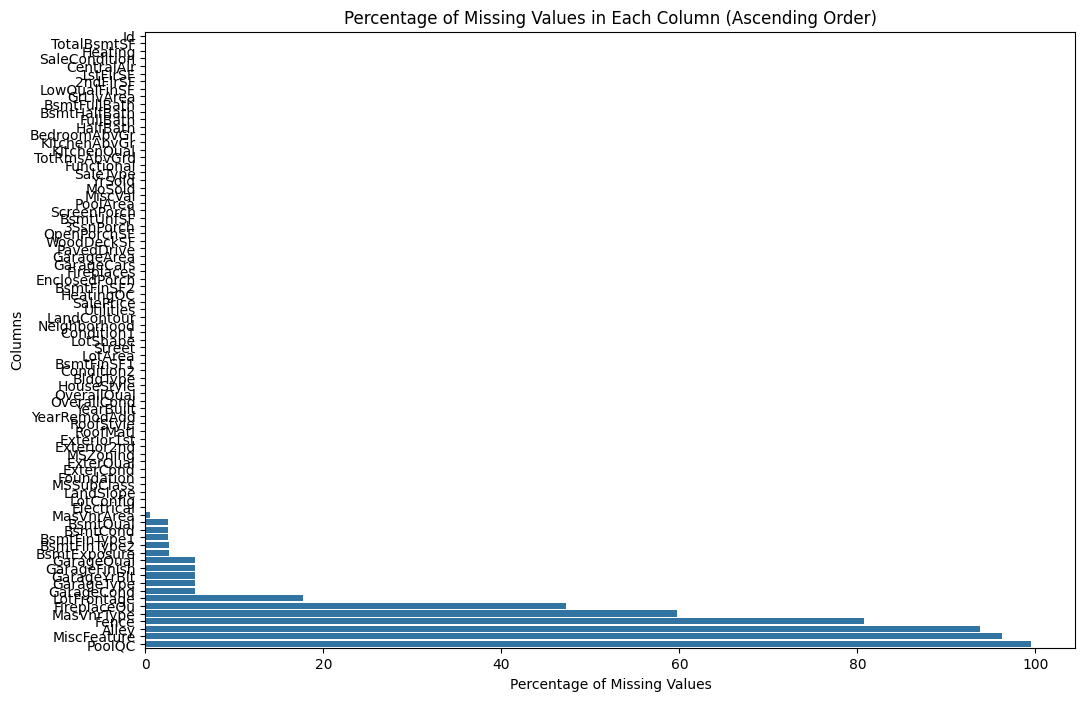

In [33]:
missing_values_percentage = df_train.isnull().mean() * 100

missing_values_percentage_sorted = missing_values_percentage.sort_values()

# Visualization code


plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column (Ascending Order)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()



## Visualize using heatmap

<Axes: >

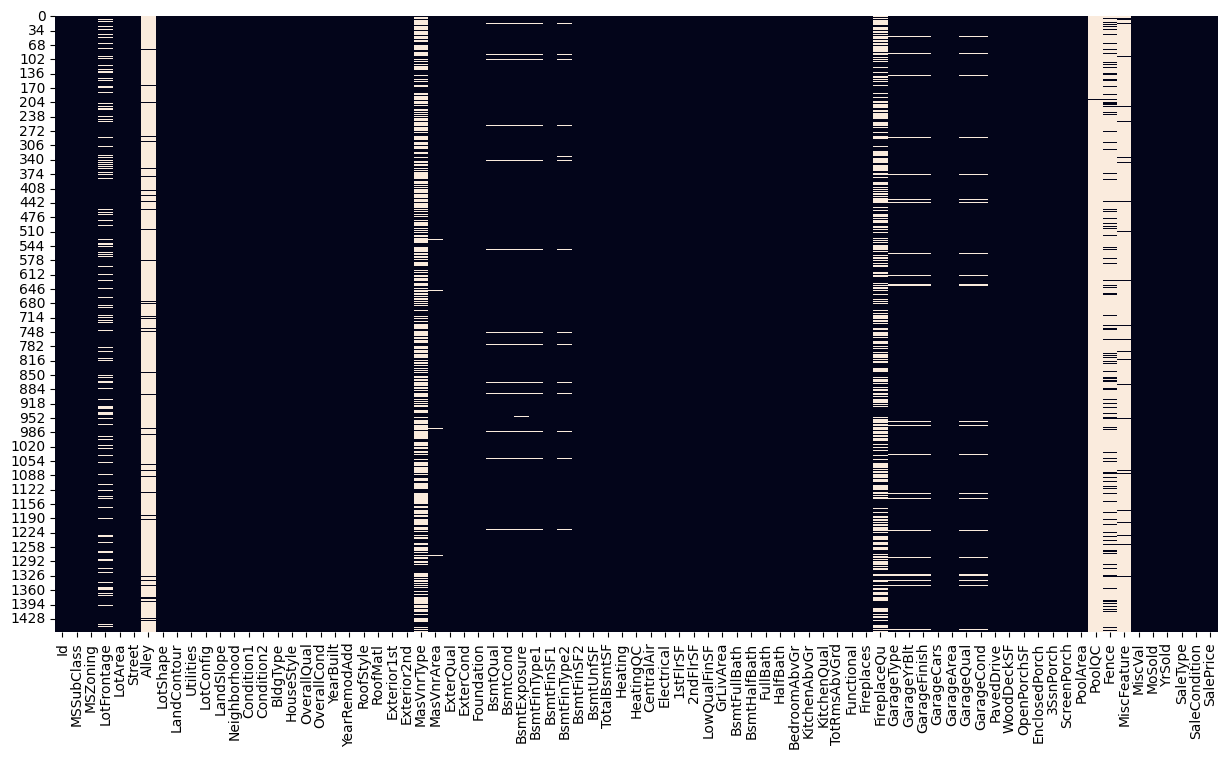

In [34]:
sns.heatmap(df_train.isnull(),cbar=False)

## Handling missing values 

In [35]:
# Handling missing values
# Imputing missing values with the mean for continuous variables and mode for categorical variables
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    else:
        df_train[col].fillna(df_train[col].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = df_train.isnull().sum()

# Rechecking for missing values after imputation
missing_values_after = df_train.isnull().sum()

(missing_values, missing_values_after)

/tmp/ipykernel_237366/3477165124.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mean(), inplace=True)
/tmp/ipykernel_237366/3477165124.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

(Id               0
 MSSubClass       0
 MSZoning         0
 LotFrontage      0
 LotArea          0
                 ..
 MoSold           0
 YrSold           0
 SaleType         0
 SaleCondition    0
 SalePrice        0
 Length: 81, dtype: int64,
 Id               0
 MSSubClass       0
 MSZoning         0
 LotFrontage      0
 LotArea          0
                 ..
 MoSold           0
 YrSold           0
 SaleType         0
 SaleCondition    0
 SalePrice        0
 Length: 81, dtype: int64)

In [36]:


missing_train = df_train.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_train["% of Missing Values"] = round((missing_train["Total No. of Missing Values"]/len( df_train))*100,2)
missing_train



Total No. of Missing Values  % of Missing Values
Id                                       0                  0.0
MSSubClass                               0                  0.0
MSZoning                                 0                  0.0
LotFrontage                              0                  0.0
LotArea                                  0                  0.0
...                                    ...                  ...
MoSold                                   0                  0.0
YrSold                                   0                  0.0
SaleType                                 0                  0.0
SaleCondition                            0                  0.0
SalePrice                                0                  0.0

[81 rows x 2 columns]

## Are there duplicates 

In [37]:
df_train[df_train.duplicated(keep=False)]


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [38]:
df_train.duplicated().sum()

0

In [39]:
df_train.drop_duplicates(inplace=True)


In [40]:
df_train.shape

(1460, 81)

In [41]:
cat_cols = df_train.select_dtypes(include='object').columns.tolist()

# Create a DataFrame containing counts of unique values for each categorical column
cat_train = pd.DataFrame(df_train[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Display summary statistics of categorical variables
display(df_train[cat_cols].describe())

# Display counts of unique values for each categorical column
display(cat_train)

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460  1460     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454  1419      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1460         1460   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        951          686   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1460       1460       1460   1460   1460        1460     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1392       1407       1340   1456   1336        1455     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

count
column    value        
Alley     Pave       41
          Grvl     1419
BldgType  2fmCon     31
          Twnhs      43
          Duplex     52
...                 ...
SaleType  WD       1267
Street    Grvl        6
          Pave     1454
Utilities NoSeWa      1
          AllPub   1459

[251 rows x 1 columns]

In [46]:
df_train.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley          1460      2     Grvl  1419
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1460      3  BrkFace  1317
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1460      4       TA   686
BsmtCond       1460      4       TA  1348
BsmtExposure   1460      4       No   991
BsmtFinType1   1460      6      Unf   467
BsmtFinType2   1460      6      Unf  1294
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1460      5    SBrkr  1335
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu    1460      5       Gd  1070
GarageType     1460      6   Attchd   951
GarageFinish   1460      3      Unf   686
GarageQual     1460      5       TA  1392
GarageCond     1460      5       TA  1407
PavedDrive     1460      3        Y  1340
PoolQC         1460      3       Gd  1456
Fence          1460      4    MnPrv  1336
MiscFeature    1460      4     Shed  1455
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [47]:
df_train.nunique().sort_values()

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

## Exploratory Analysis

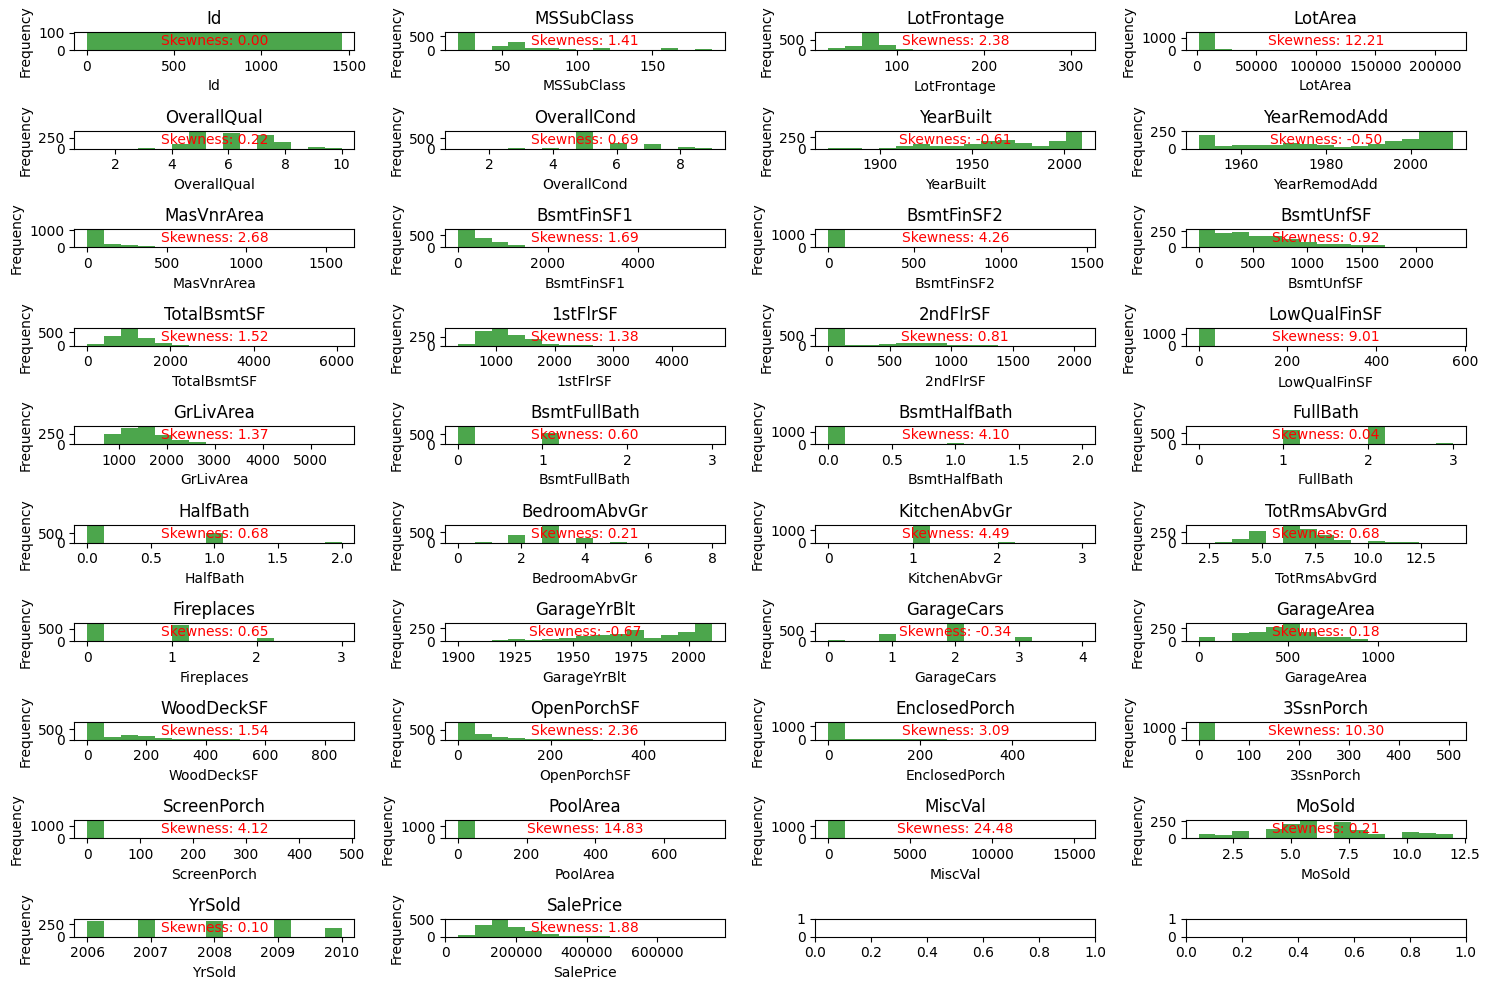

Skewness:
Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            

In [48]:
skewness = df_train.select_dtypes(include=['int64', 'float64']).skew()

num_cols_count = len(df_train.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df_train.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df_train[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')
            
            # Compute skewness
            skew_val = skewness[col]
            
            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

## Using boxplot

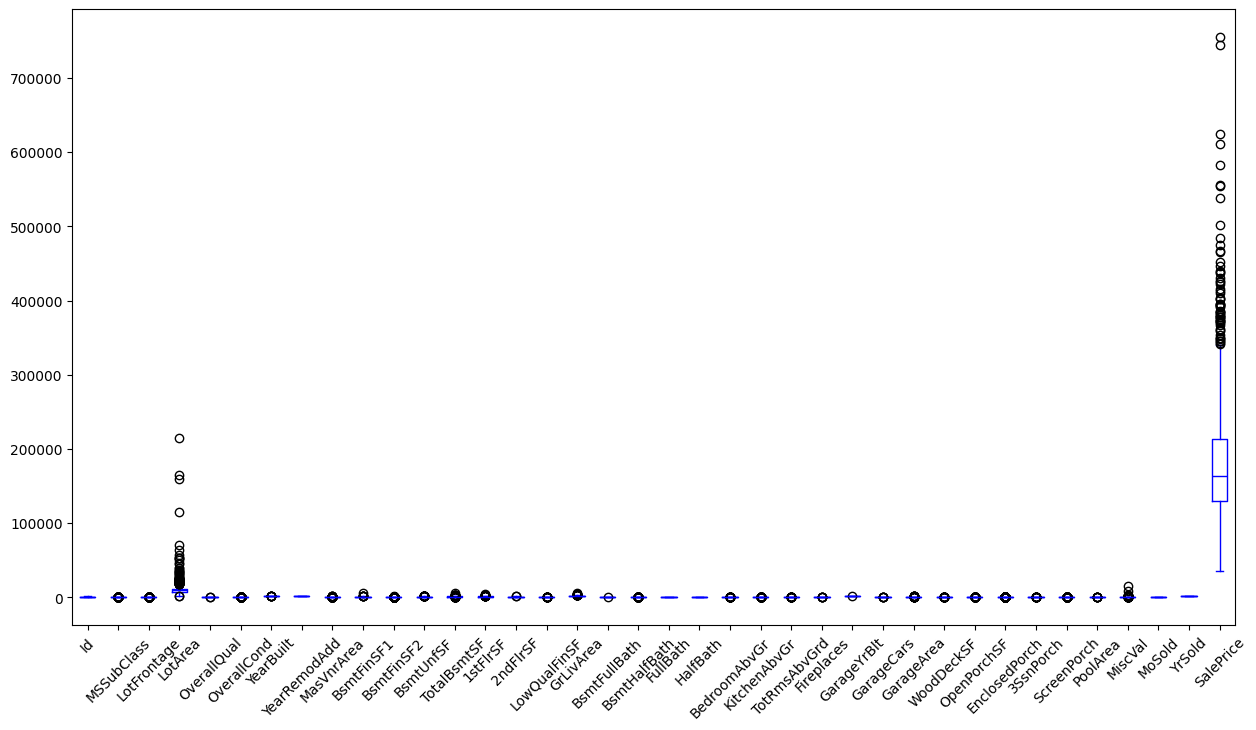

In [50]:


df_train.plot(kind='box', rot=45,color='blue')

# Show the plot
plt.show()



/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


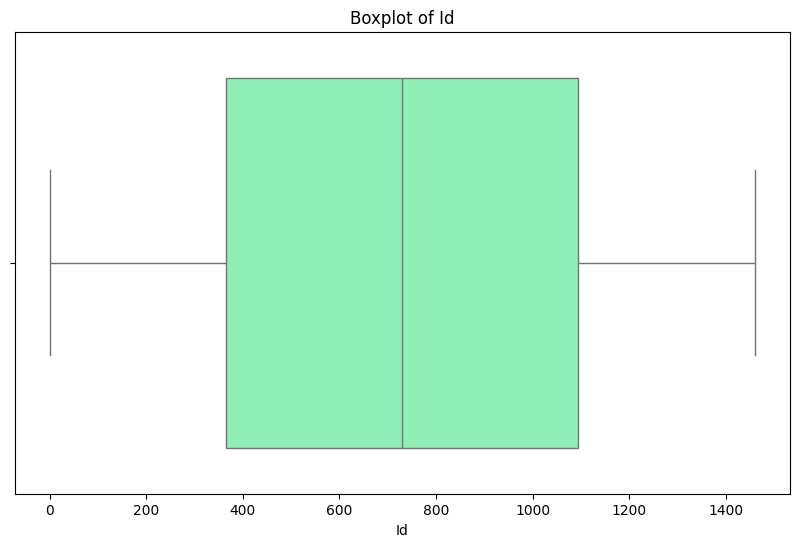

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


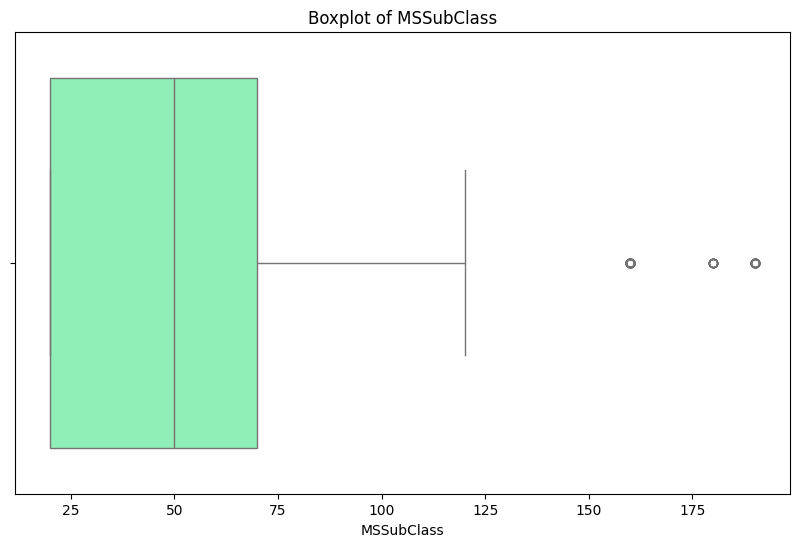

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


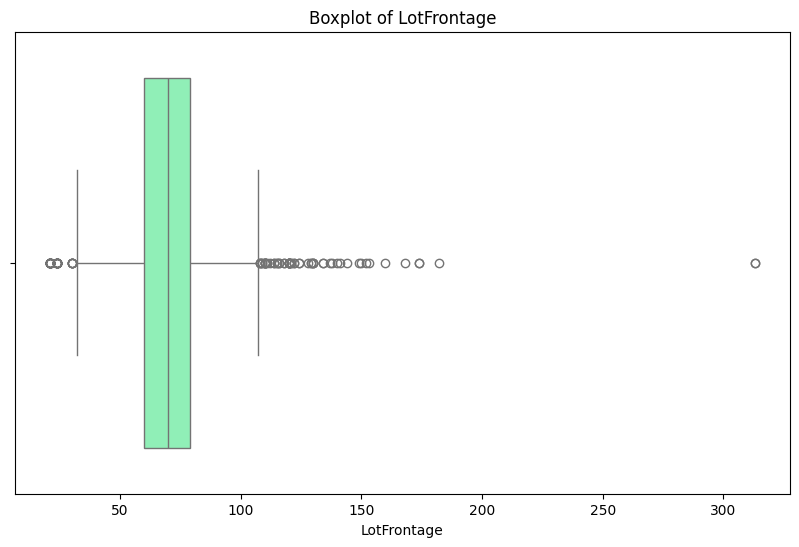

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


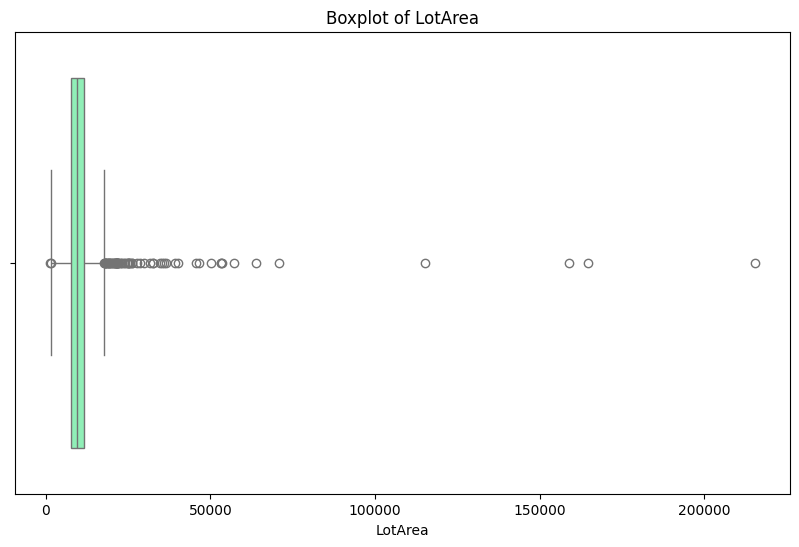

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


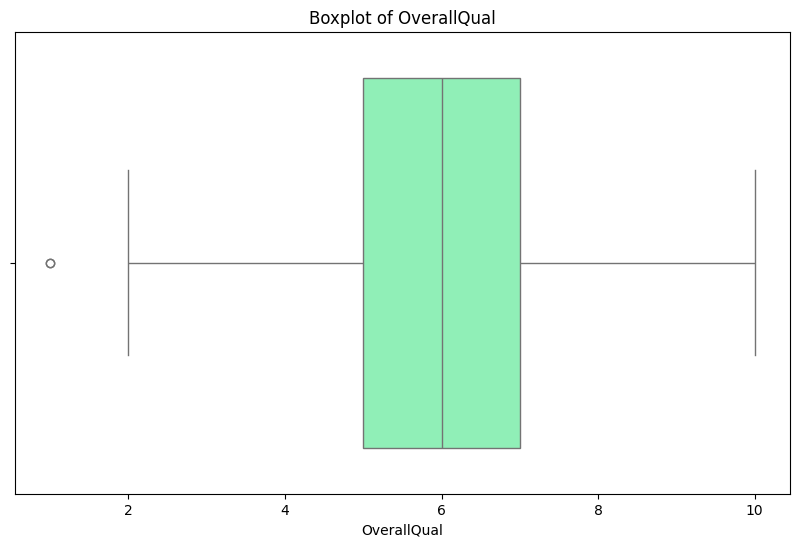

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


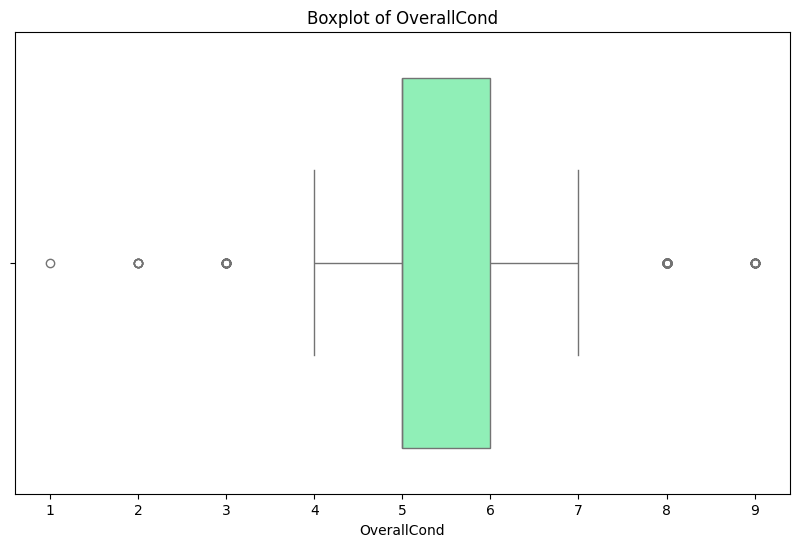

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


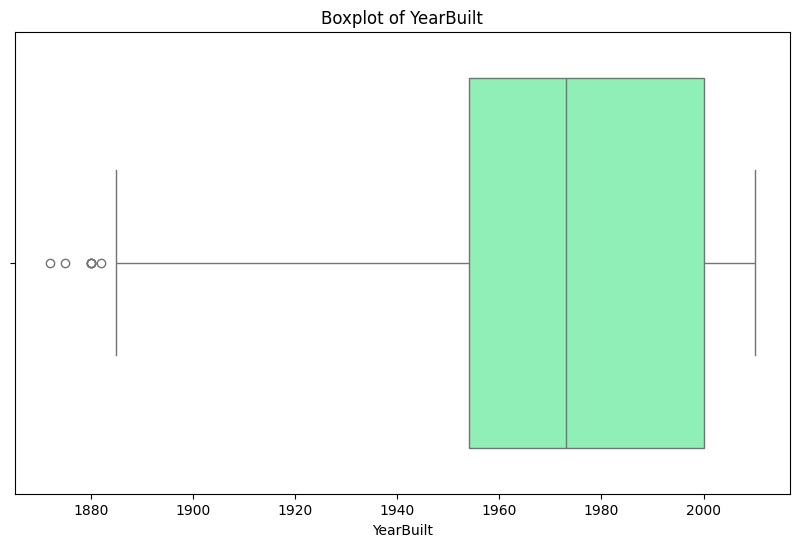

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


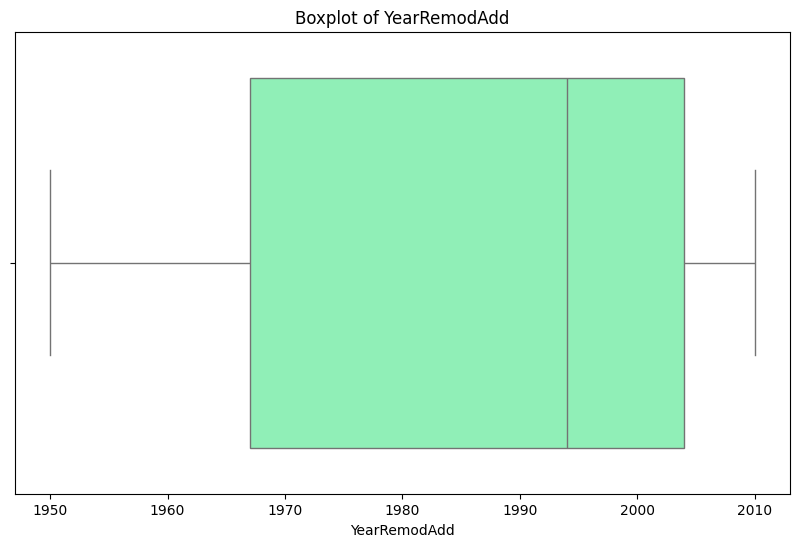

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


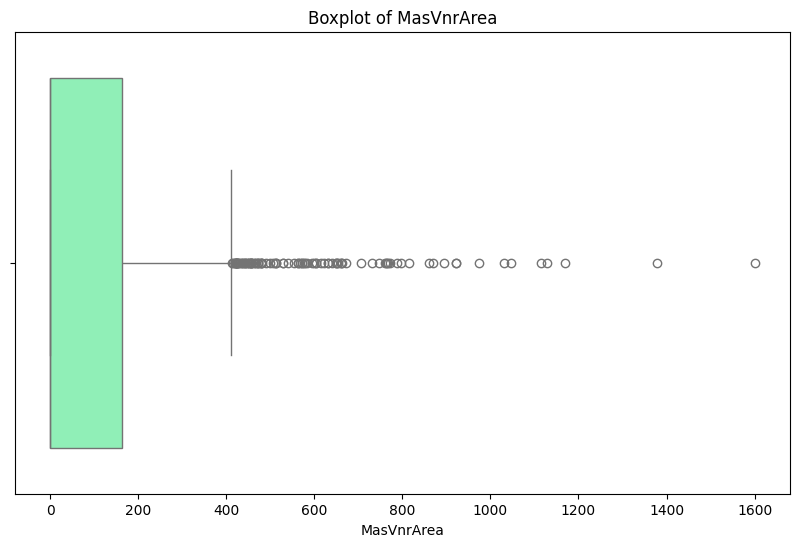

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


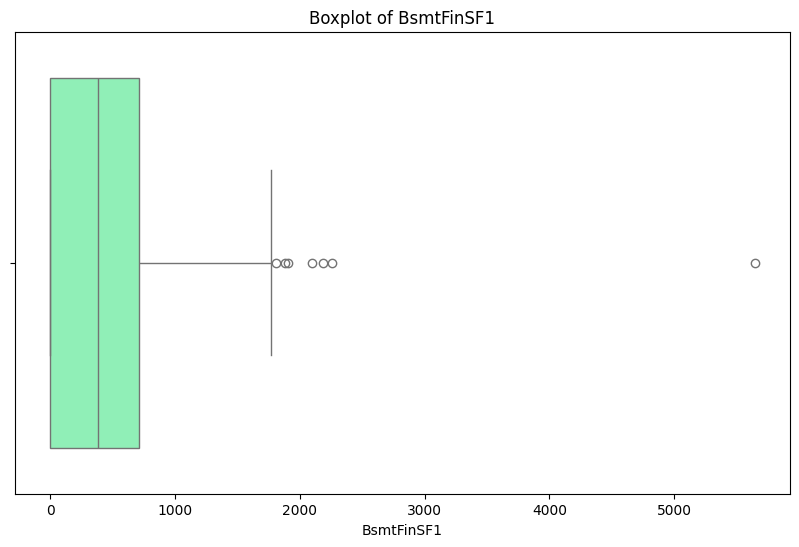

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


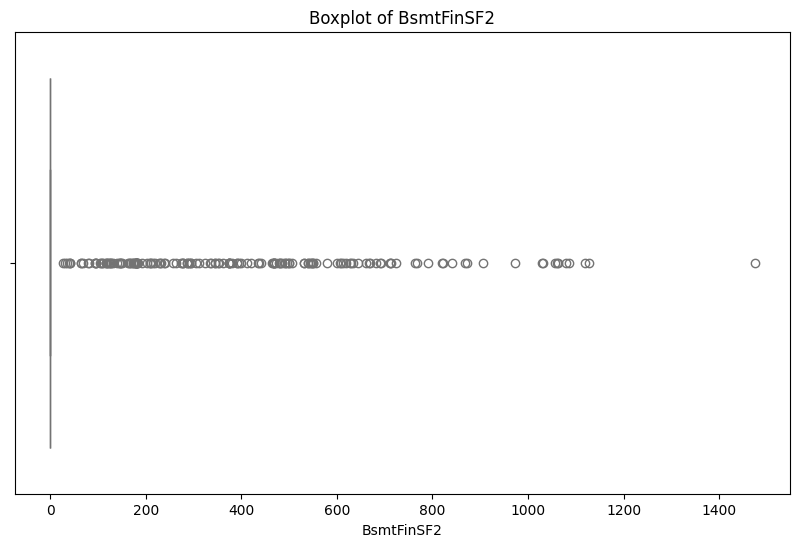

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


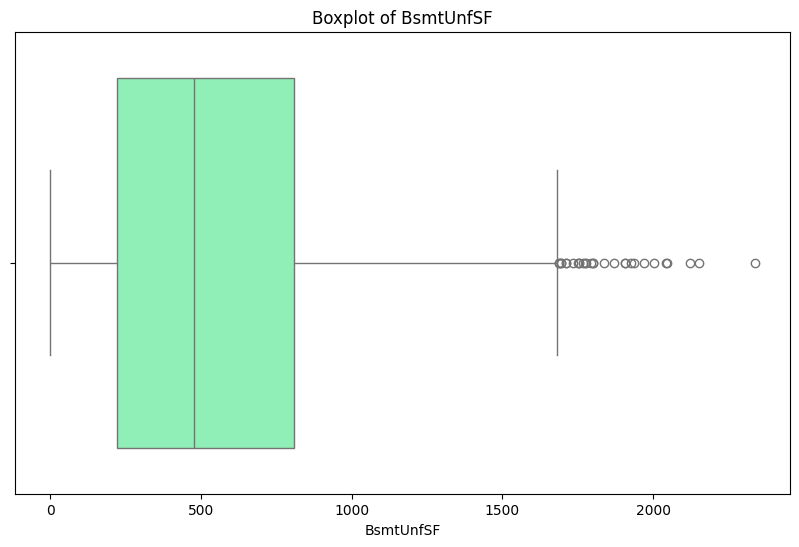

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


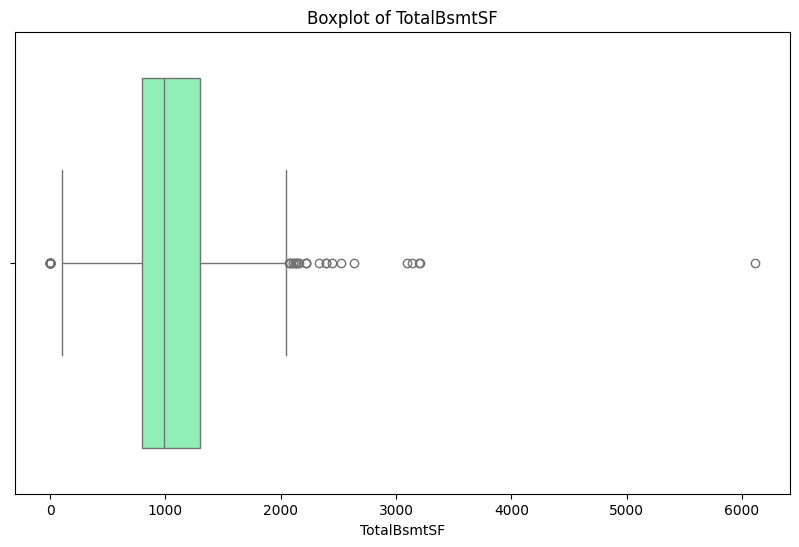

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


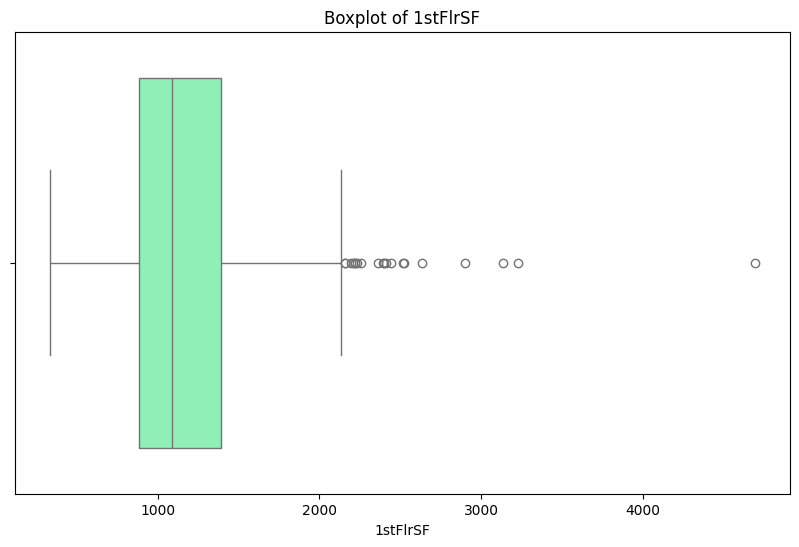

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


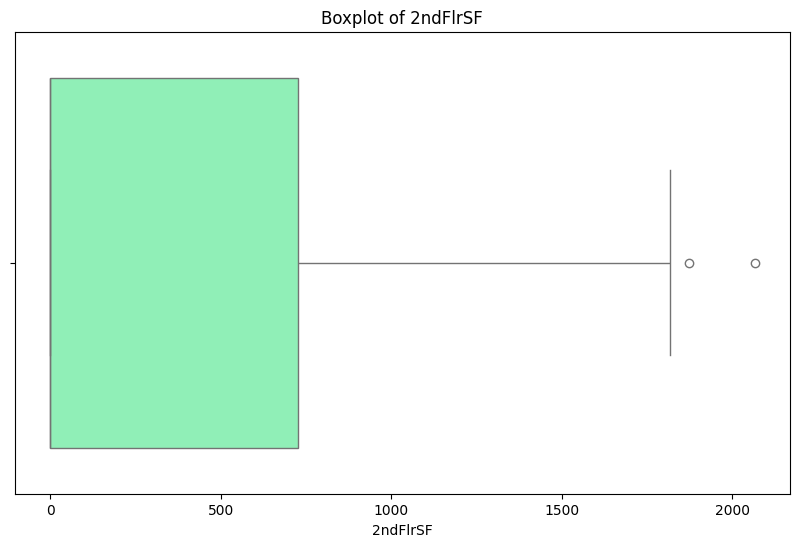

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


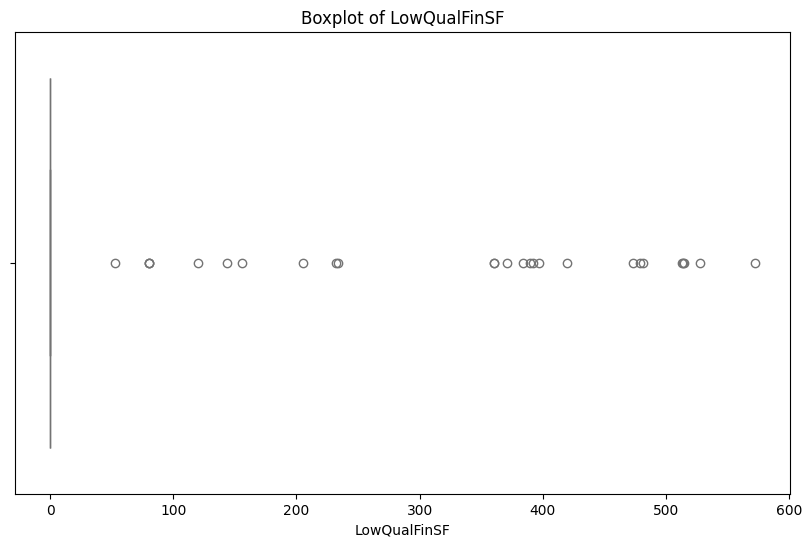

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


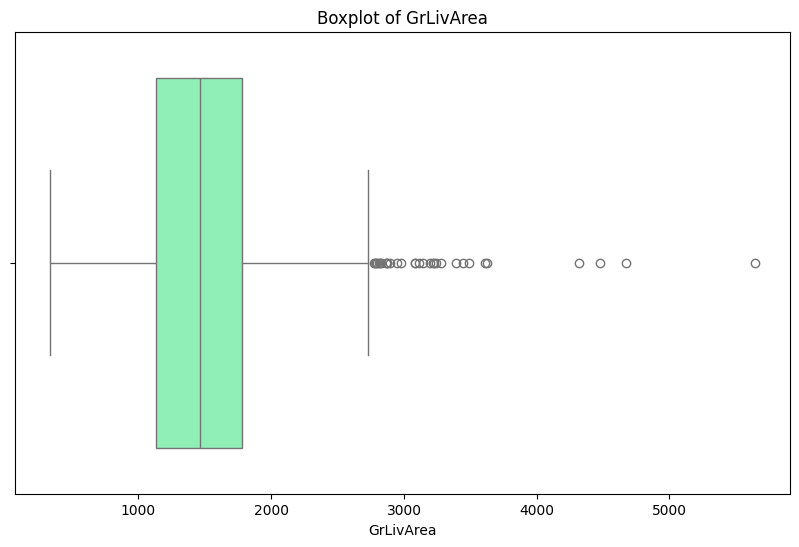

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


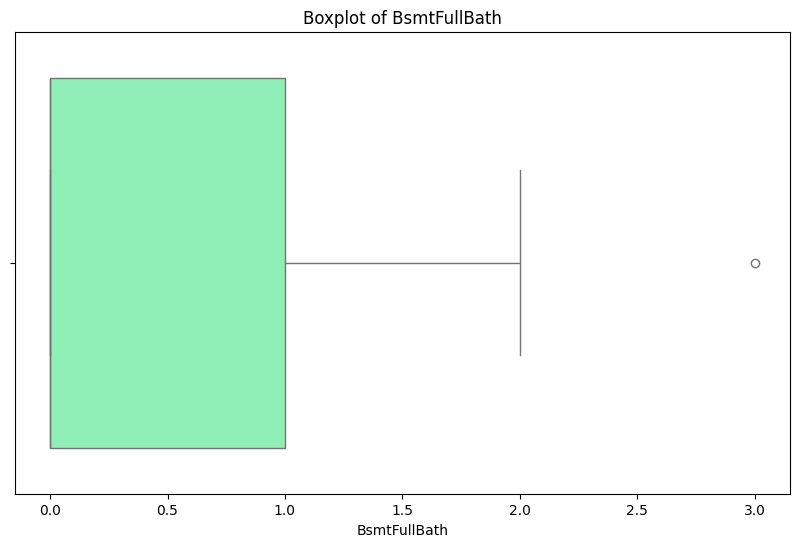

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


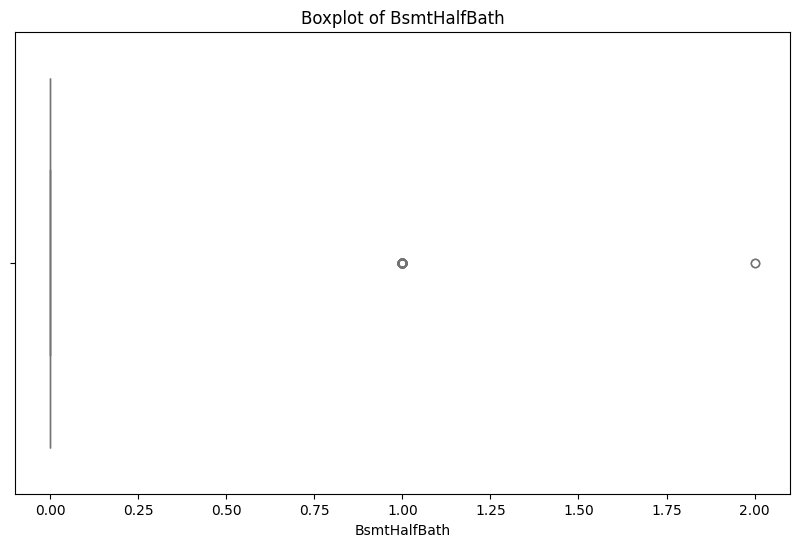

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


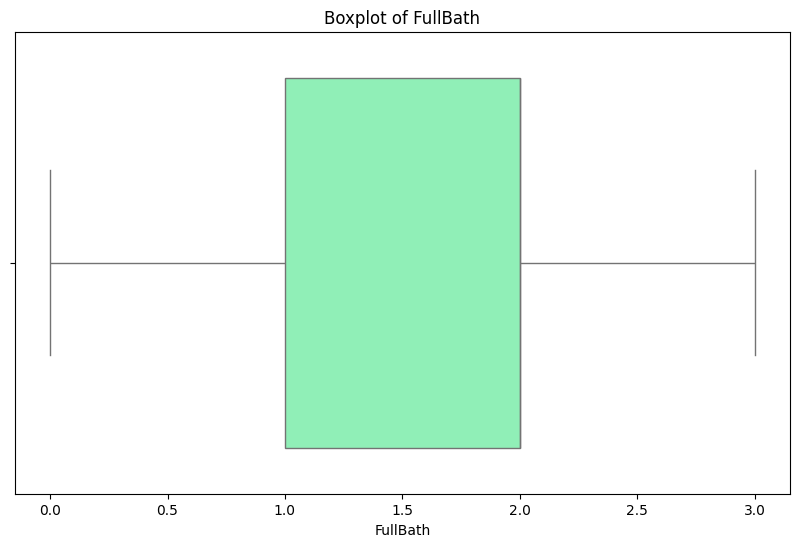

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


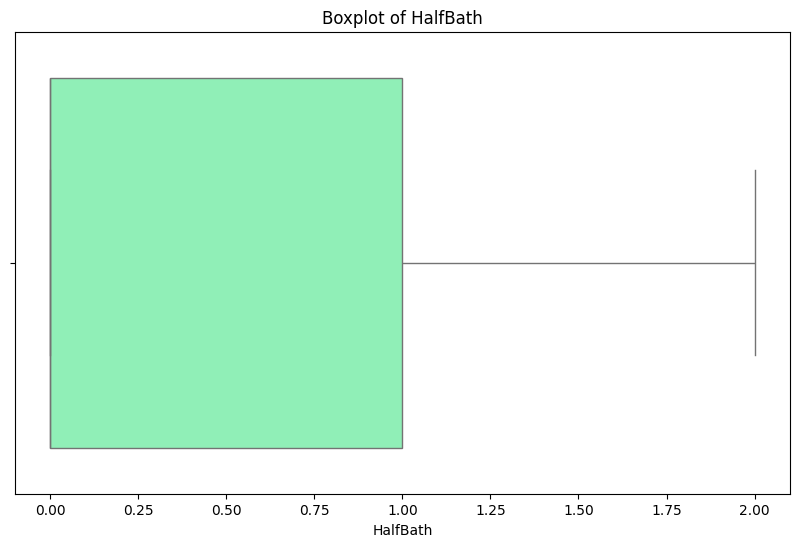

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


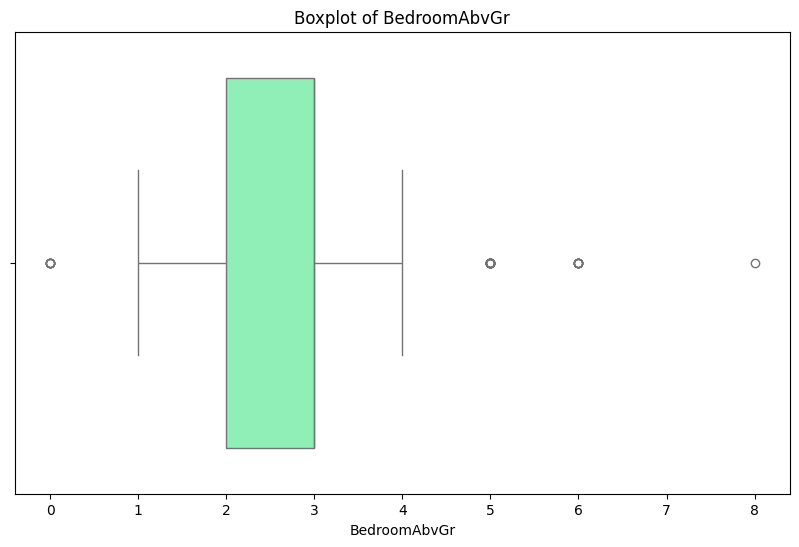

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


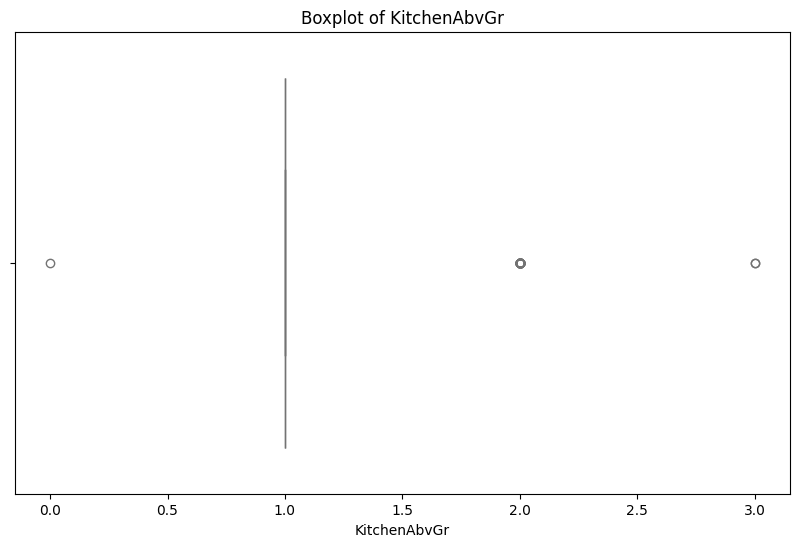

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


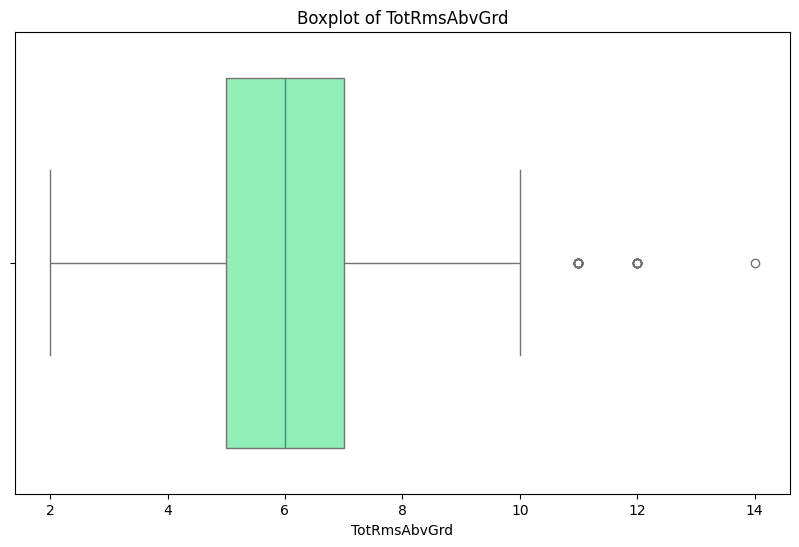

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


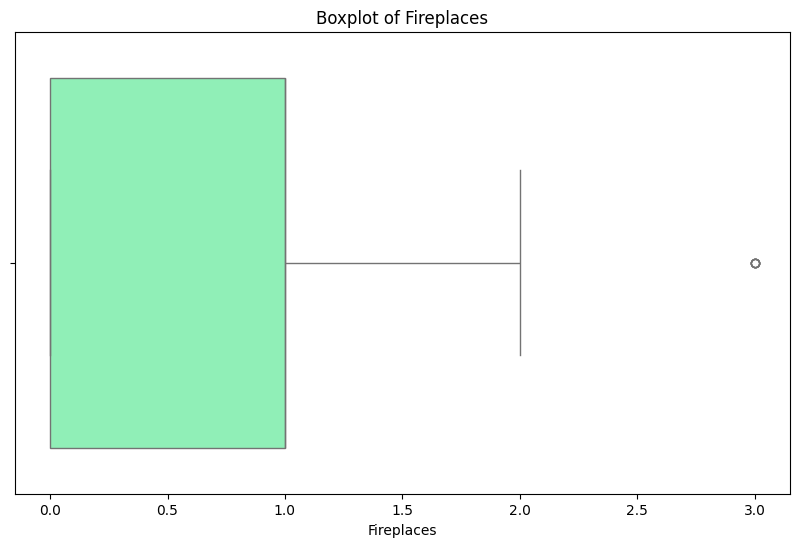

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


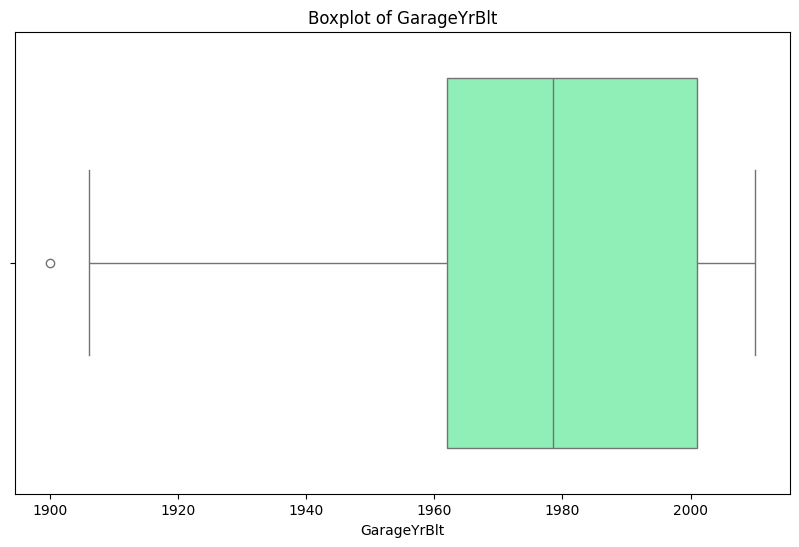

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


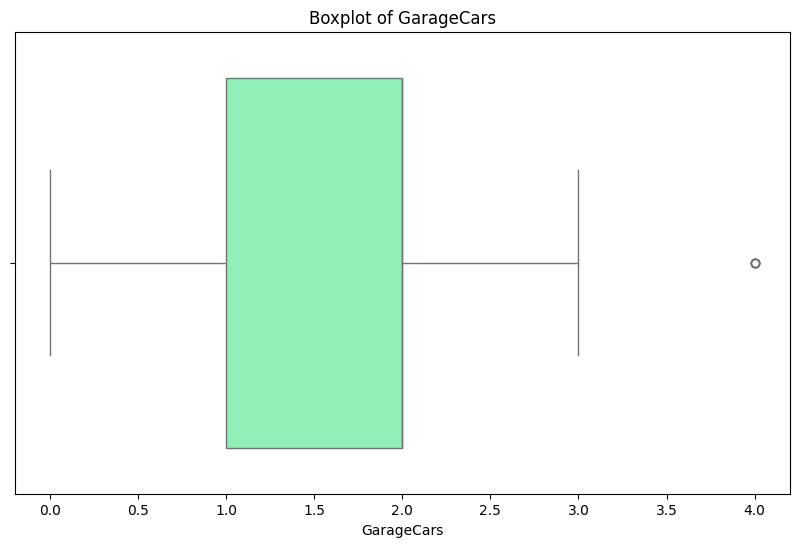

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


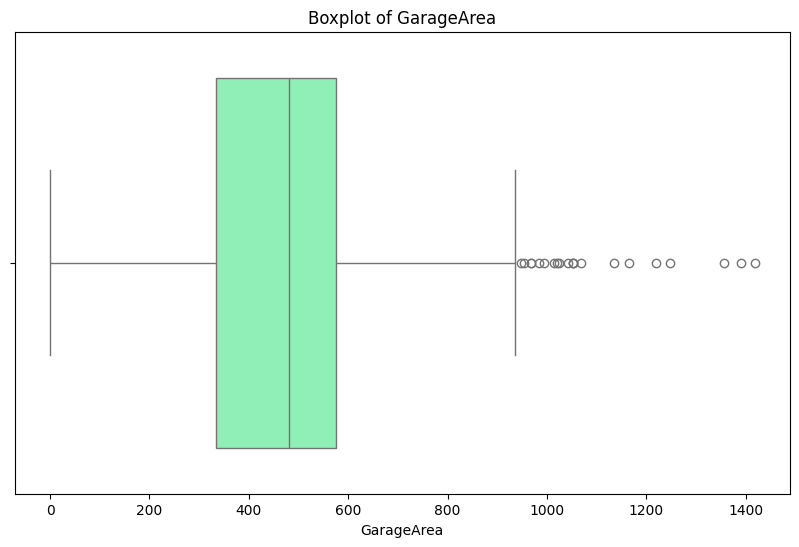

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


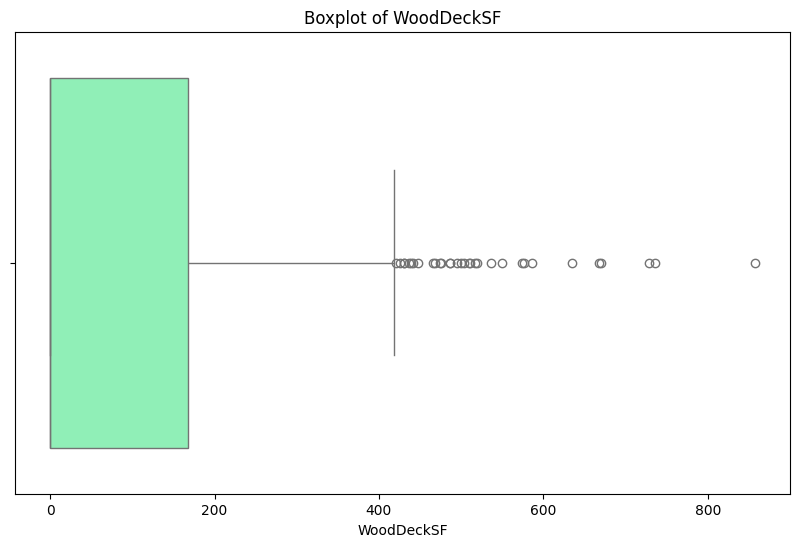

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


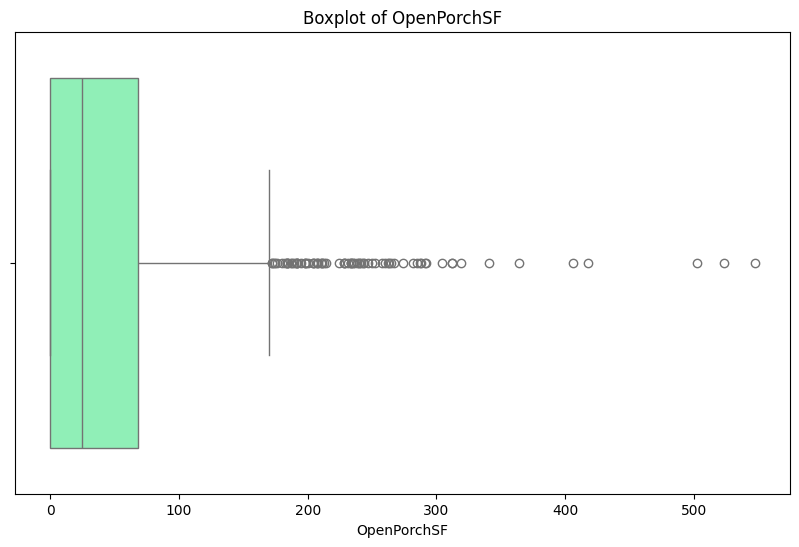

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


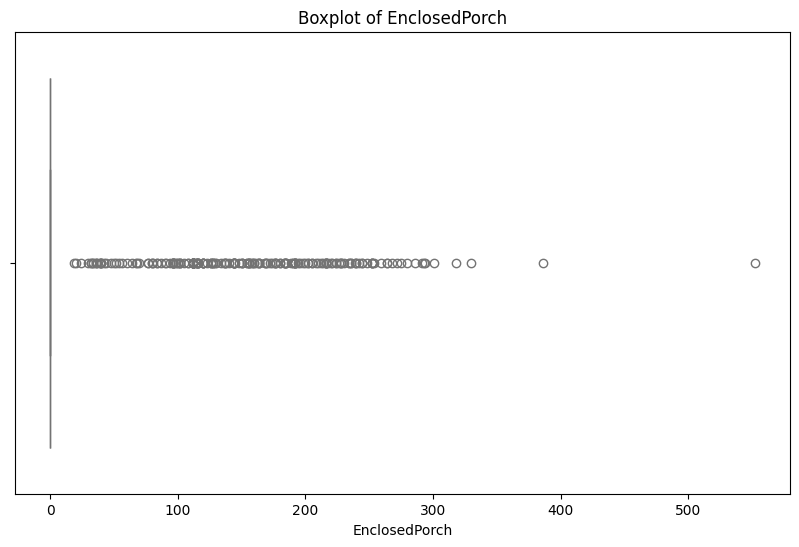

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


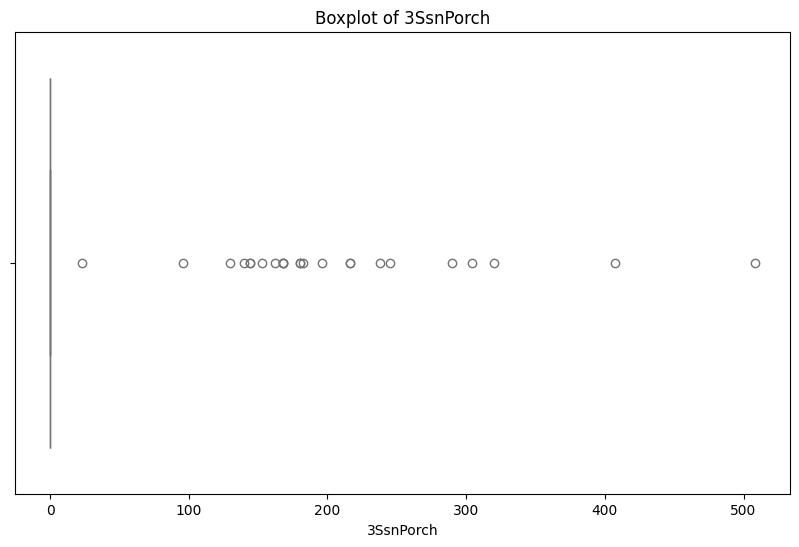

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


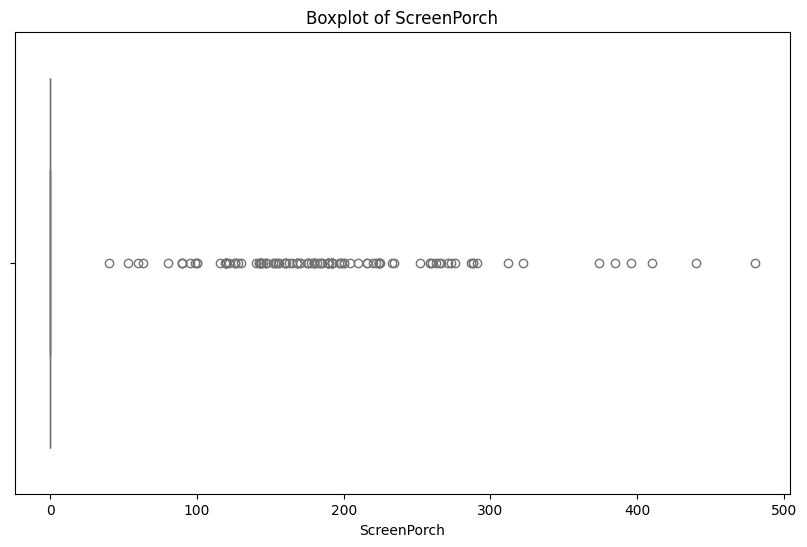

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


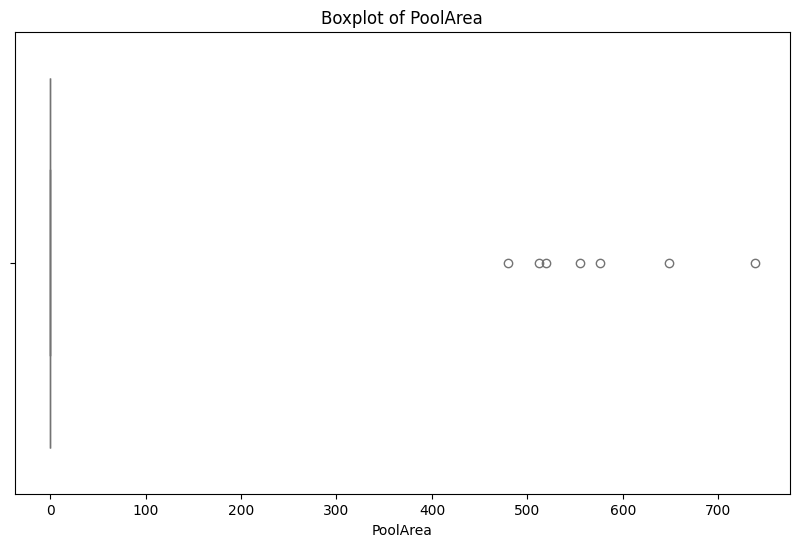

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


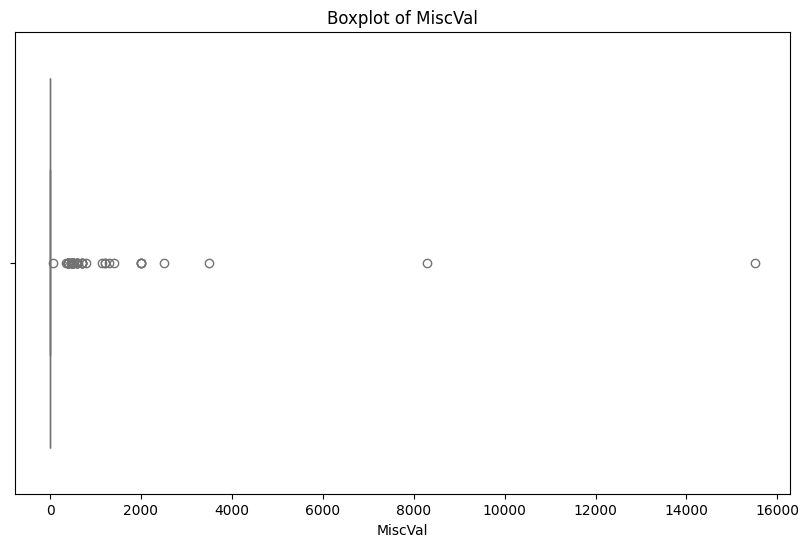

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


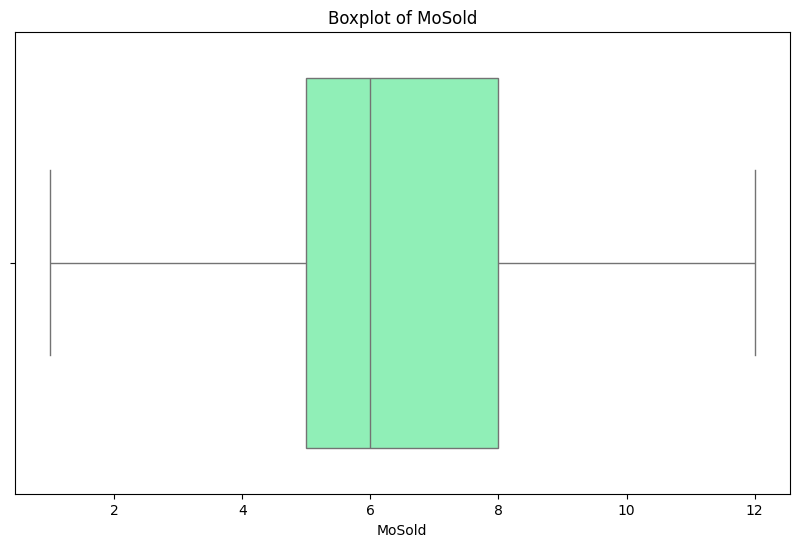

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


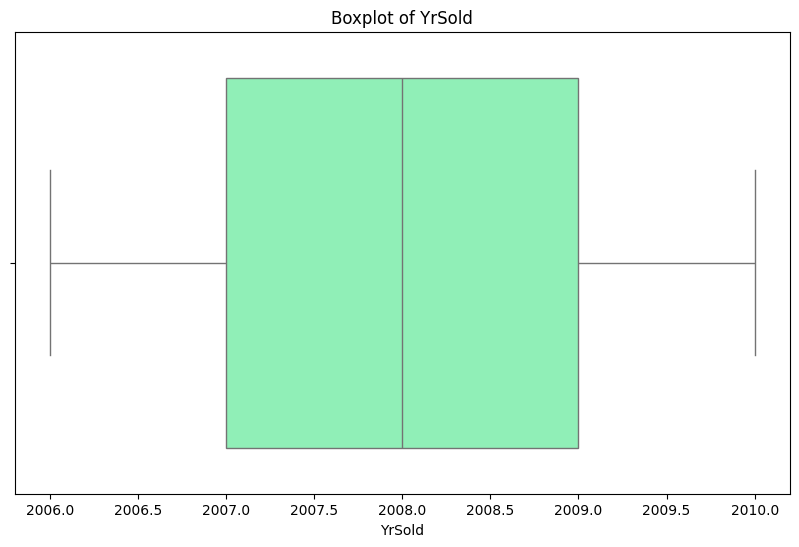

/tmp/ipykernel_237366/3938715032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[column],palette='rainbow')


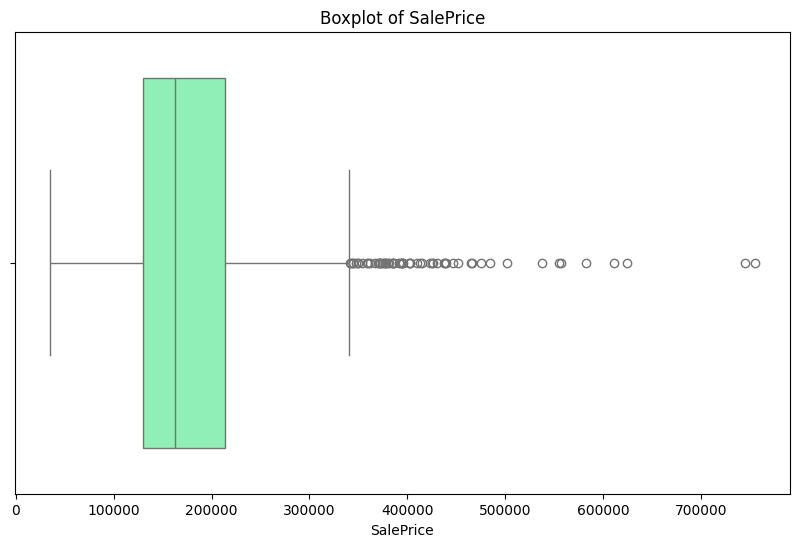

In [51]:
# Filter numeric columns
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

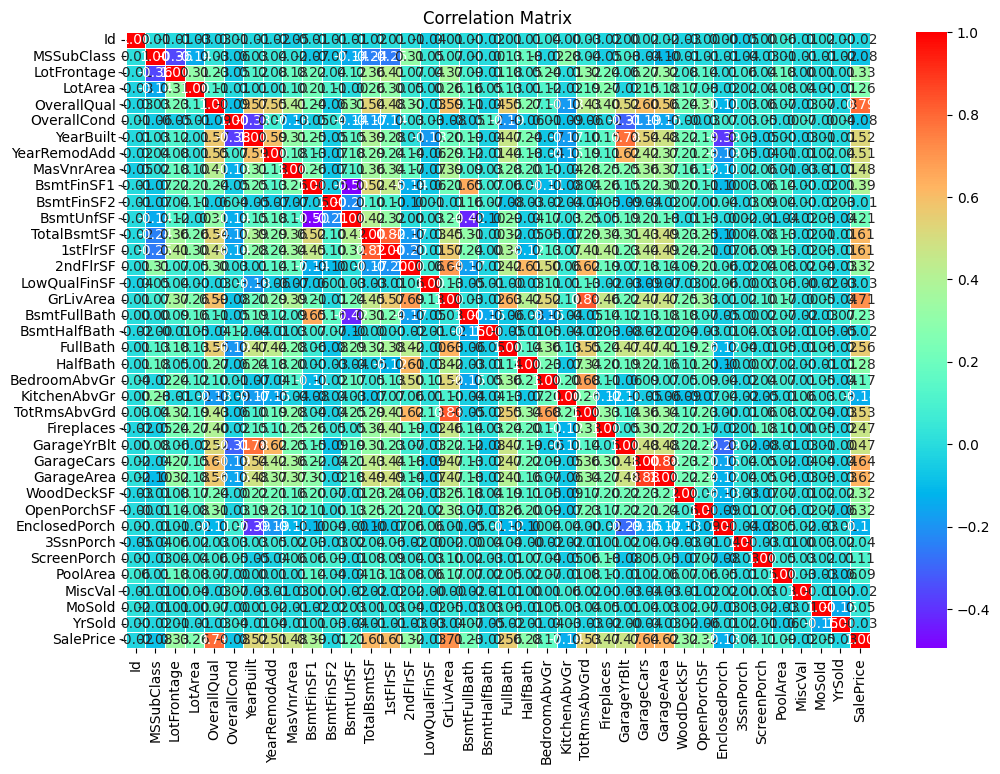

In [52]:


# Correlation matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df_train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')



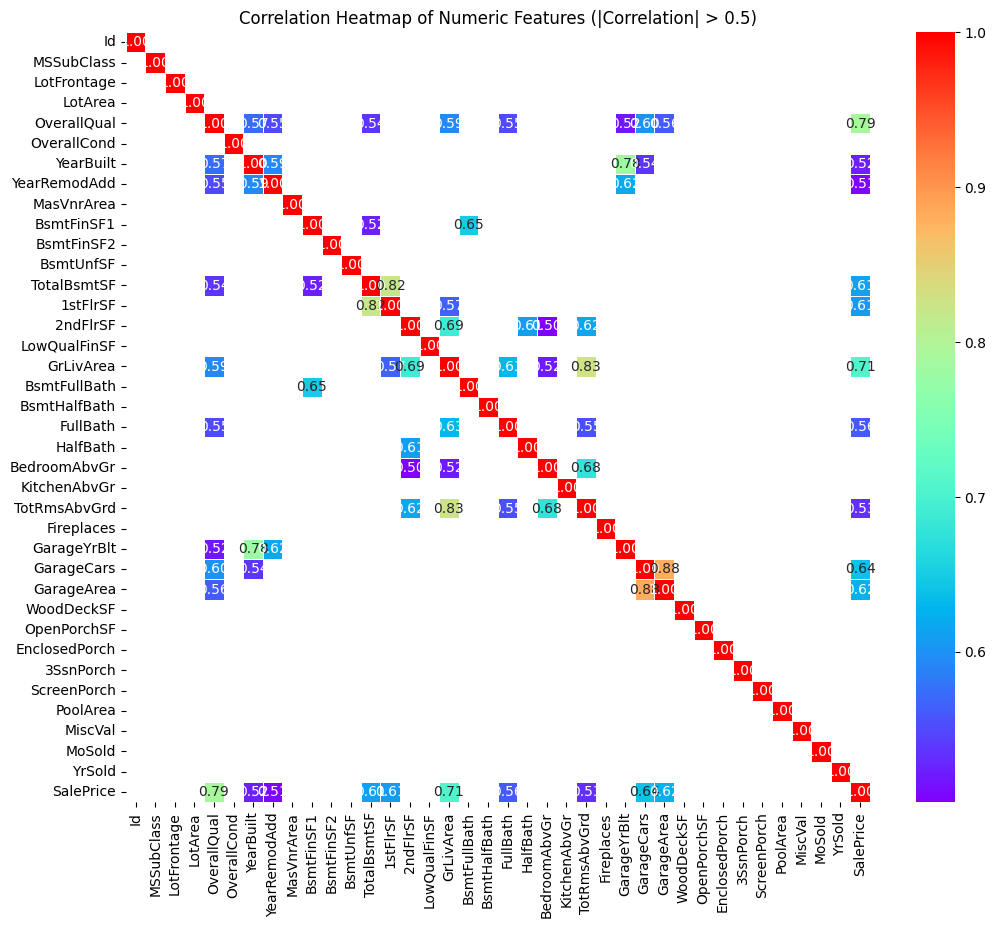

In [53]:
# Heatmap Plotting
# Select only numeric columns
numeric_columns = df_train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to include values greater than 0.5 or less than -0.5
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot the heatmap with filtered correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.5)')
plt.show()

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


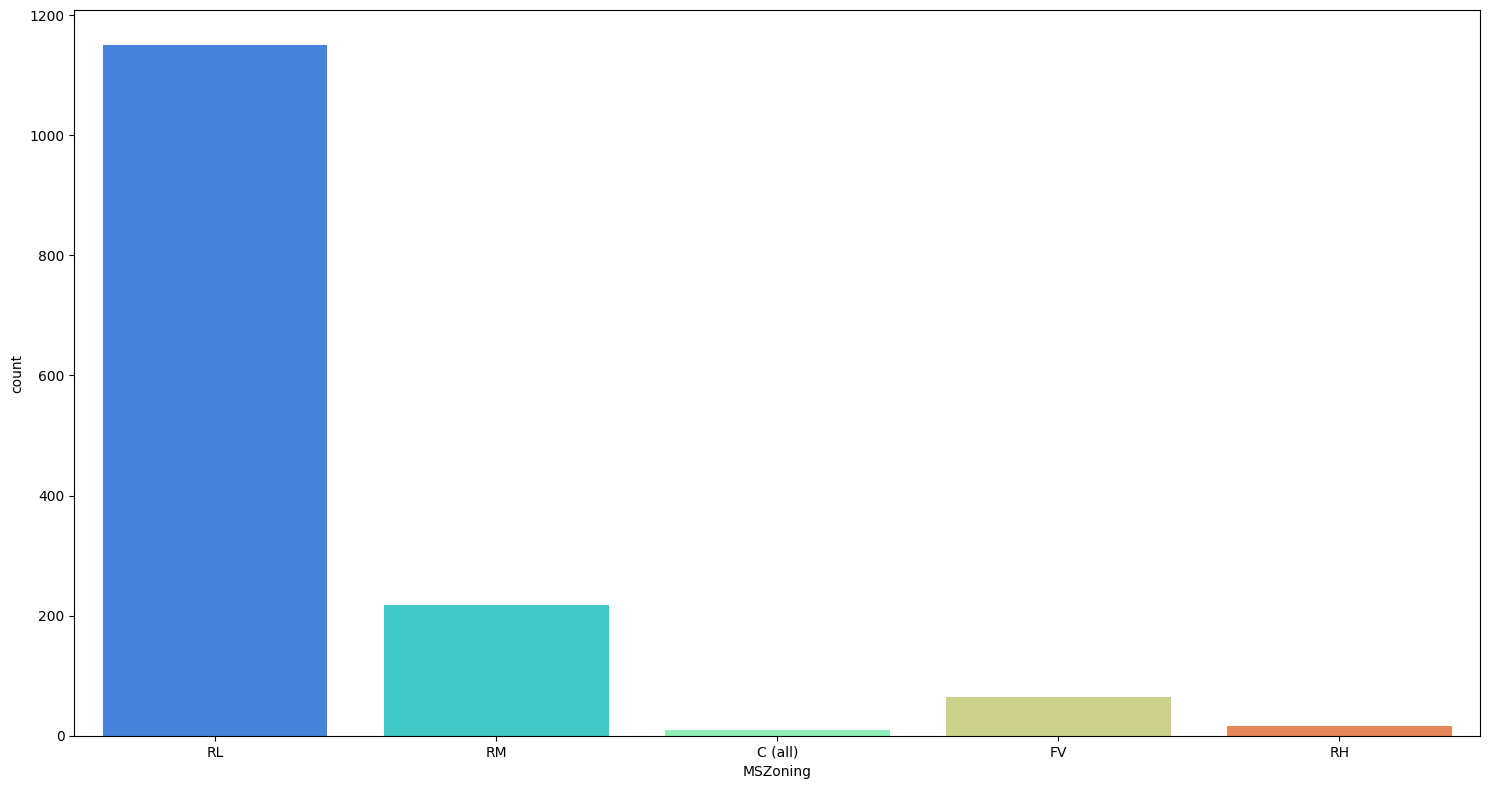

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


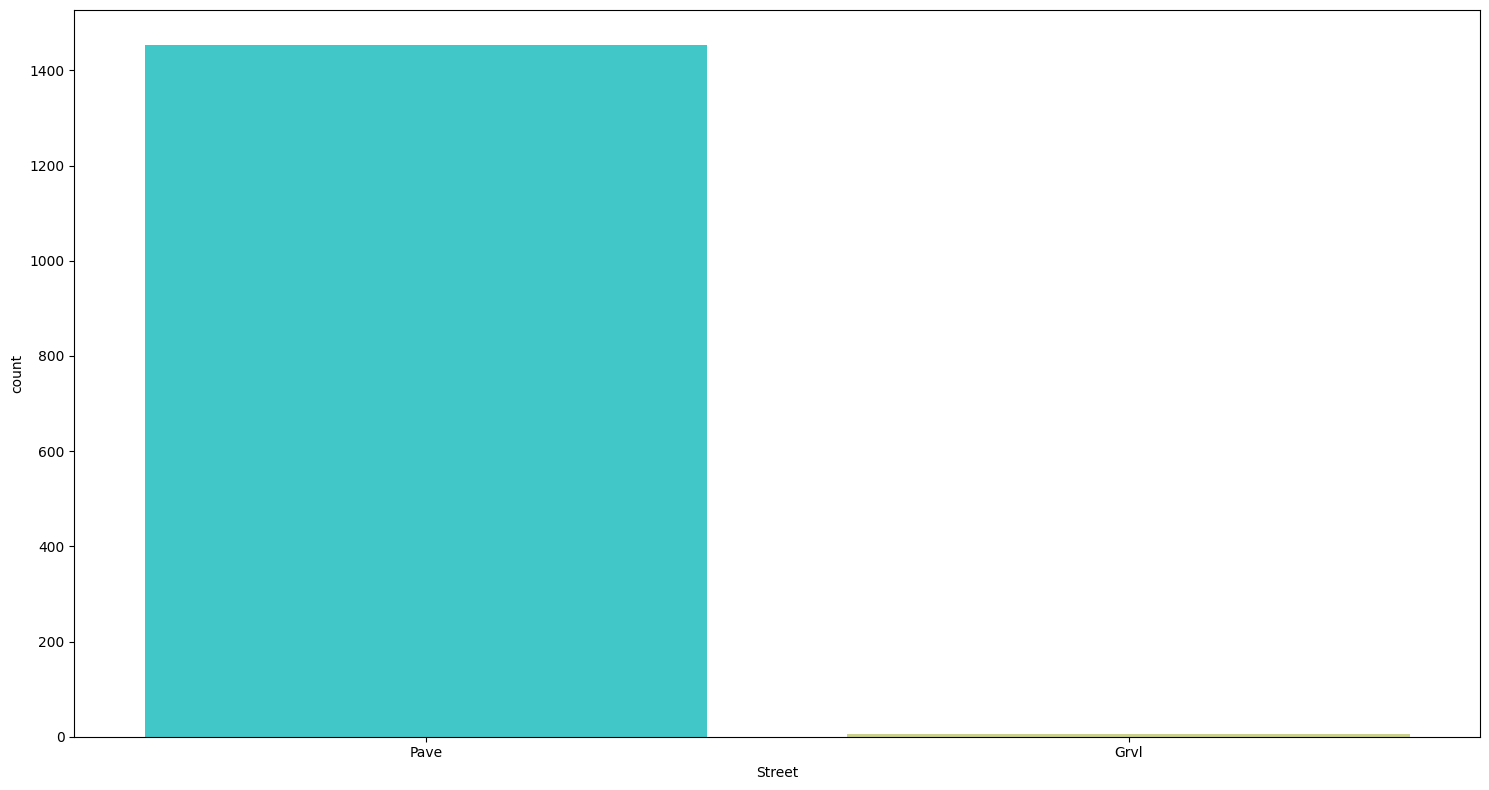

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


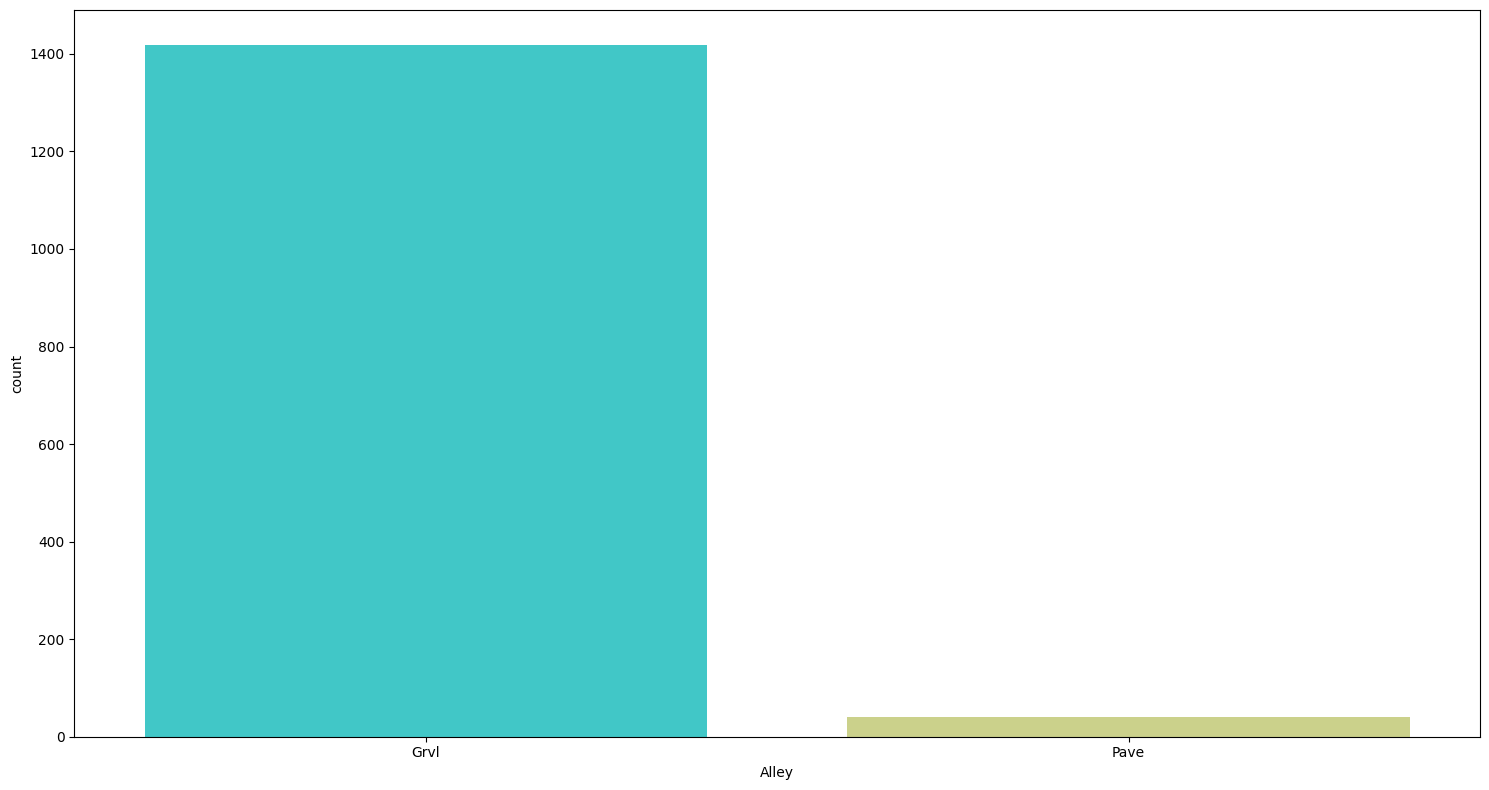

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


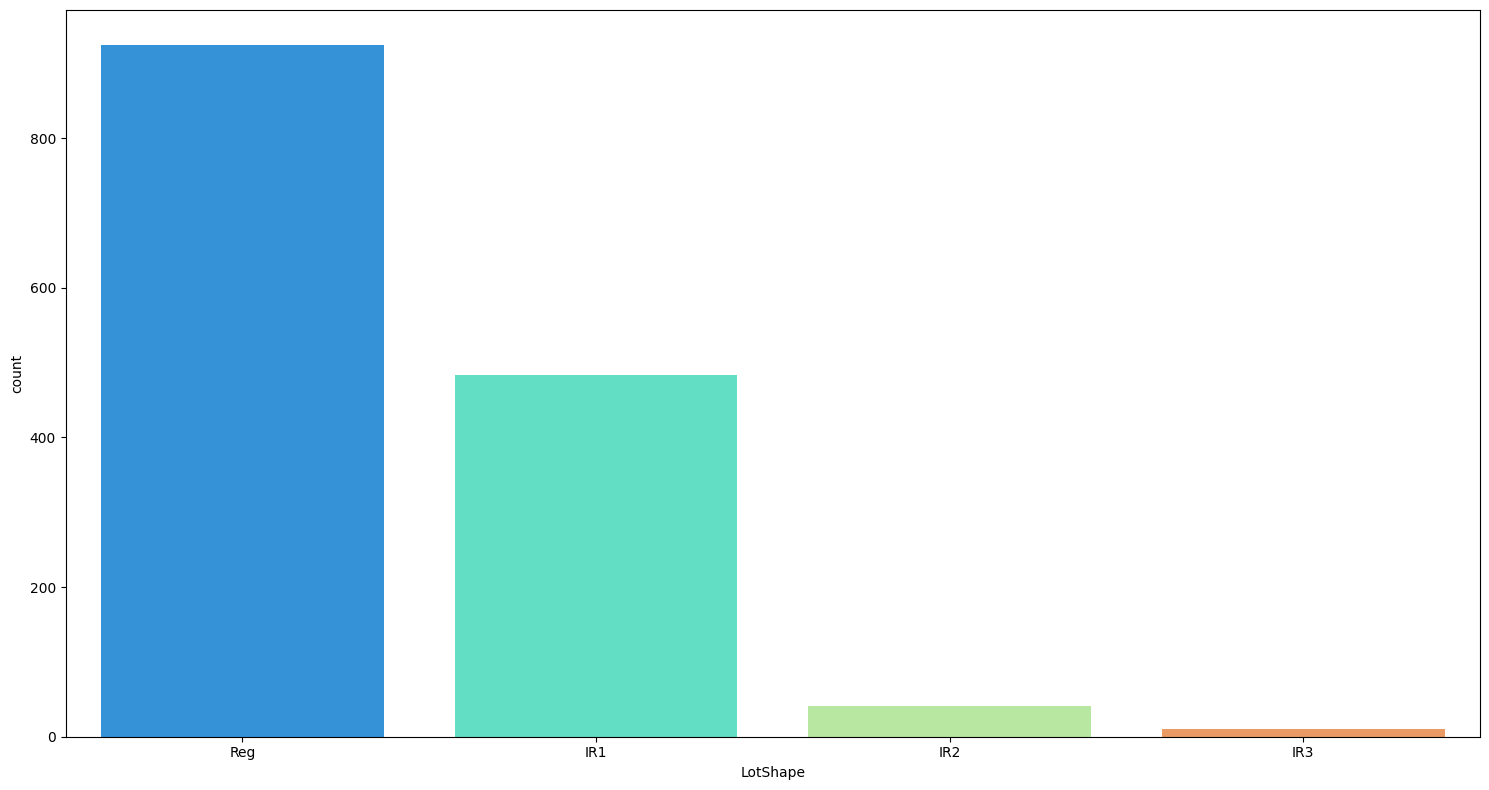

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


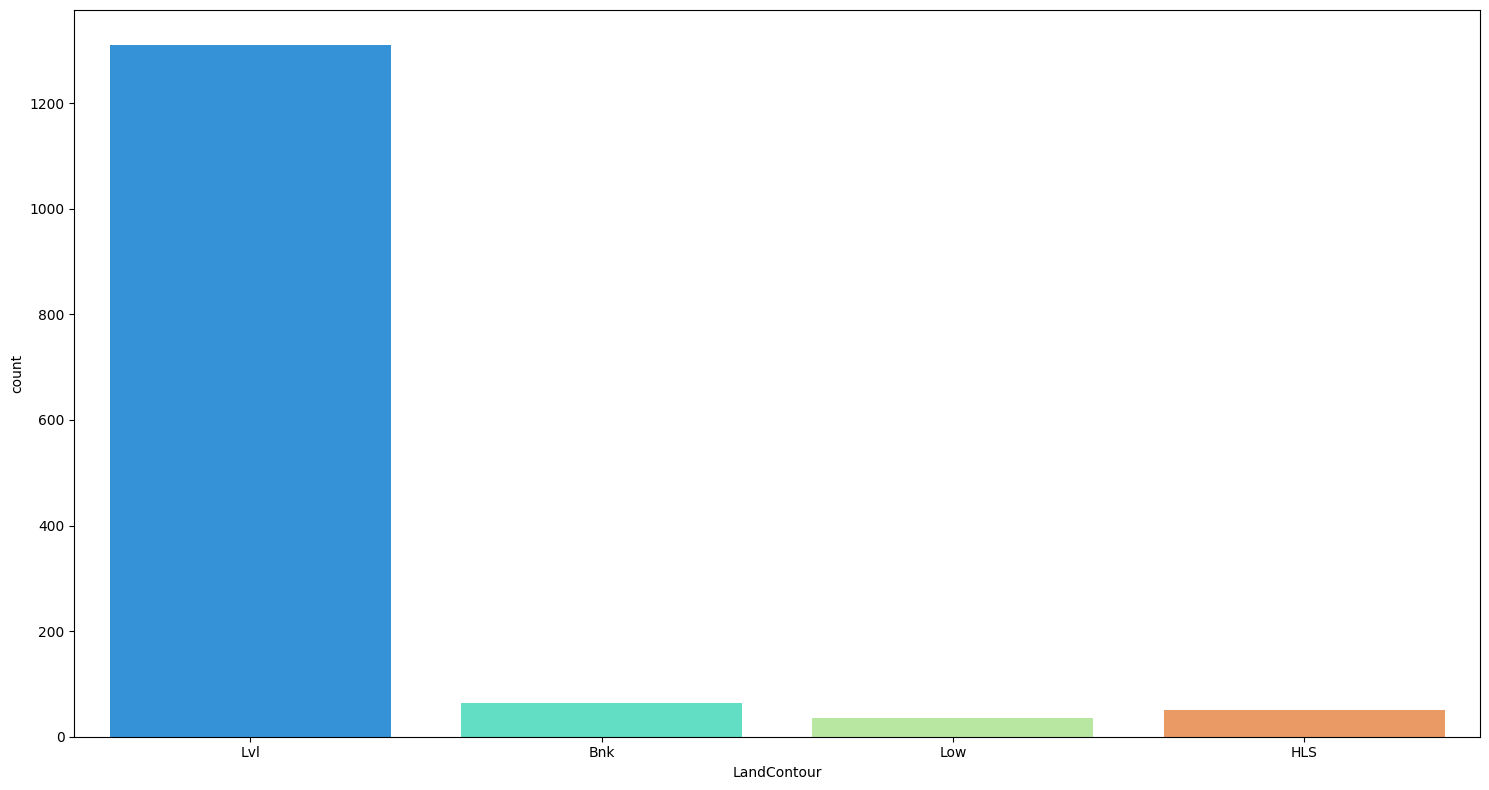

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


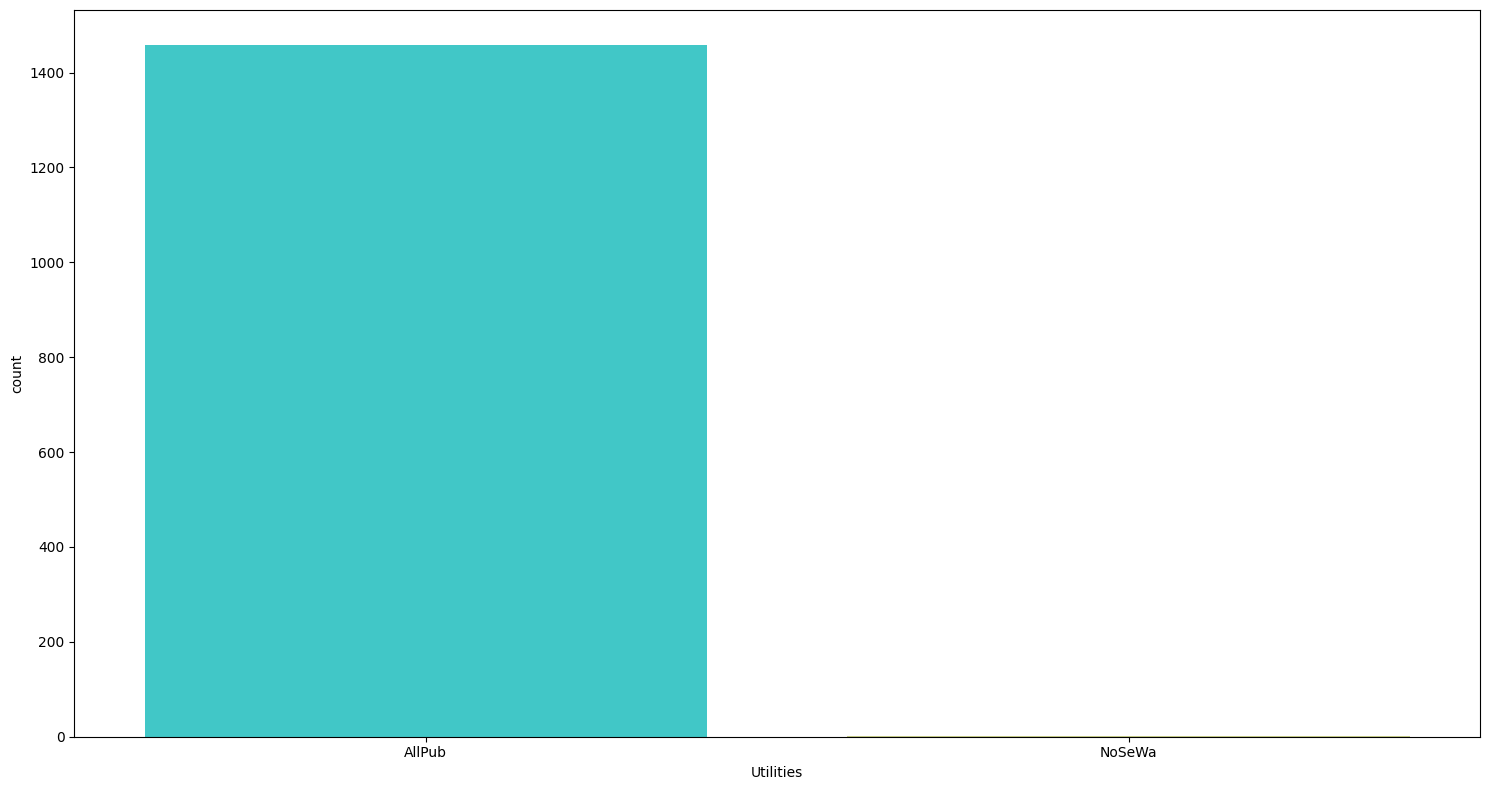

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


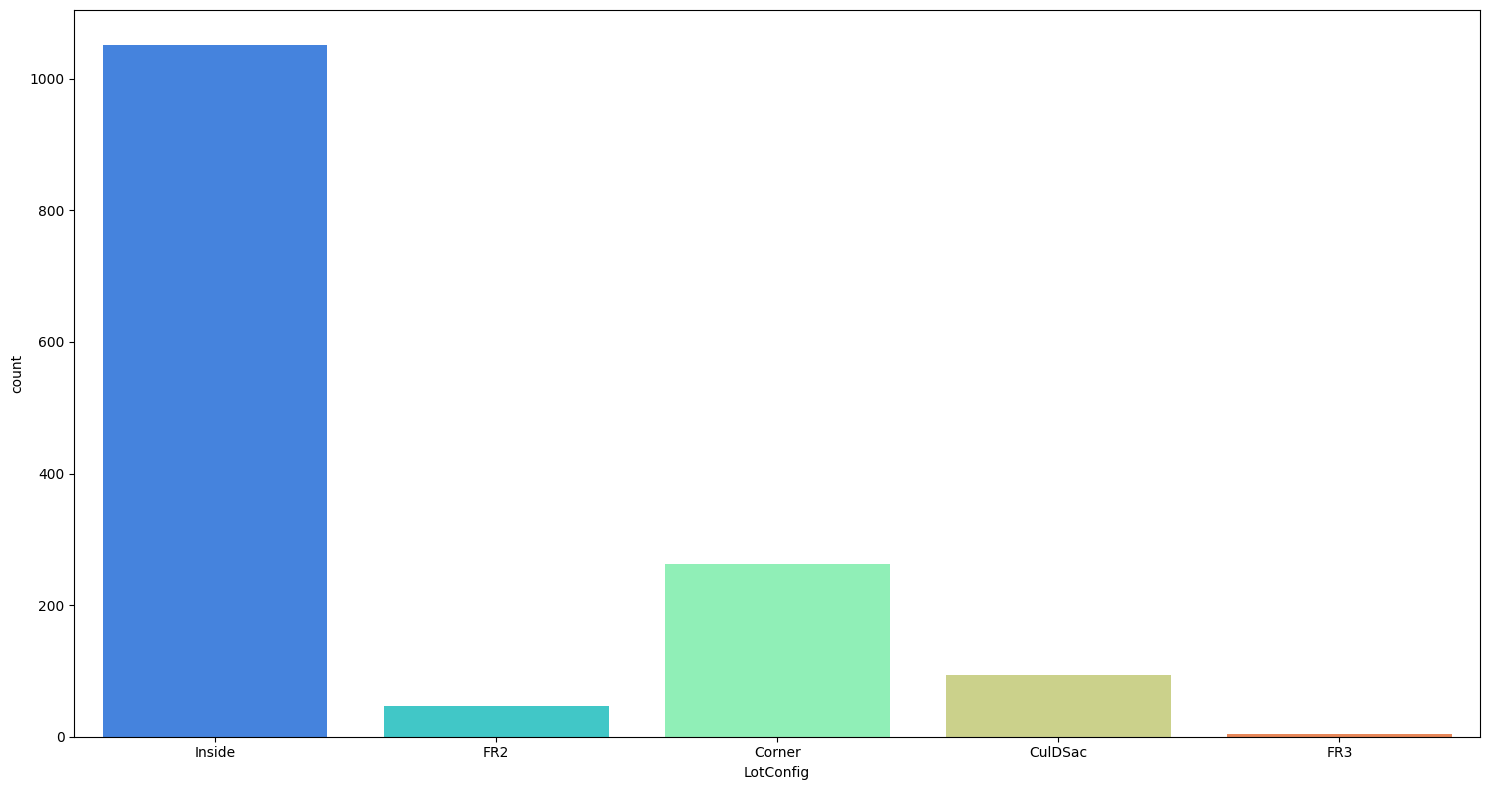

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


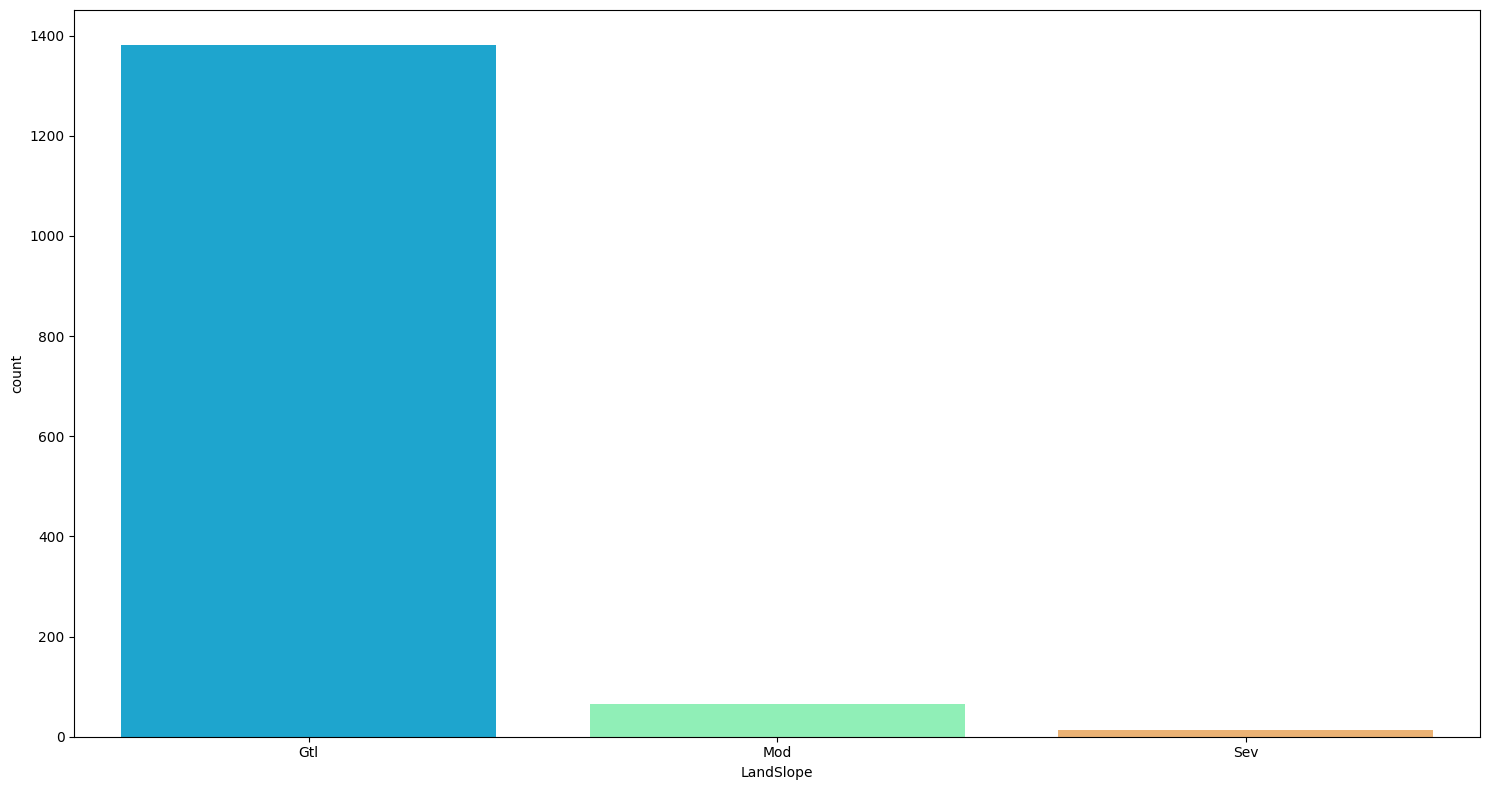

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


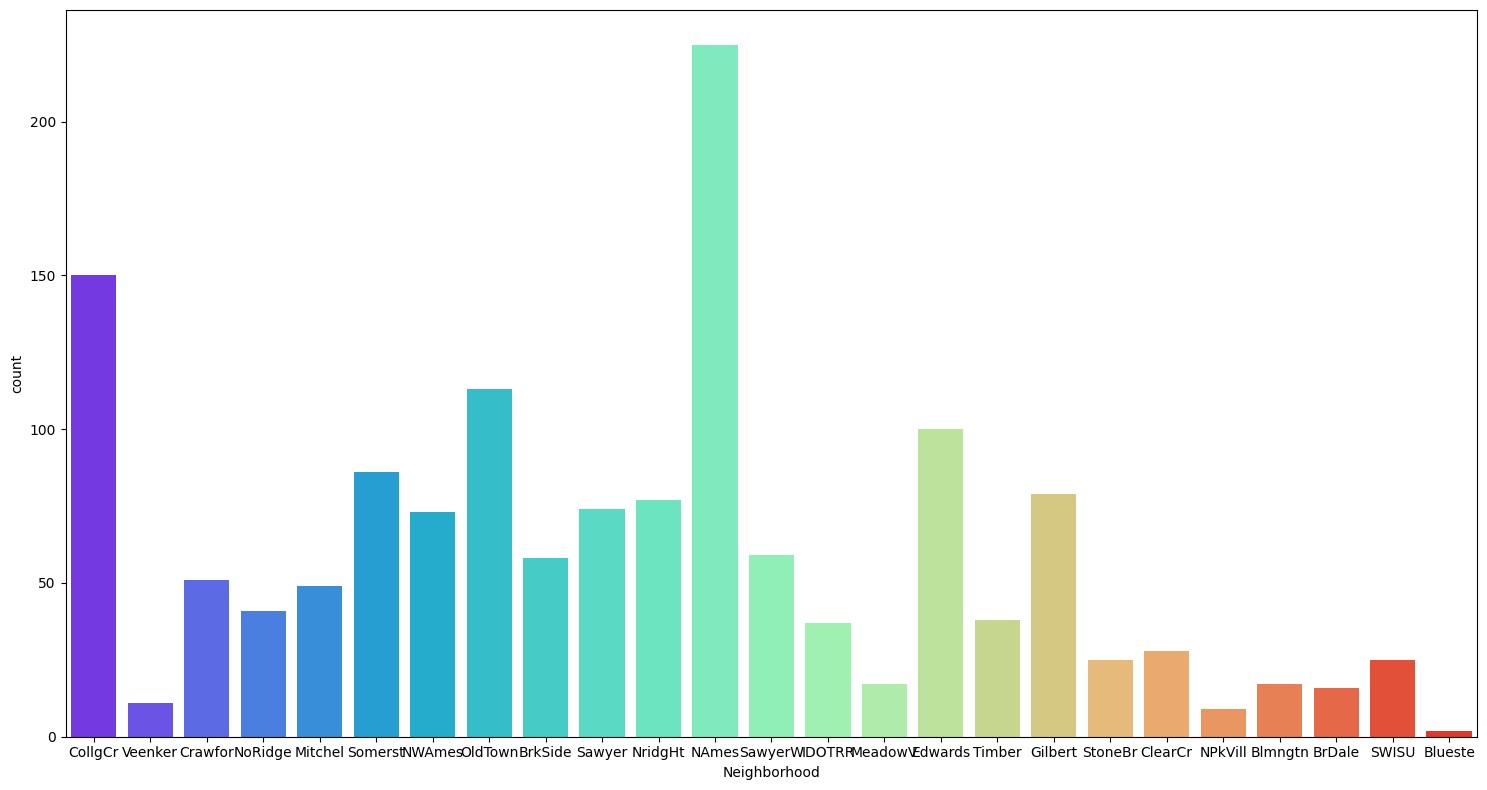

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


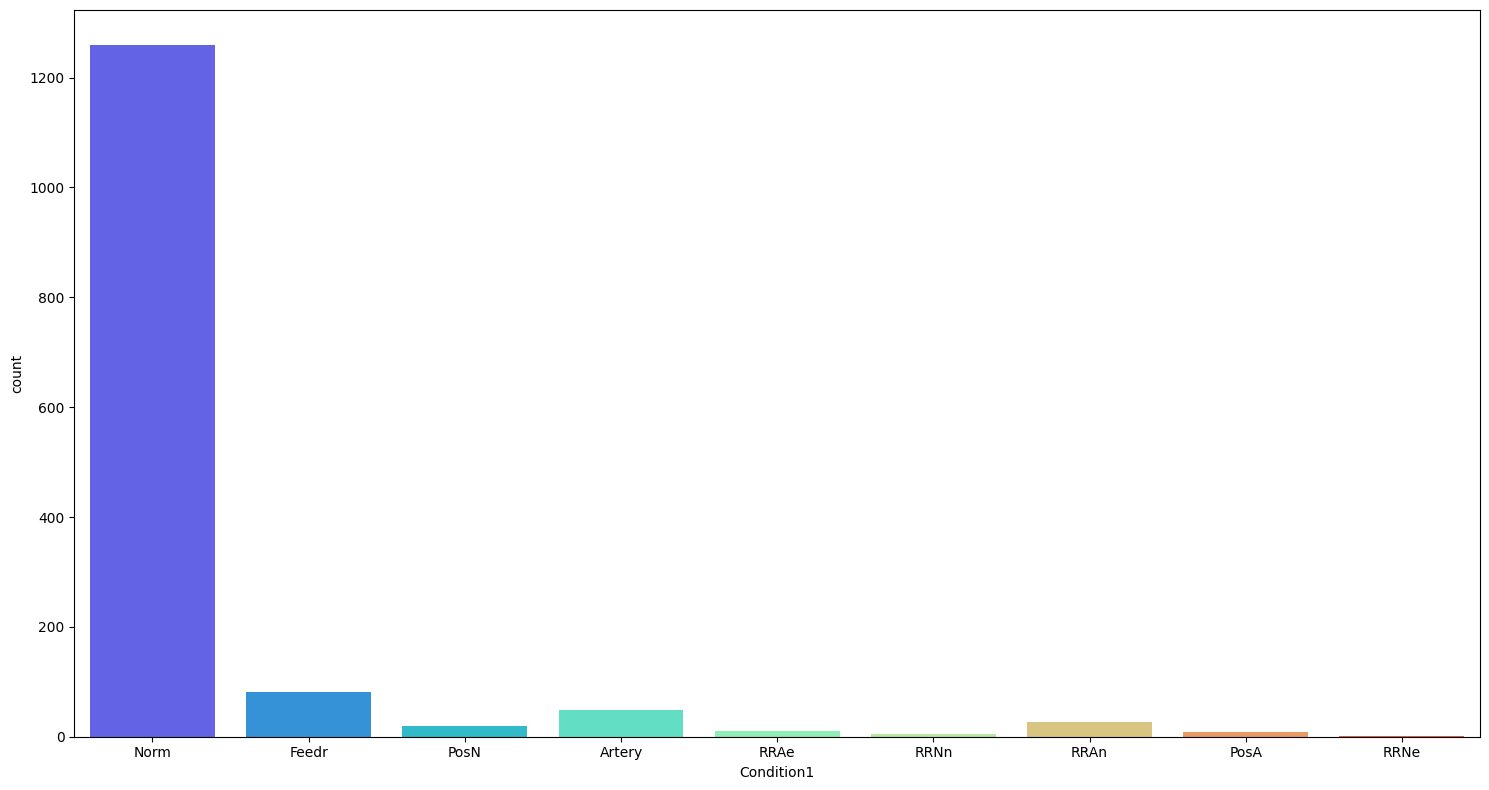

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


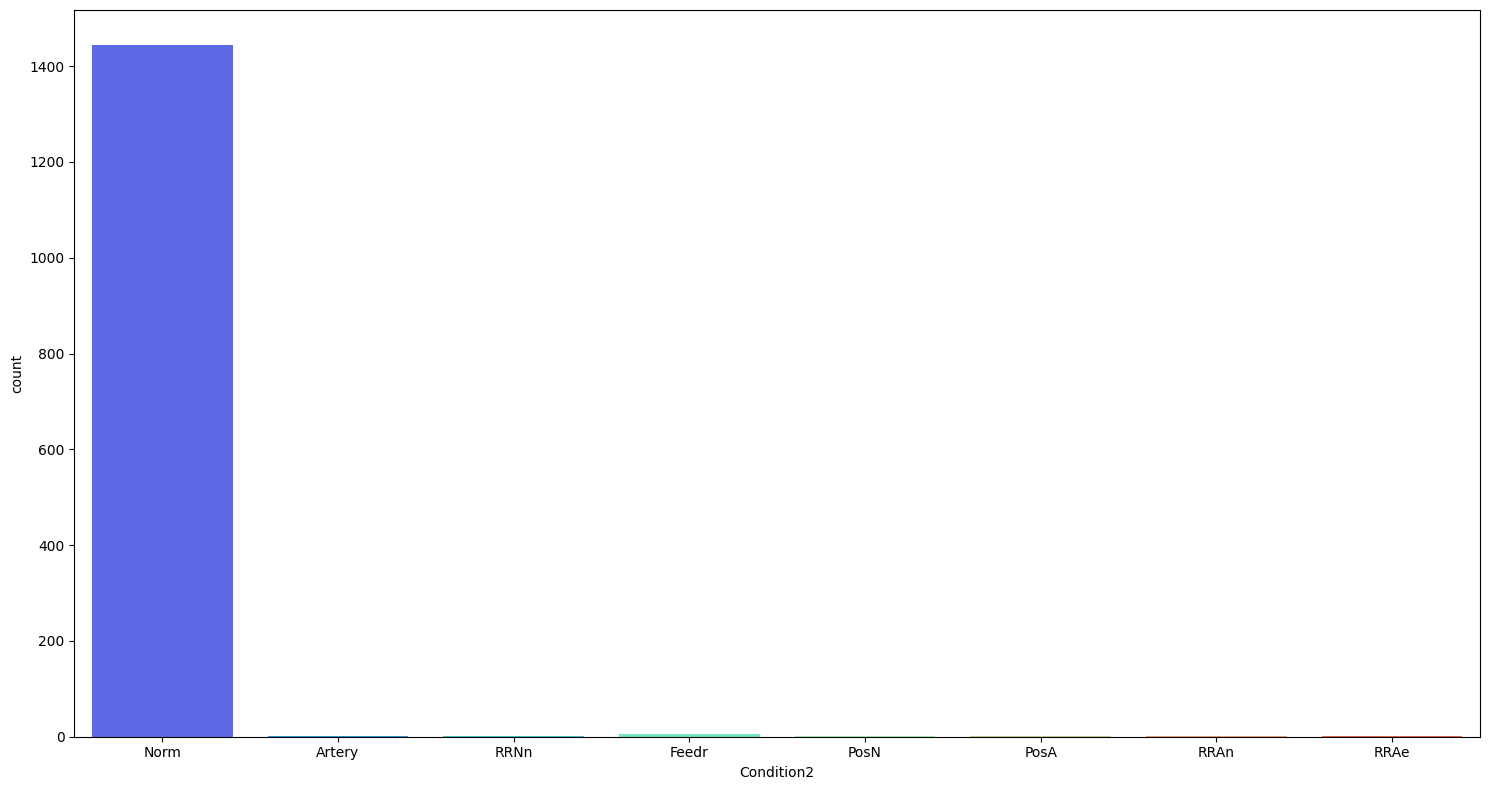

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


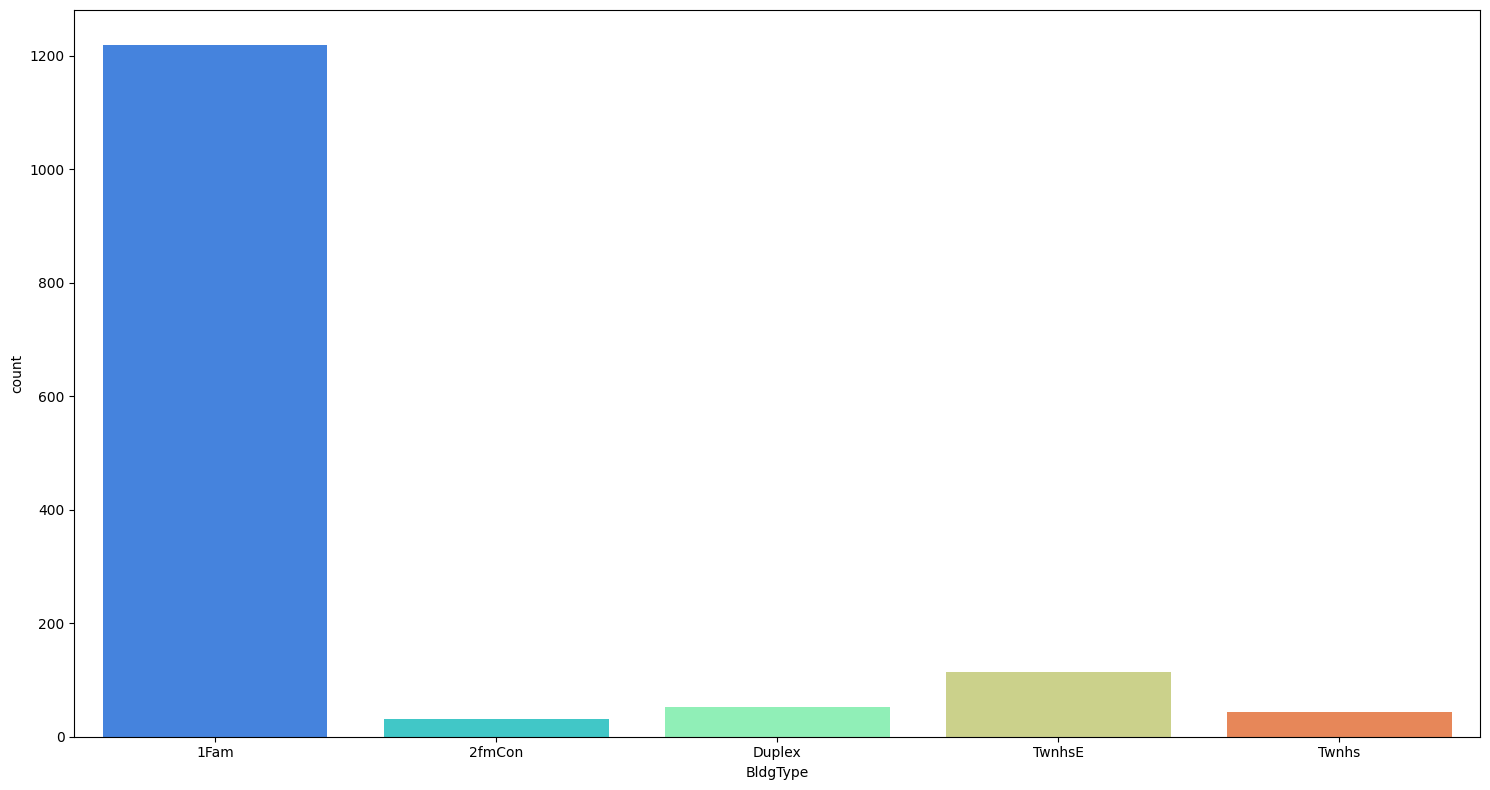

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


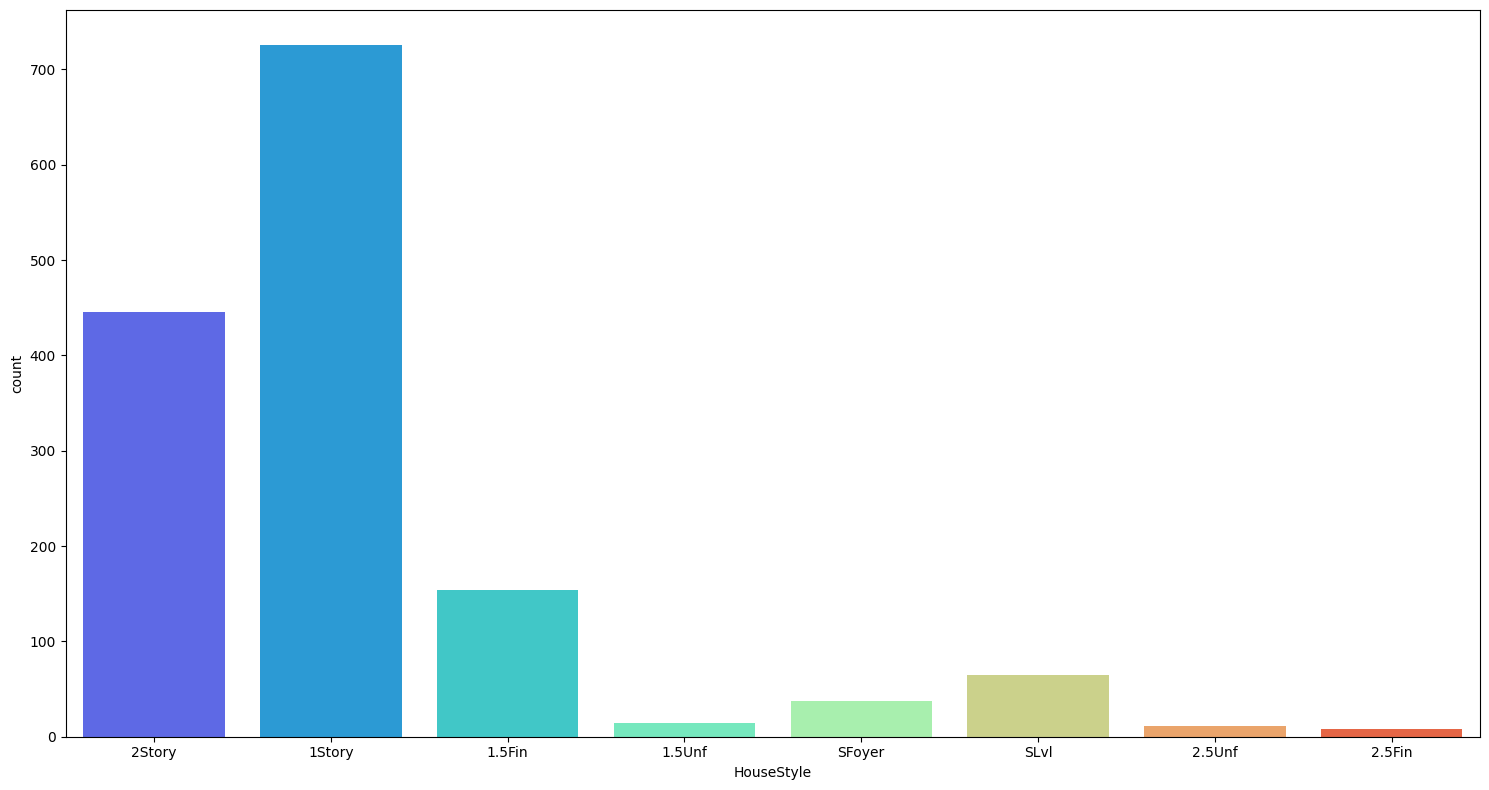

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


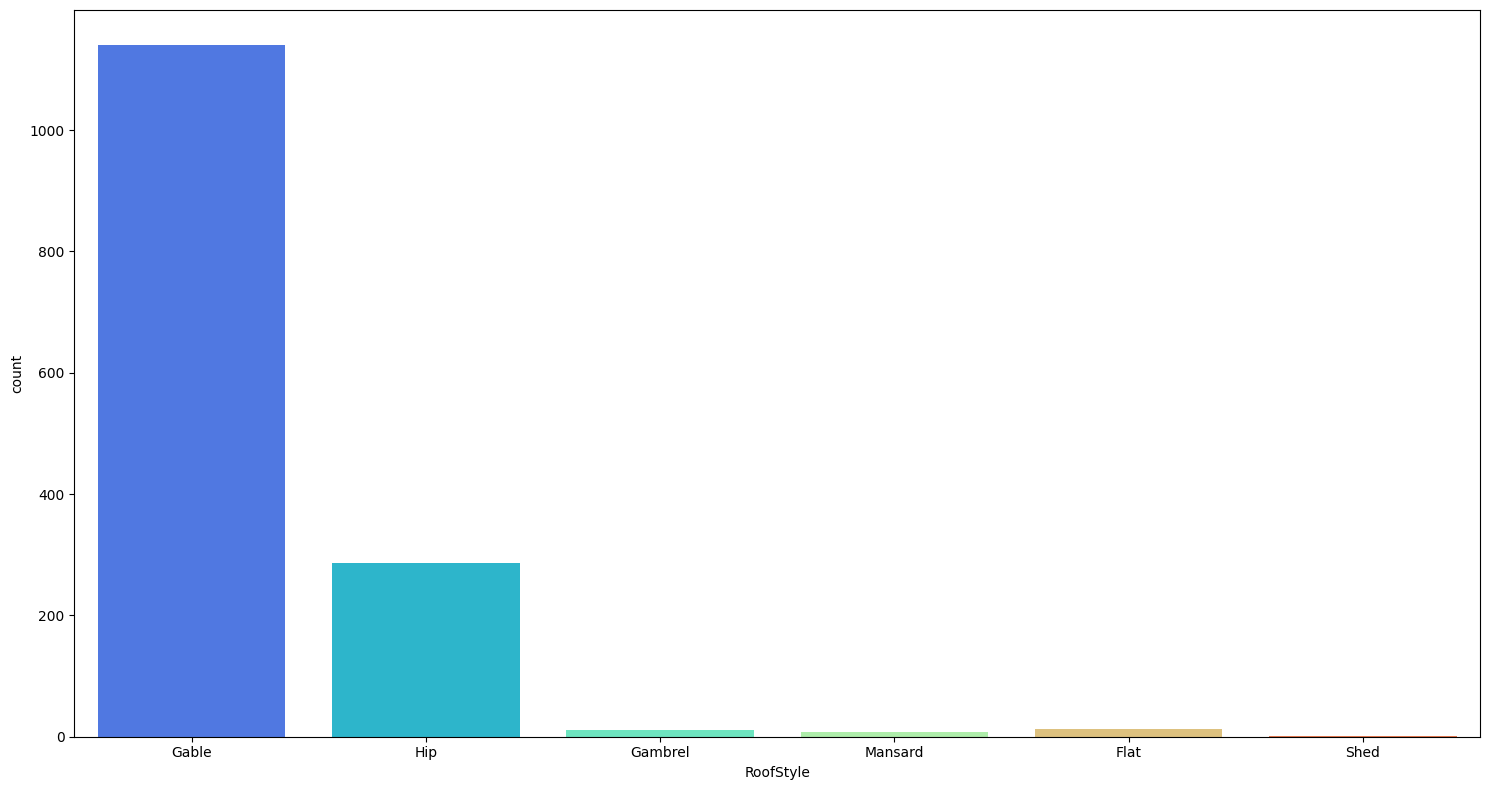

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


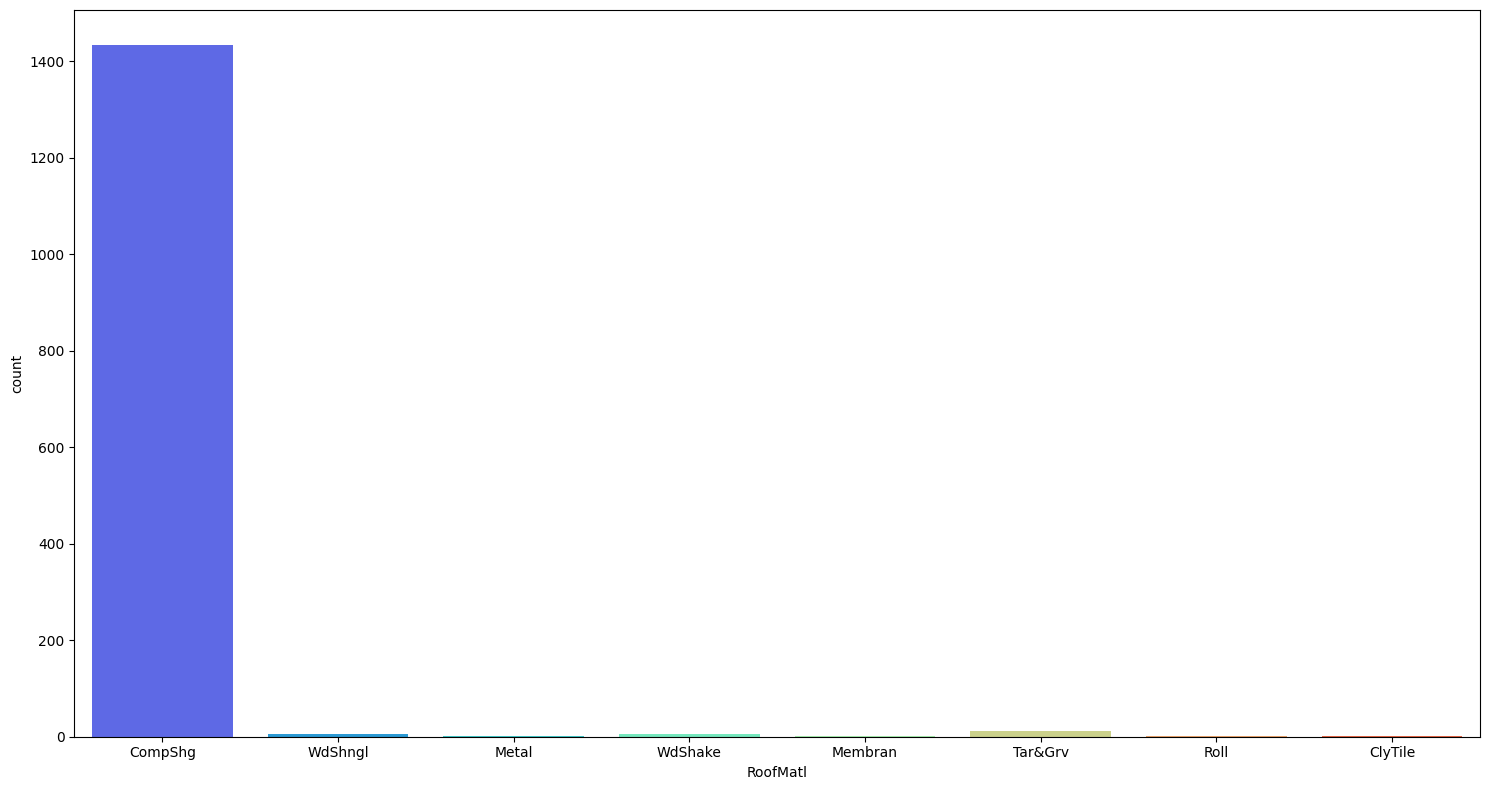

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


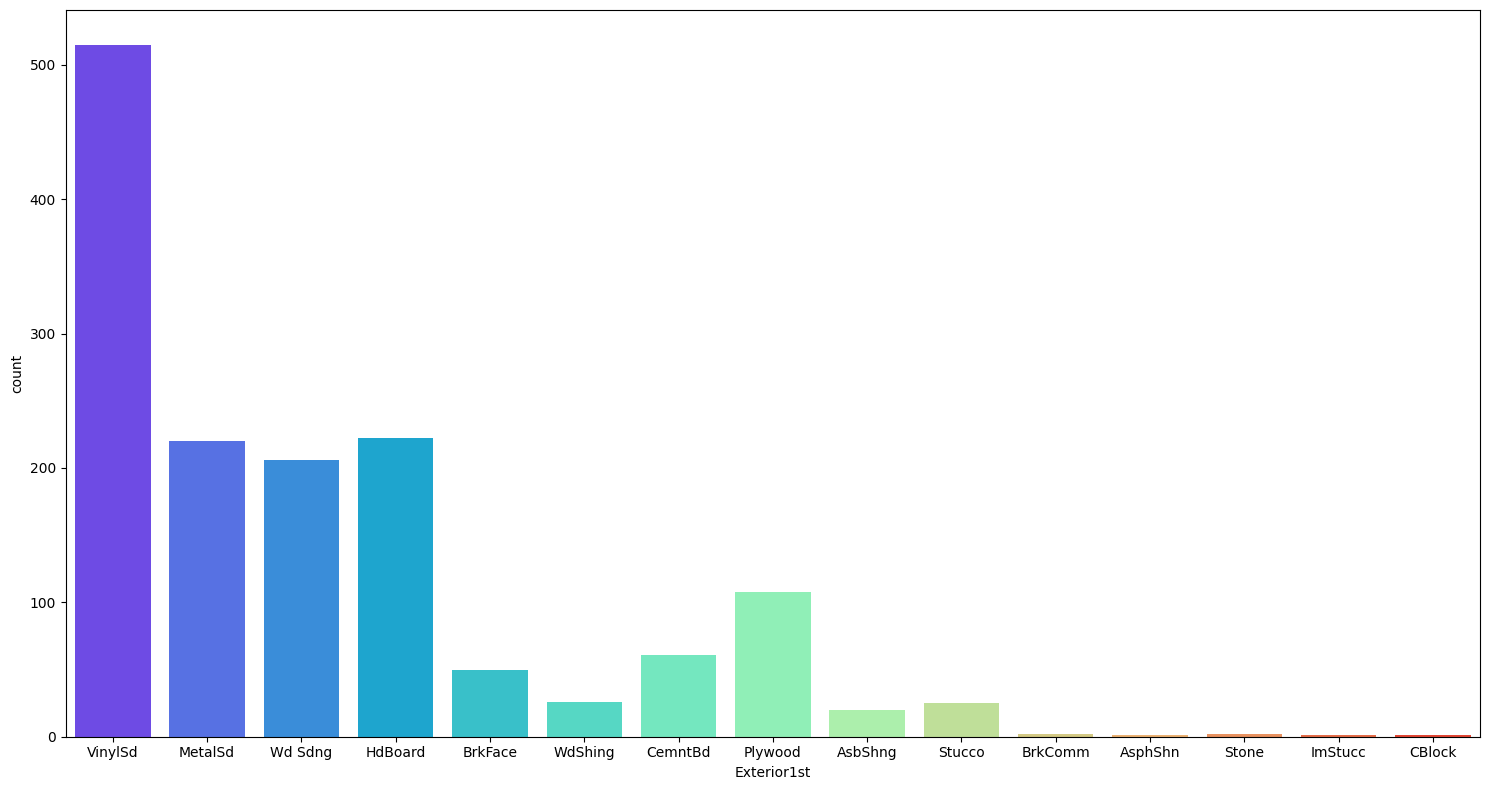

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


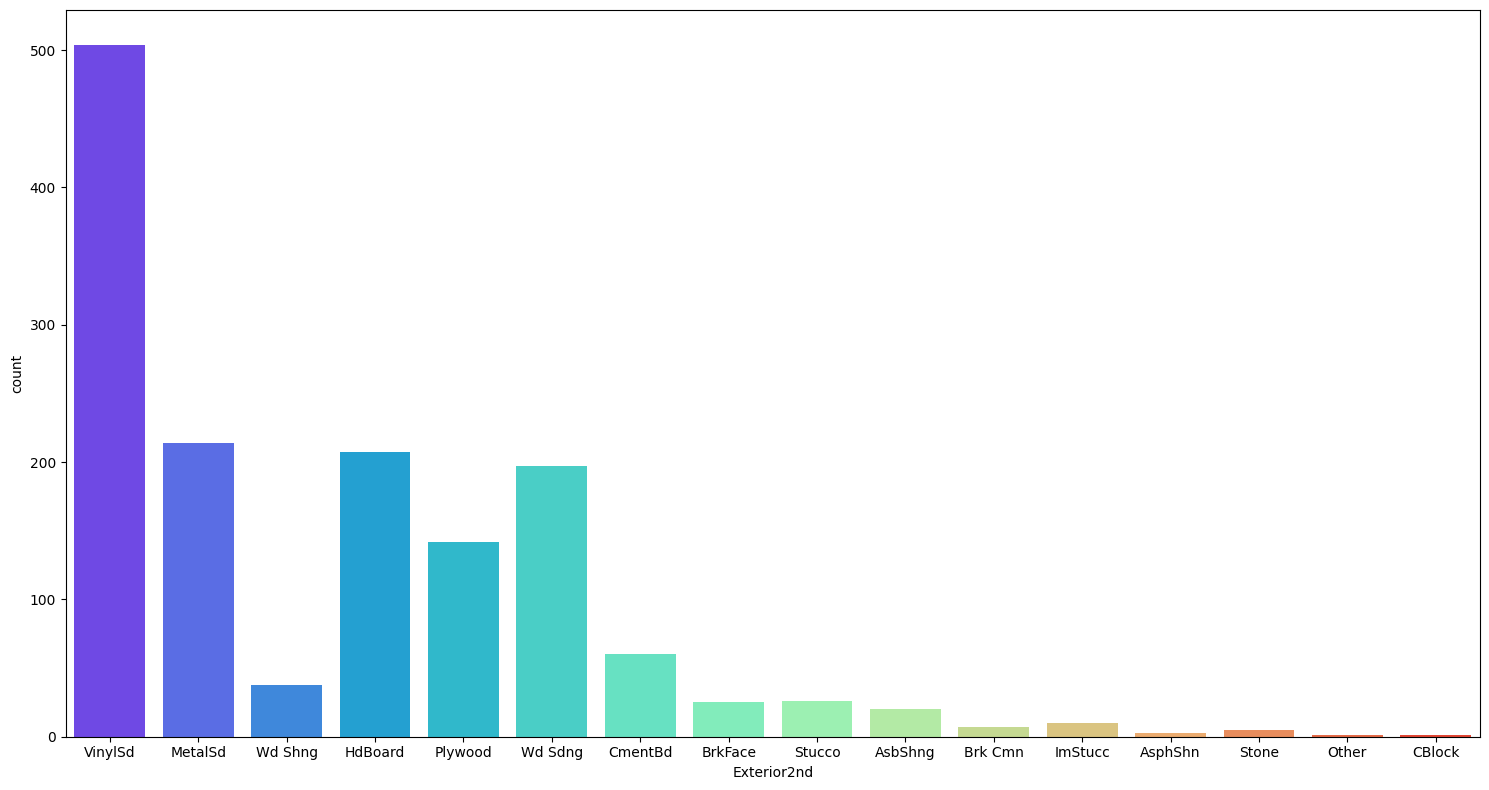

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


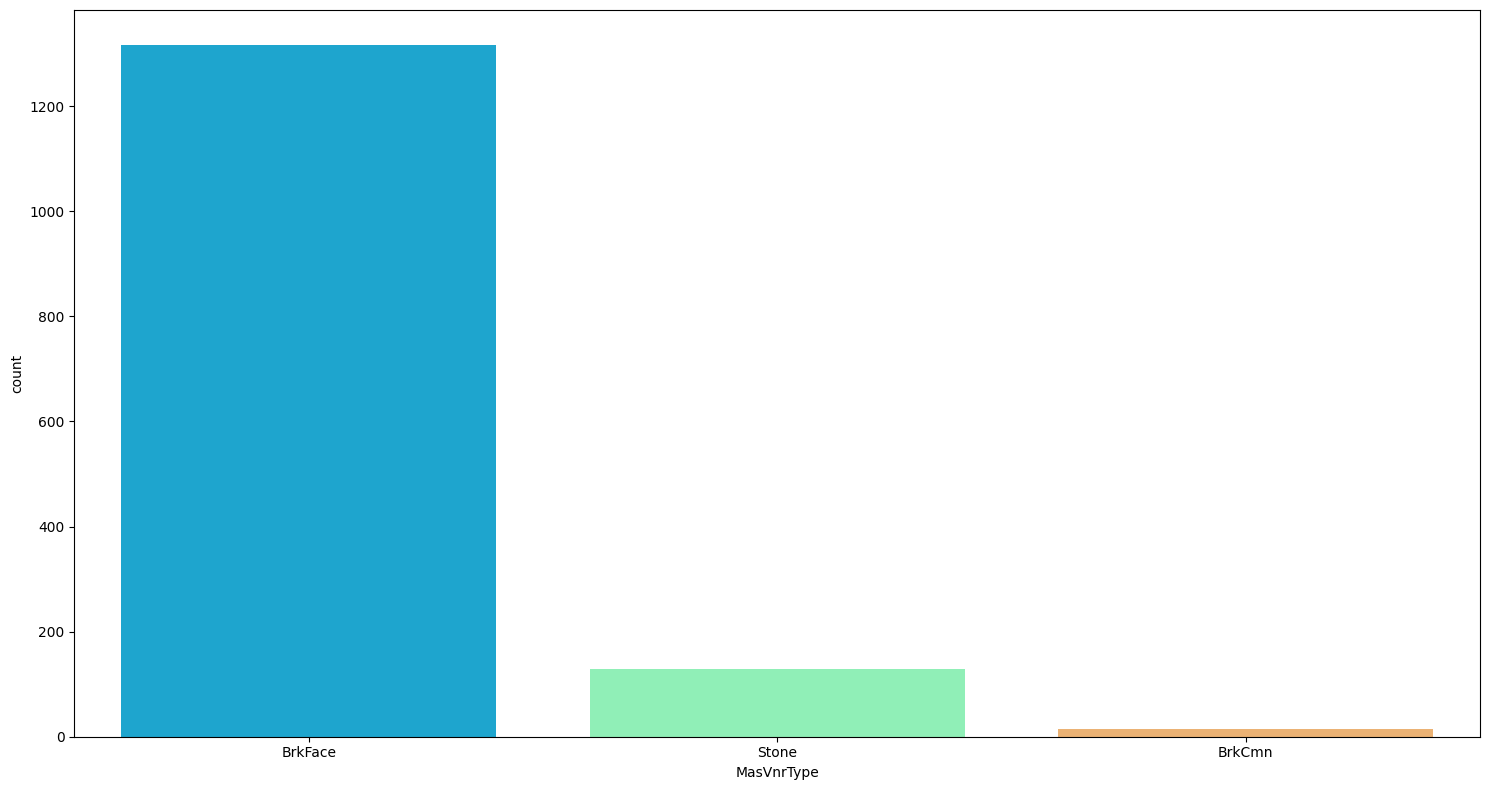

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


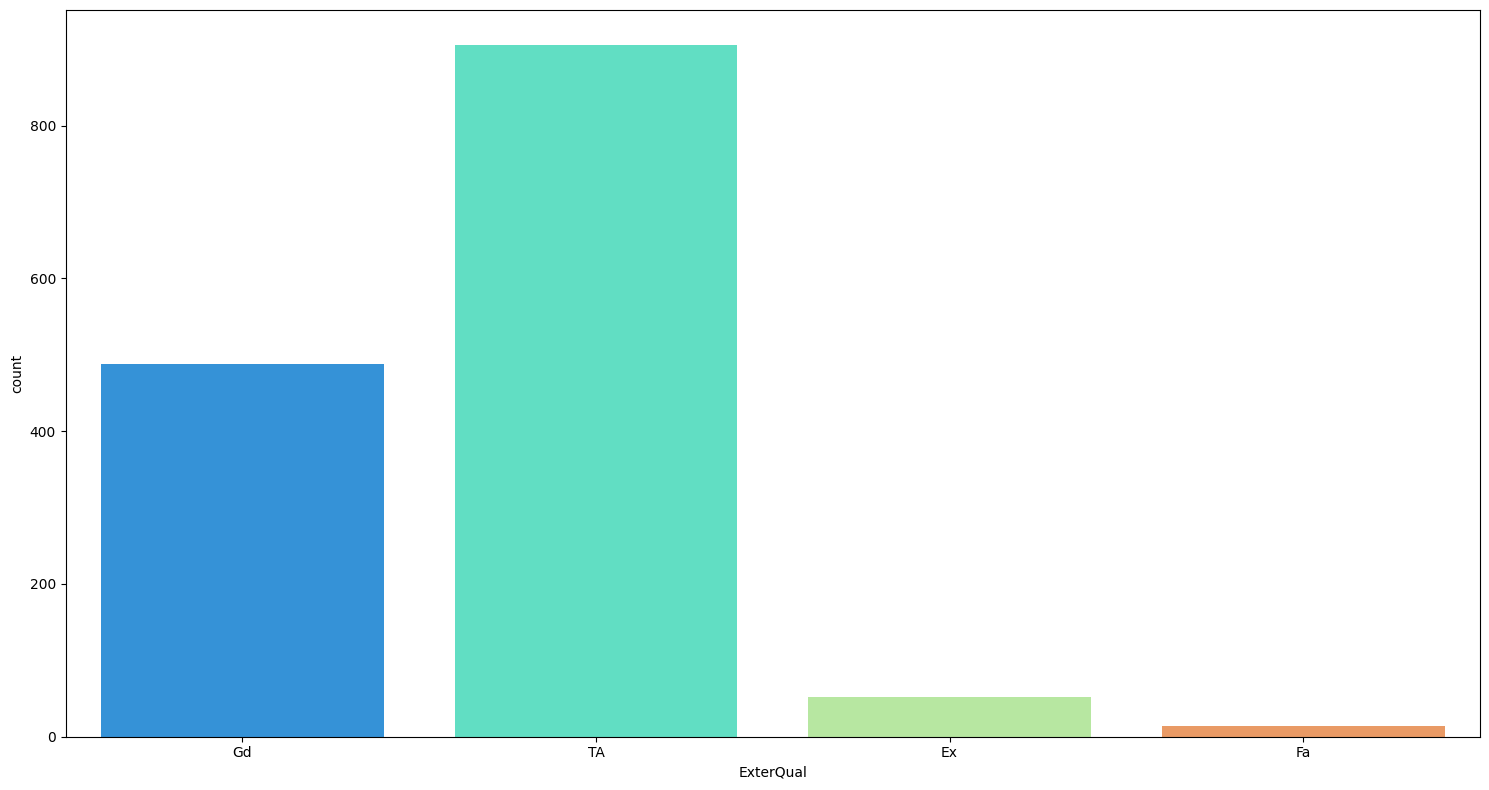

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


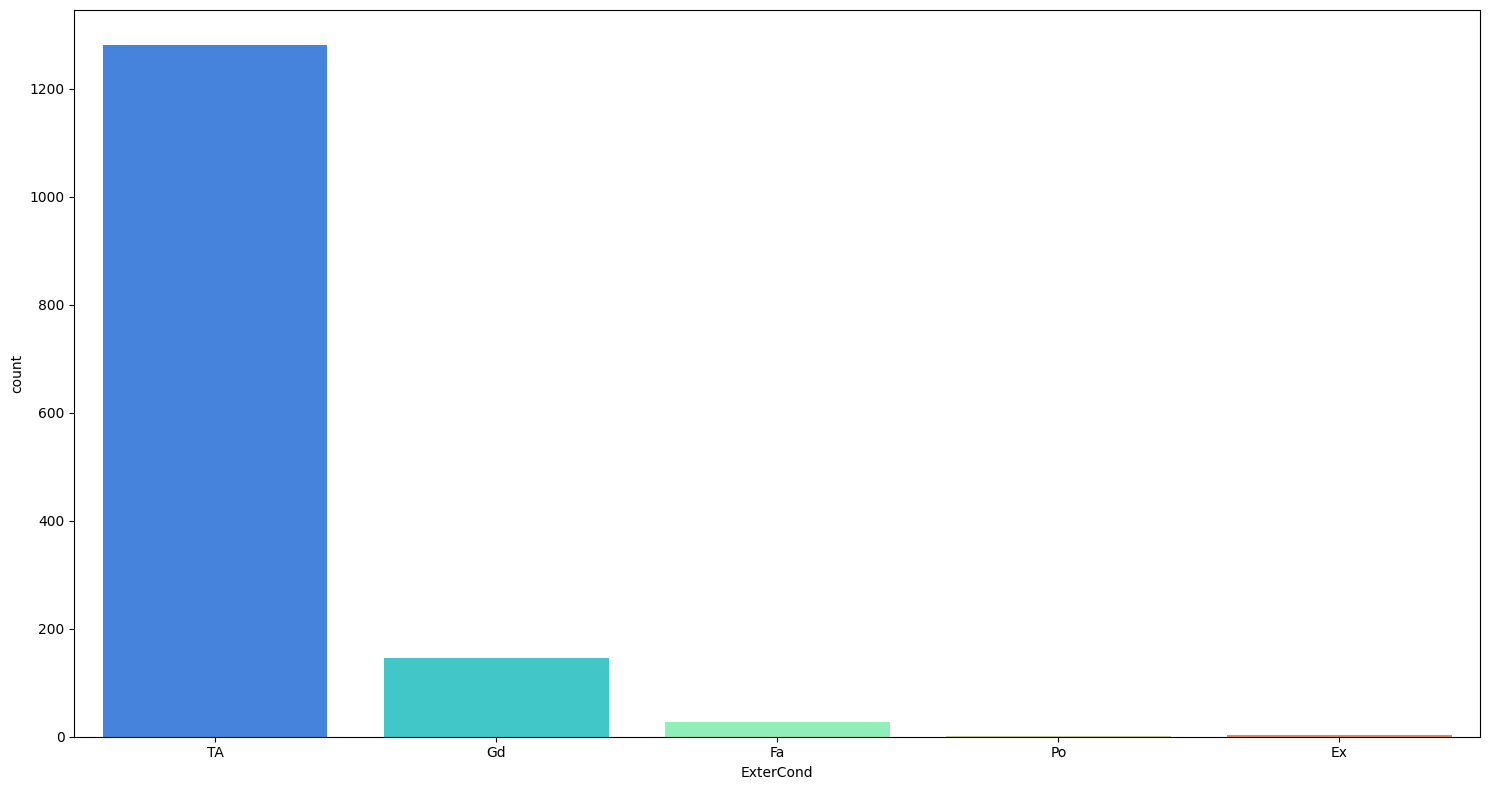

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


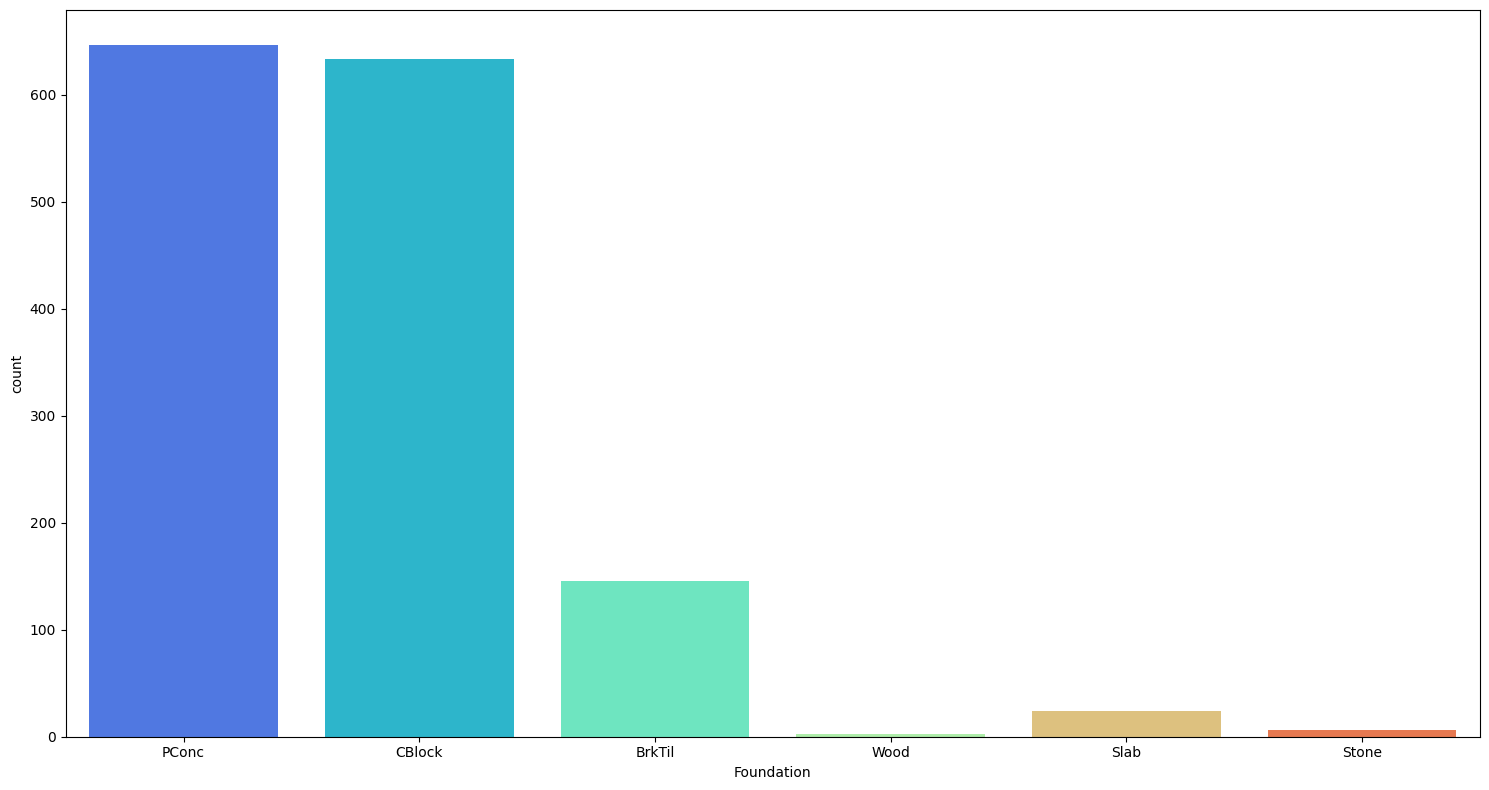

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


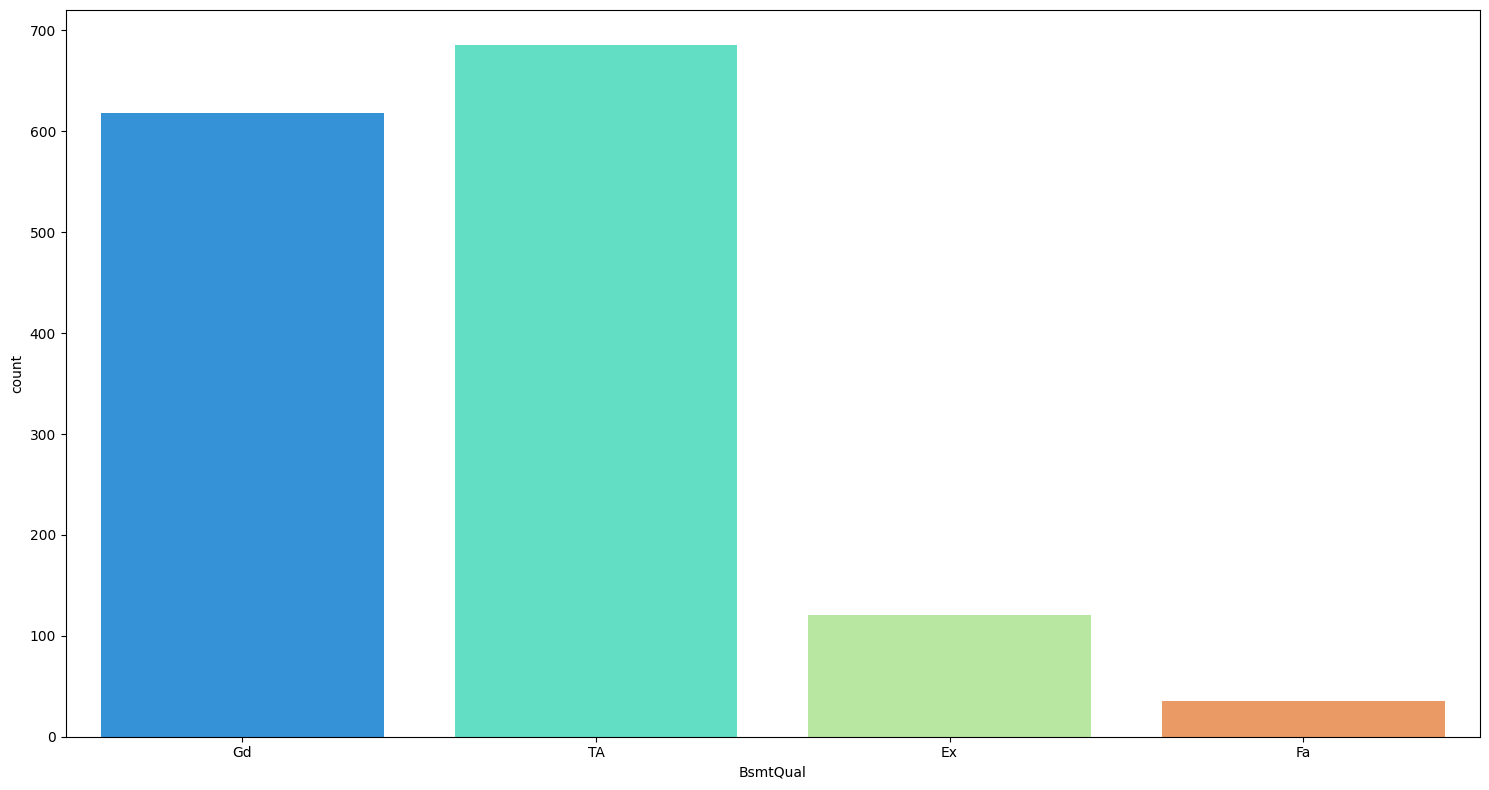

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


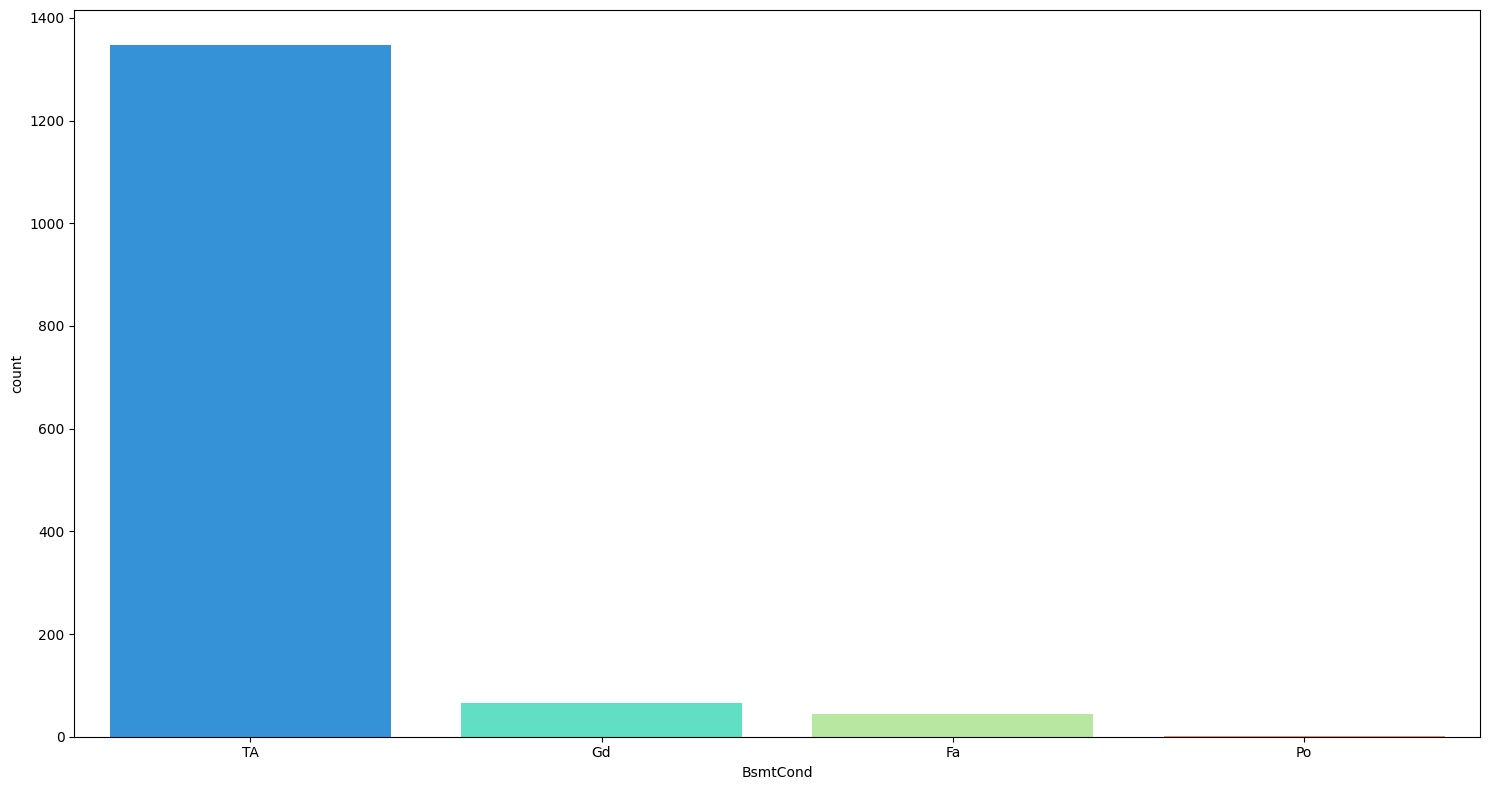

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


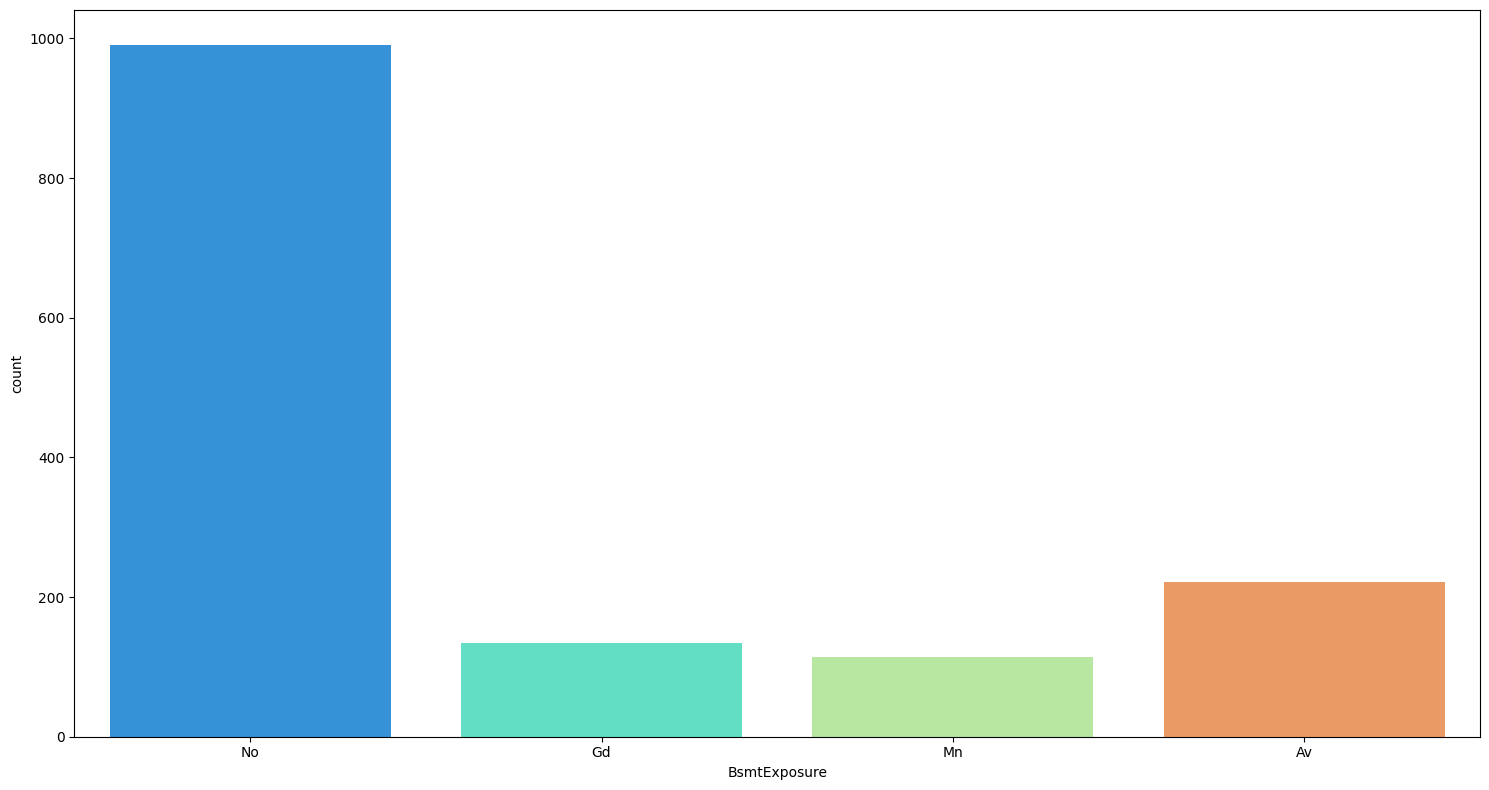

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


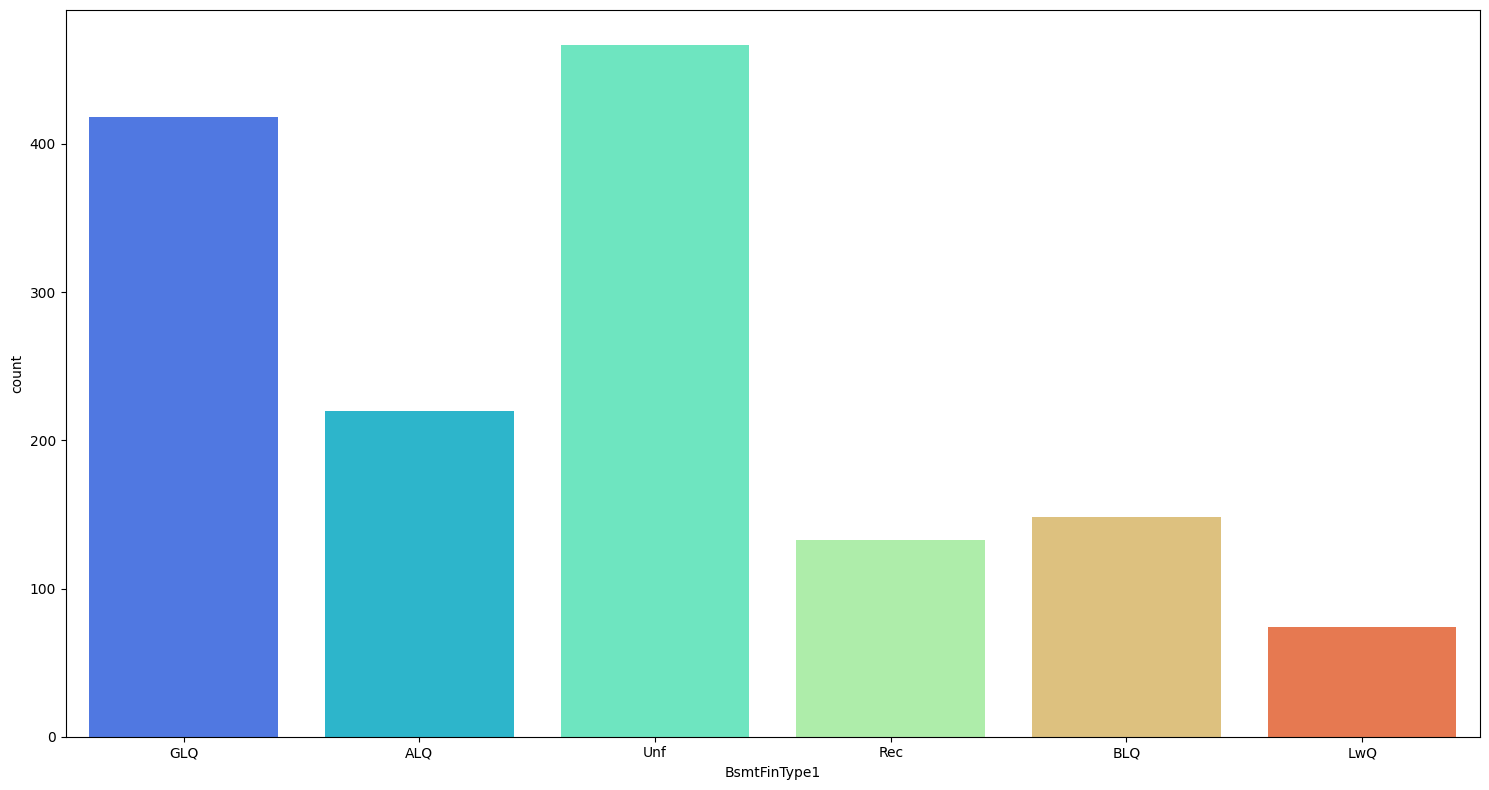

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


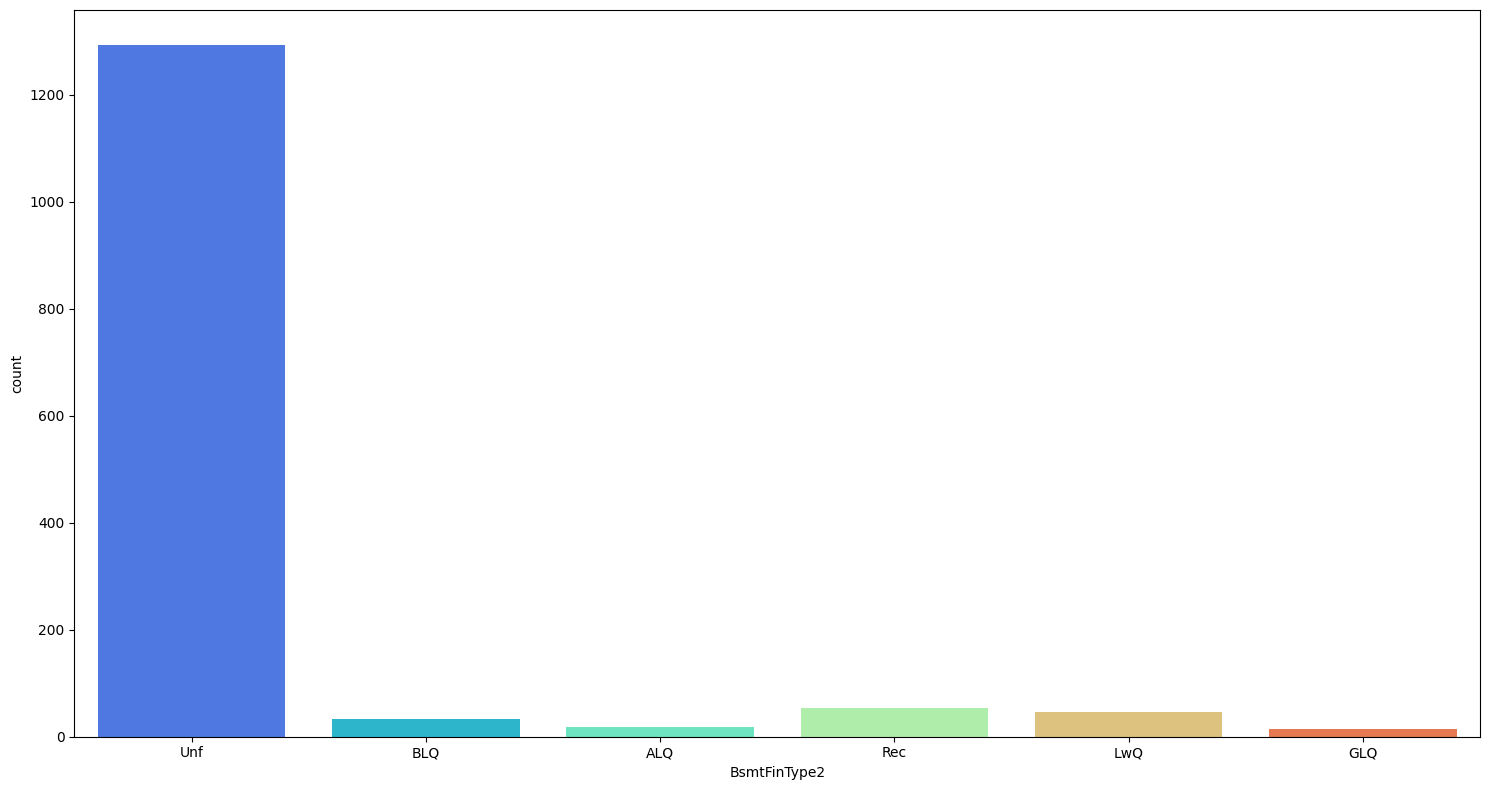

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


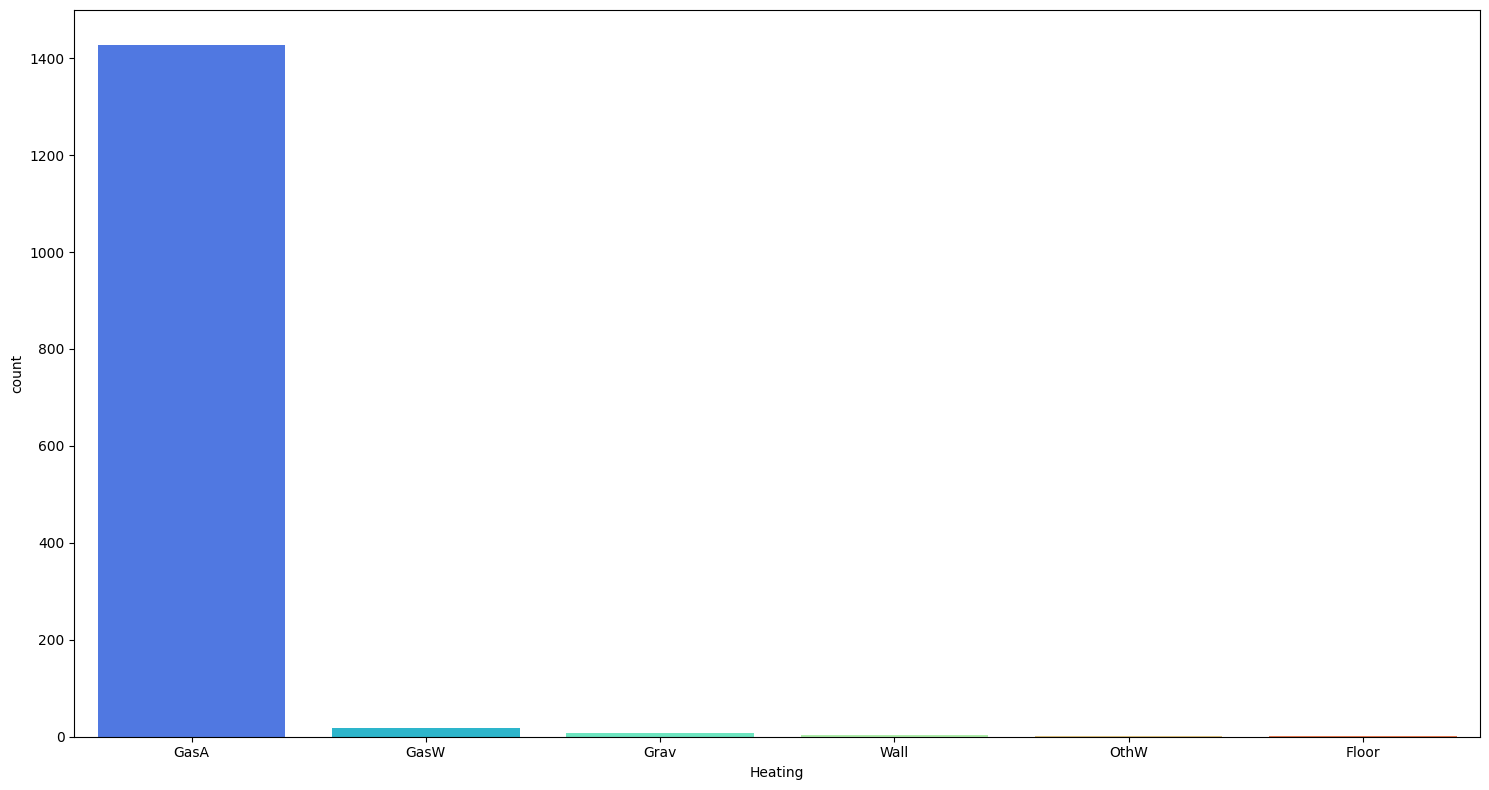

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


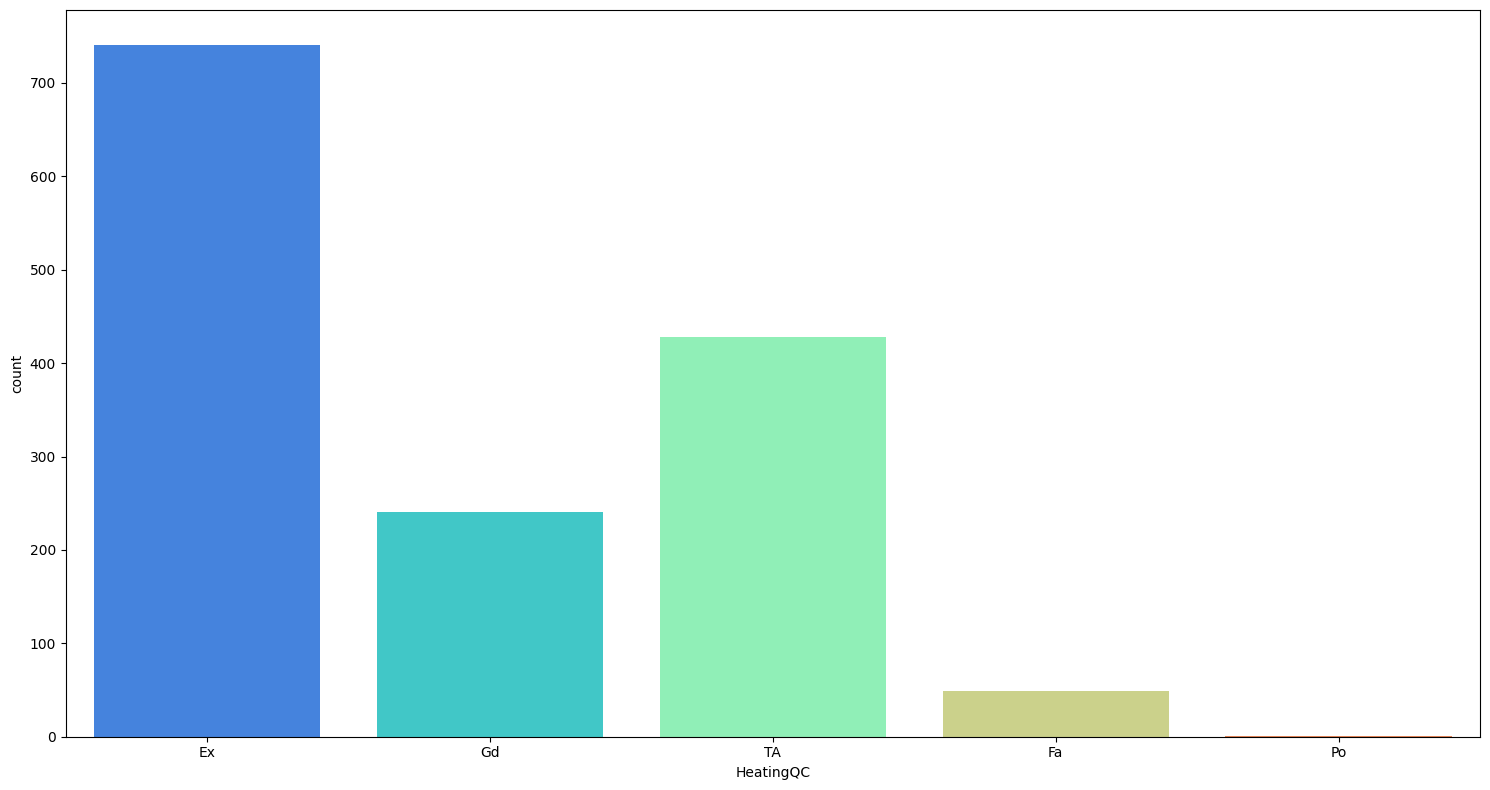

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


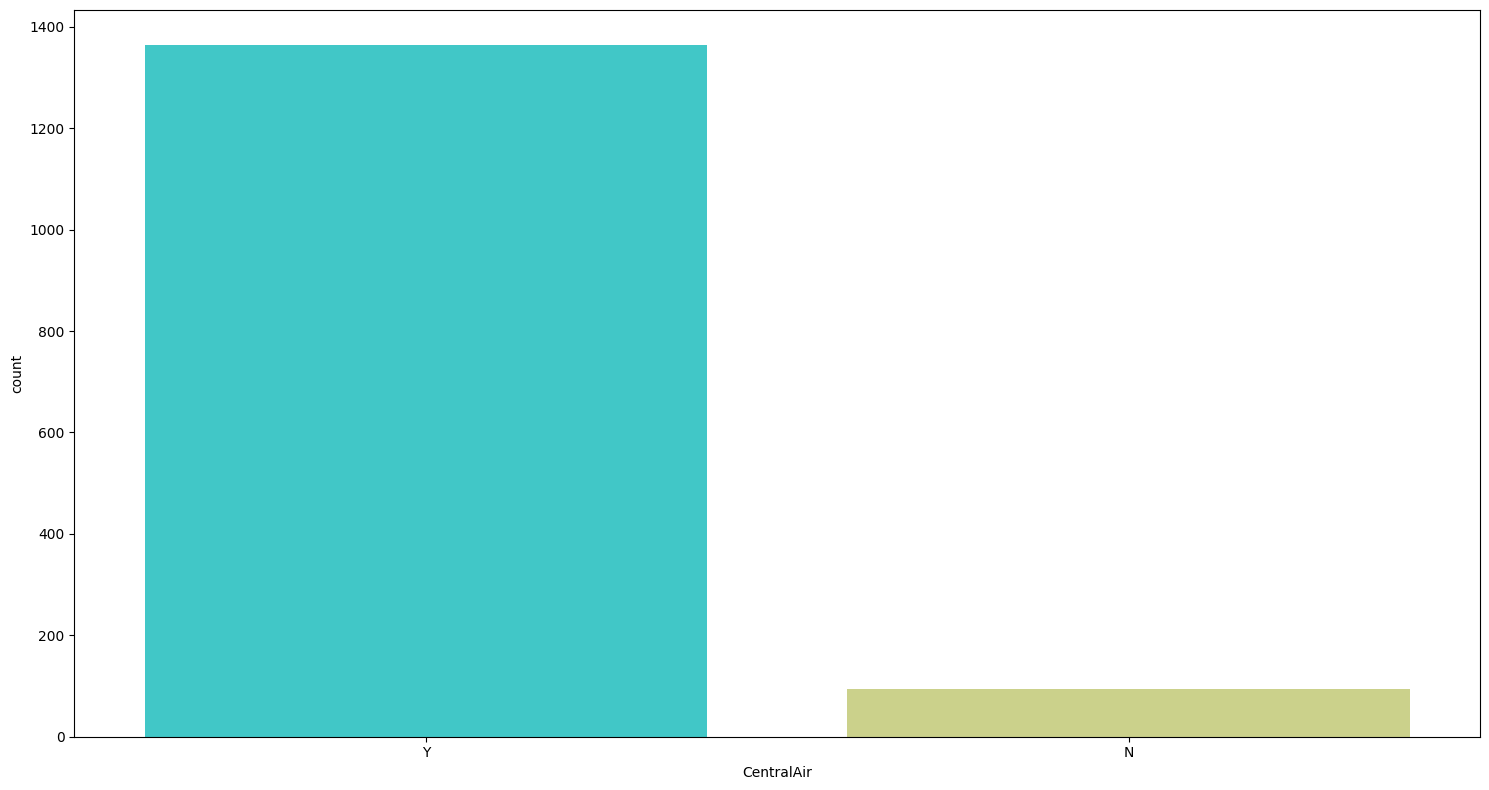

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


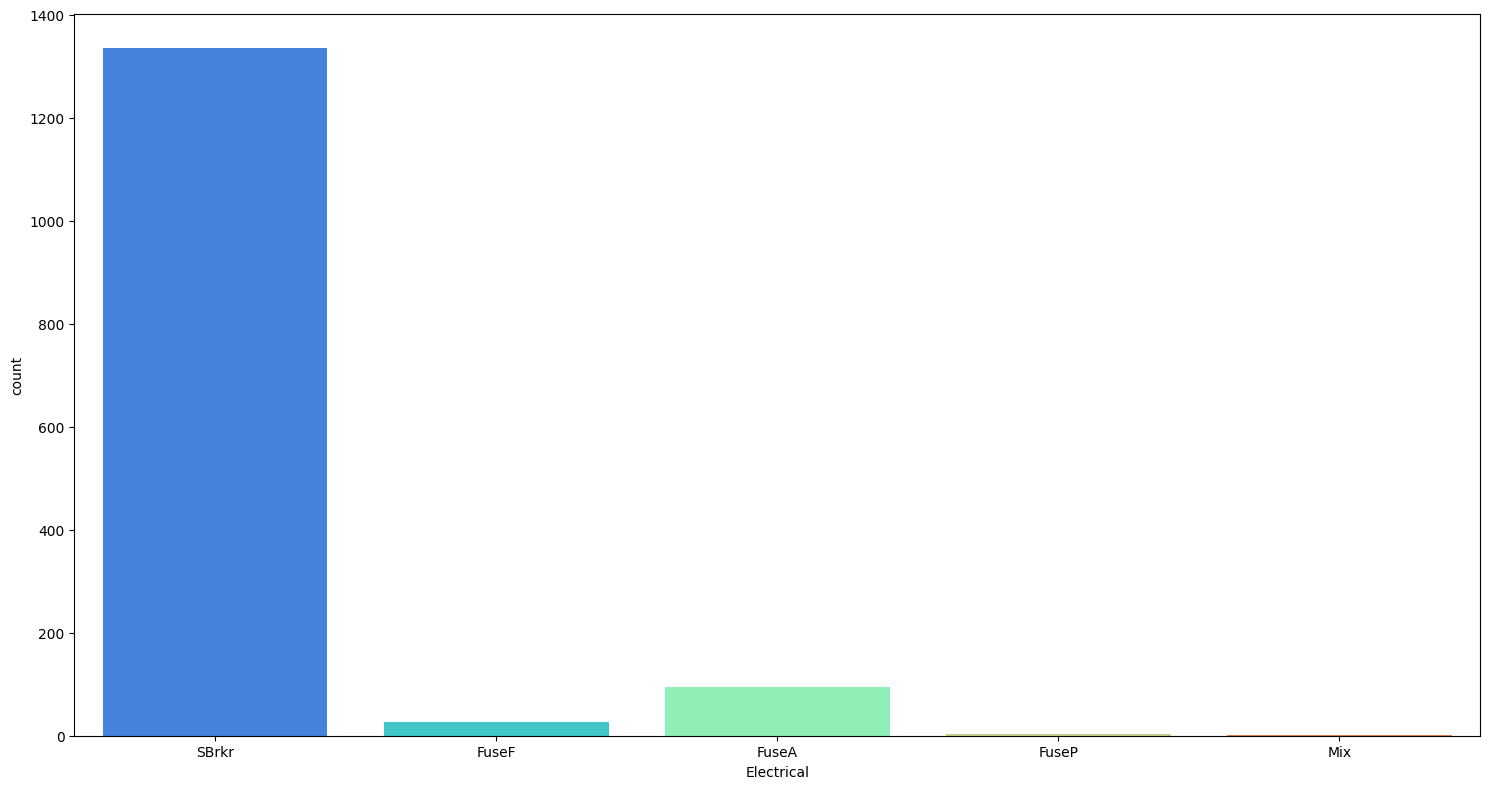

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


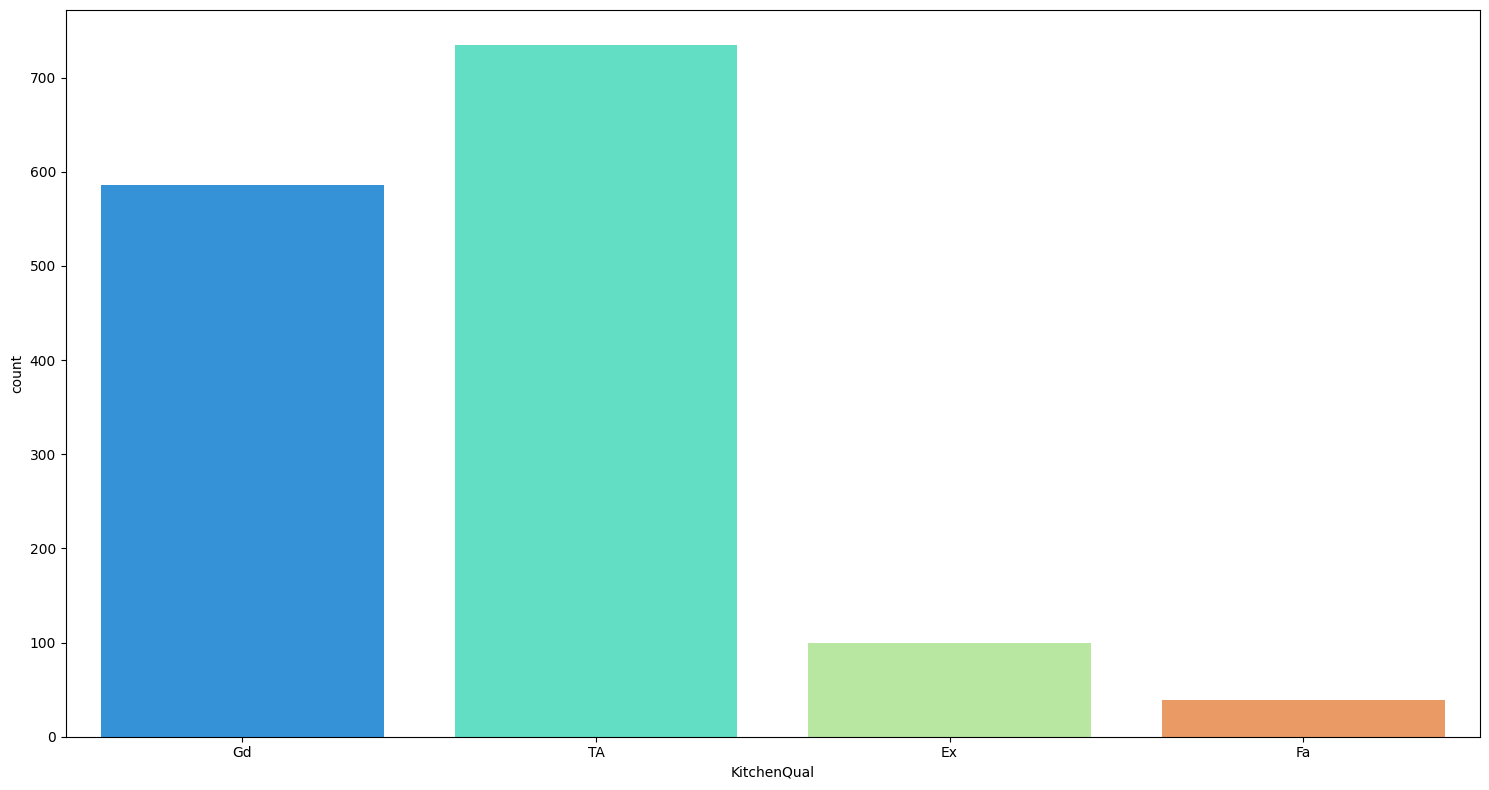

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


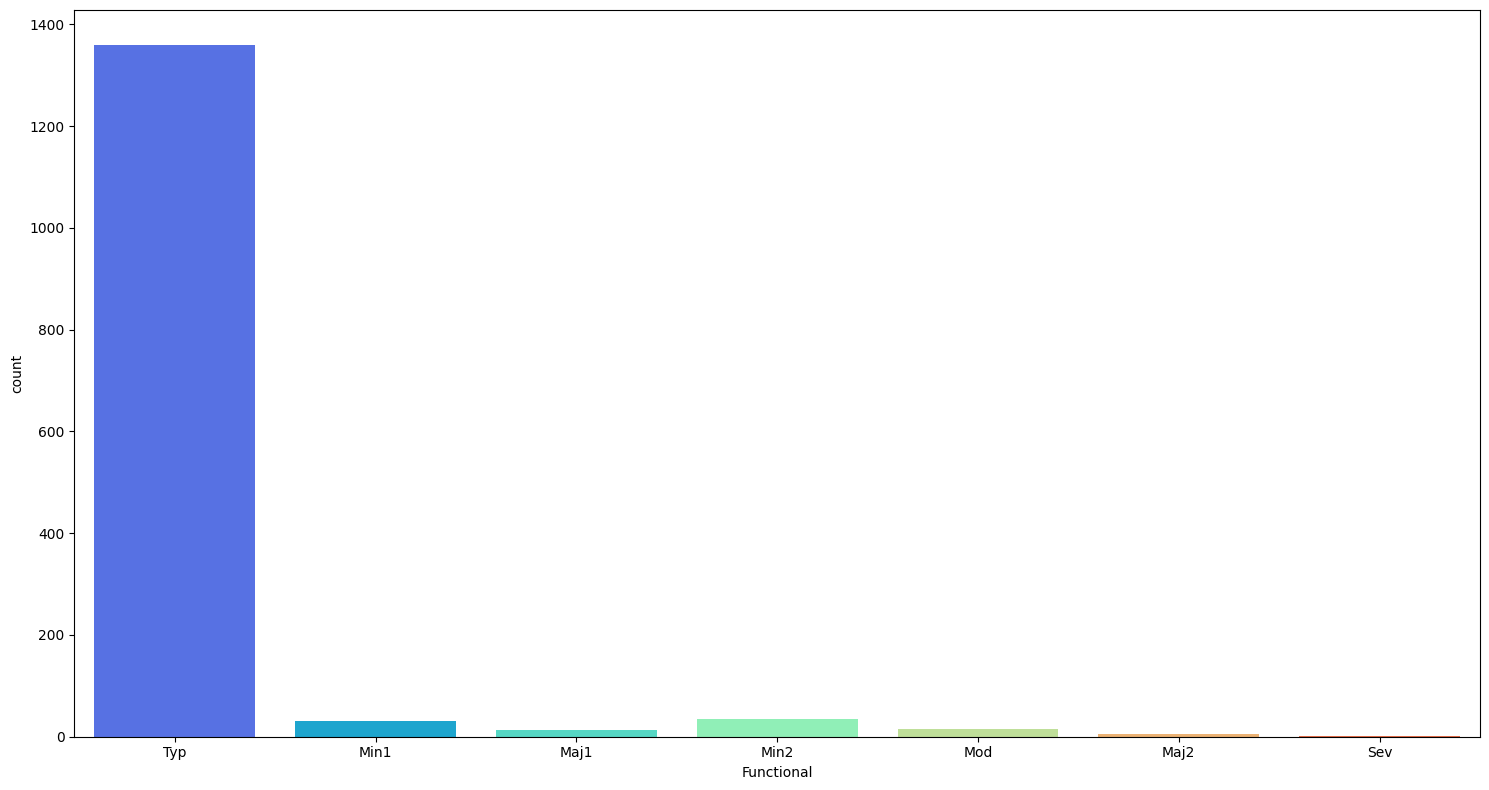

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


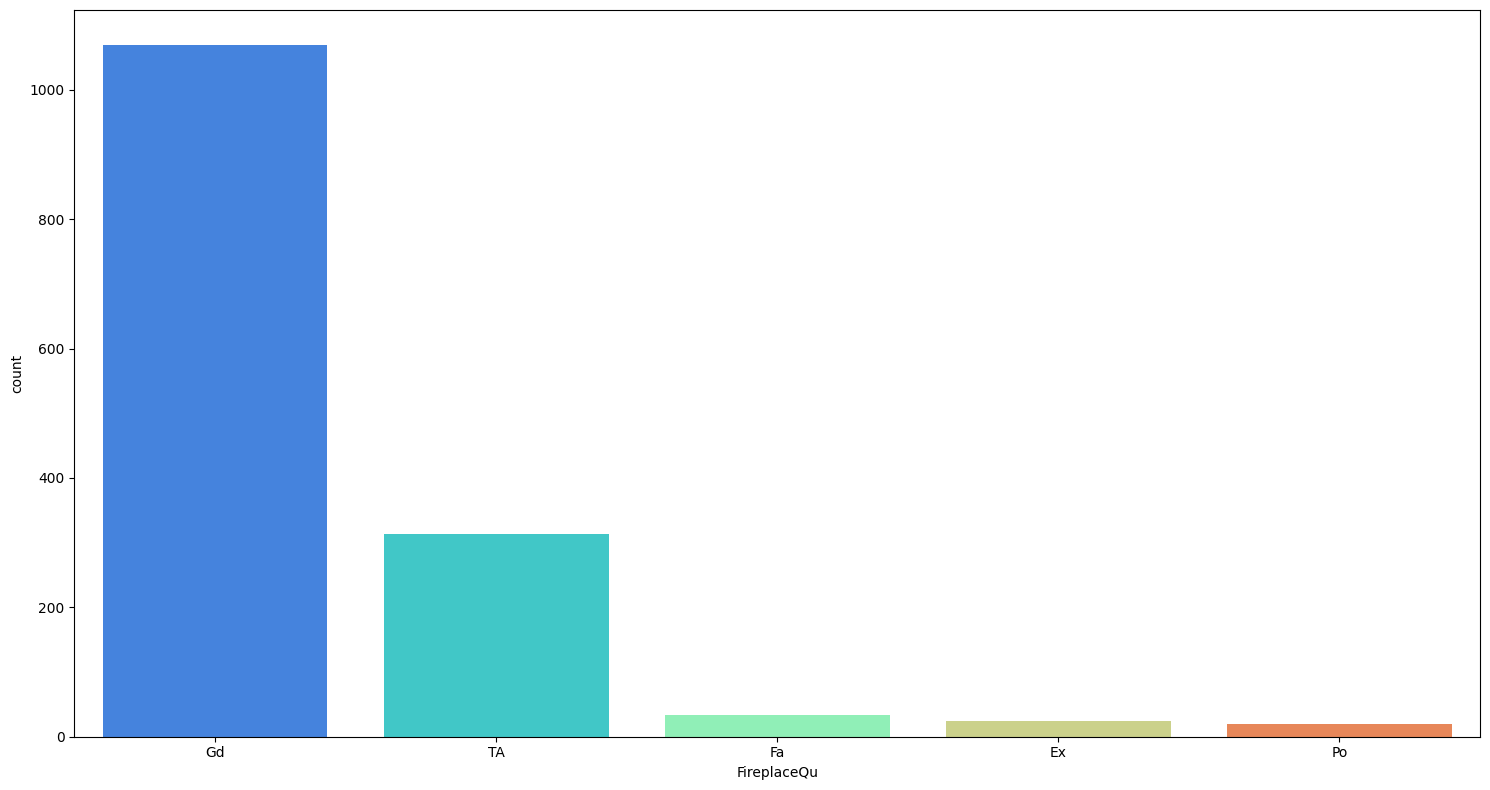

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


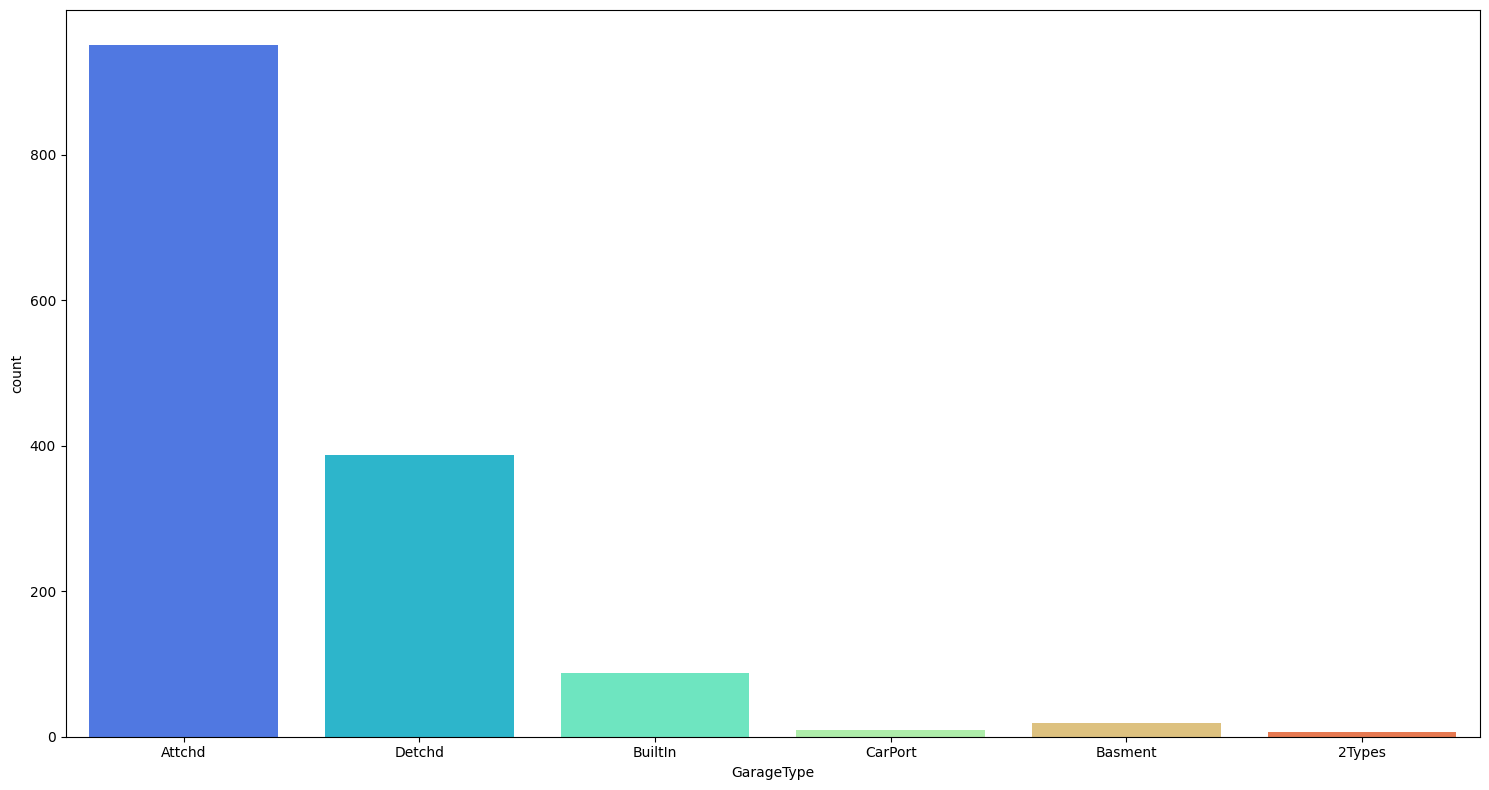

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


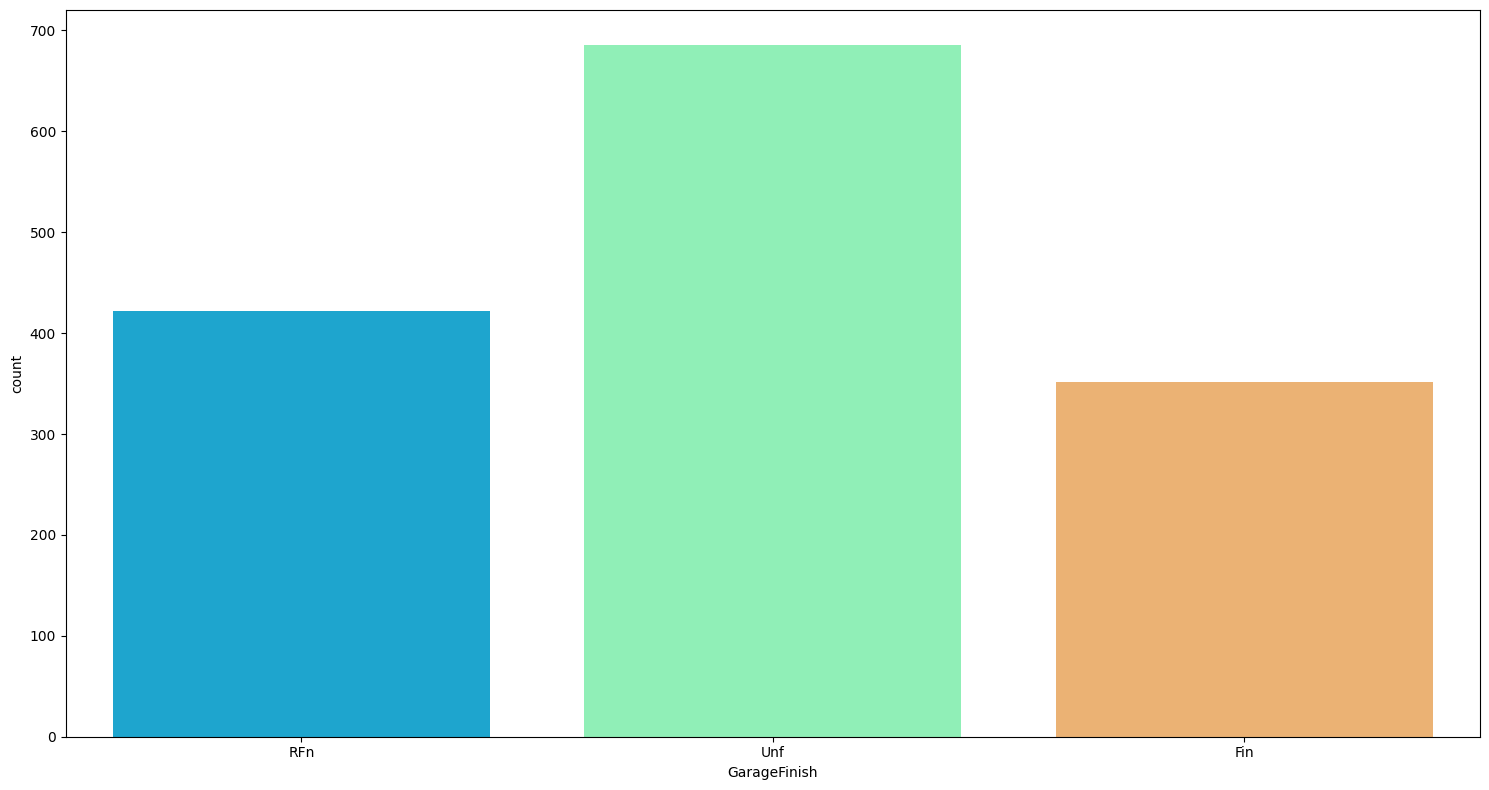

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


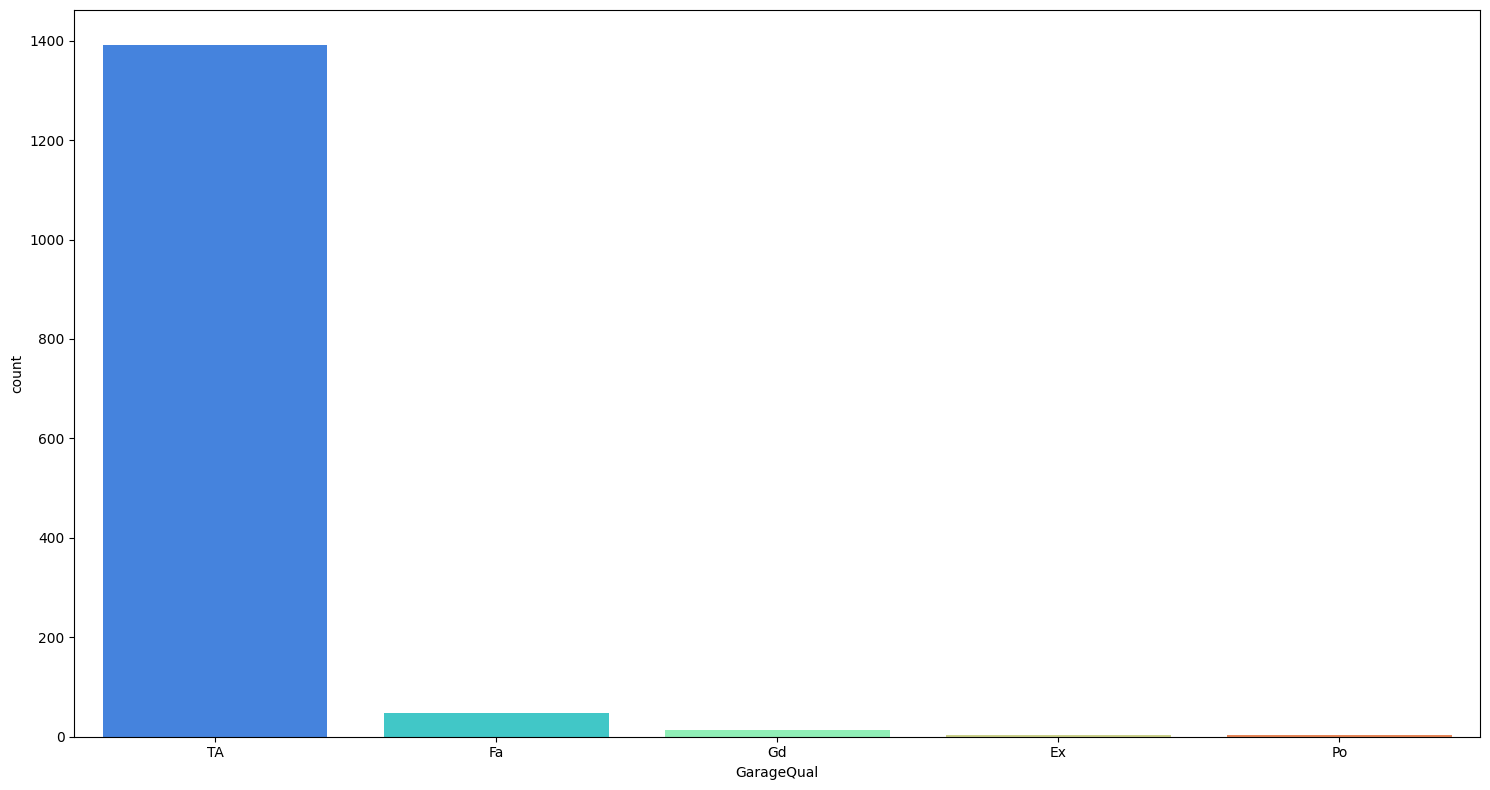

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


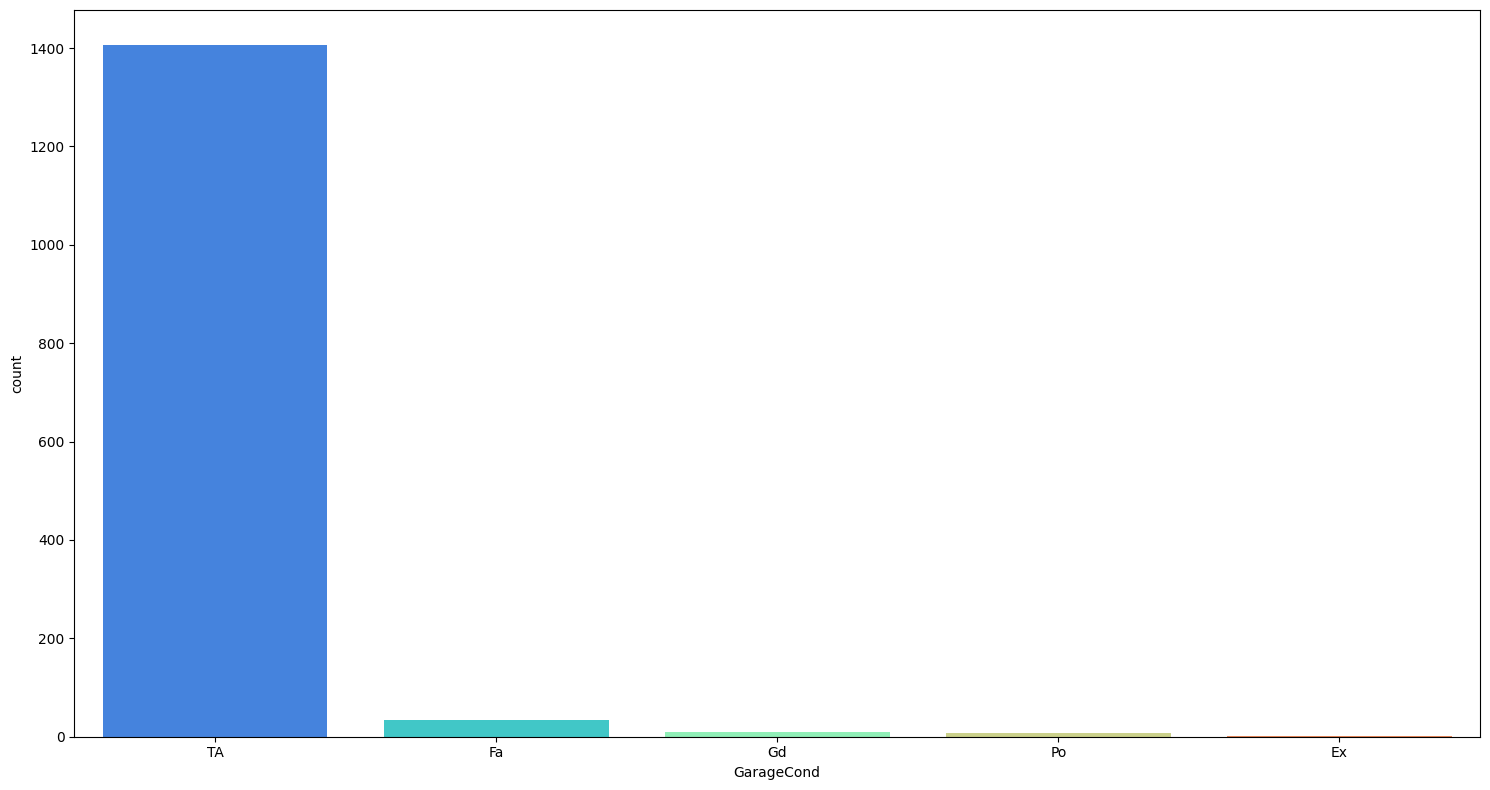

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


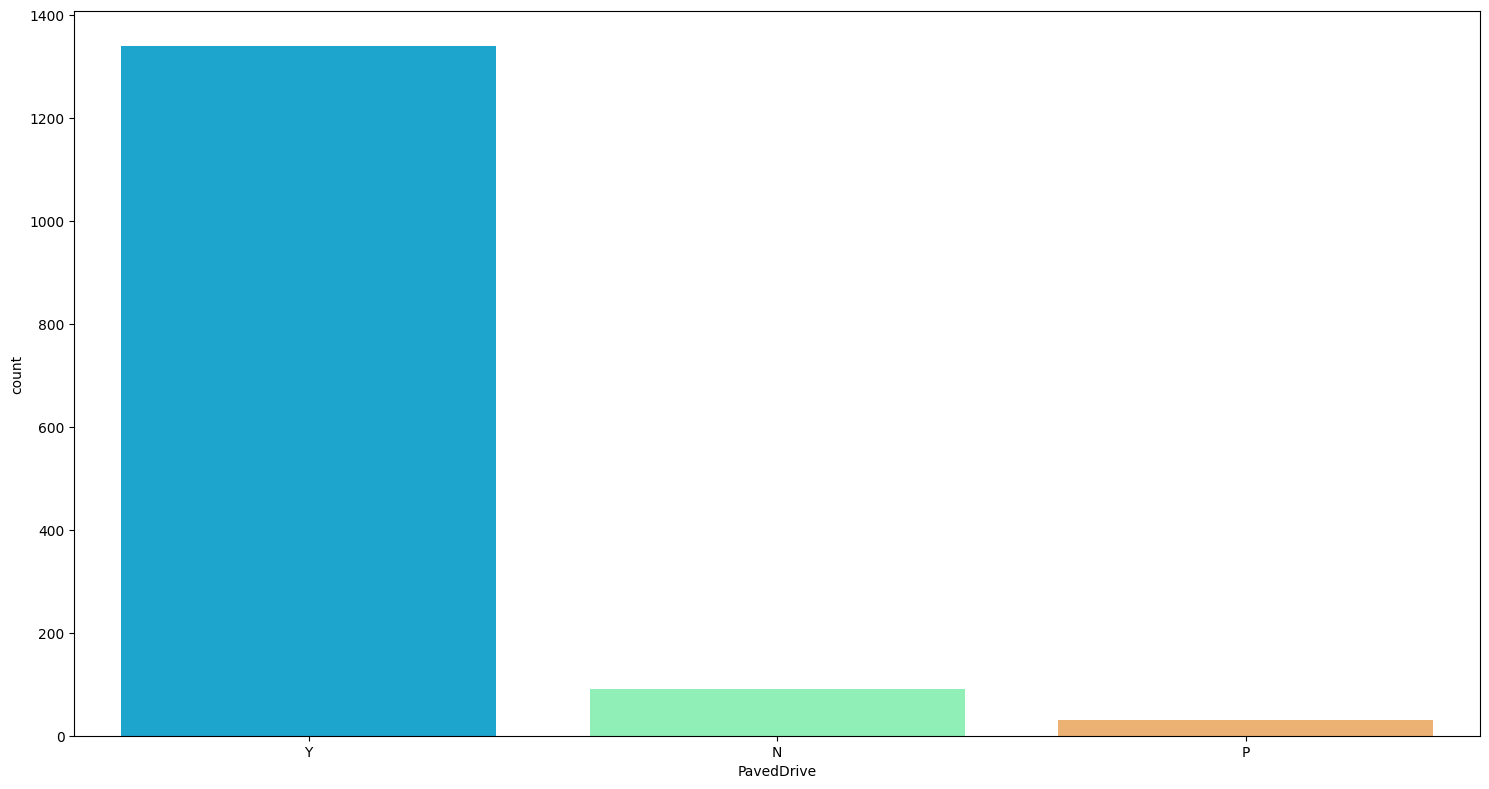

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


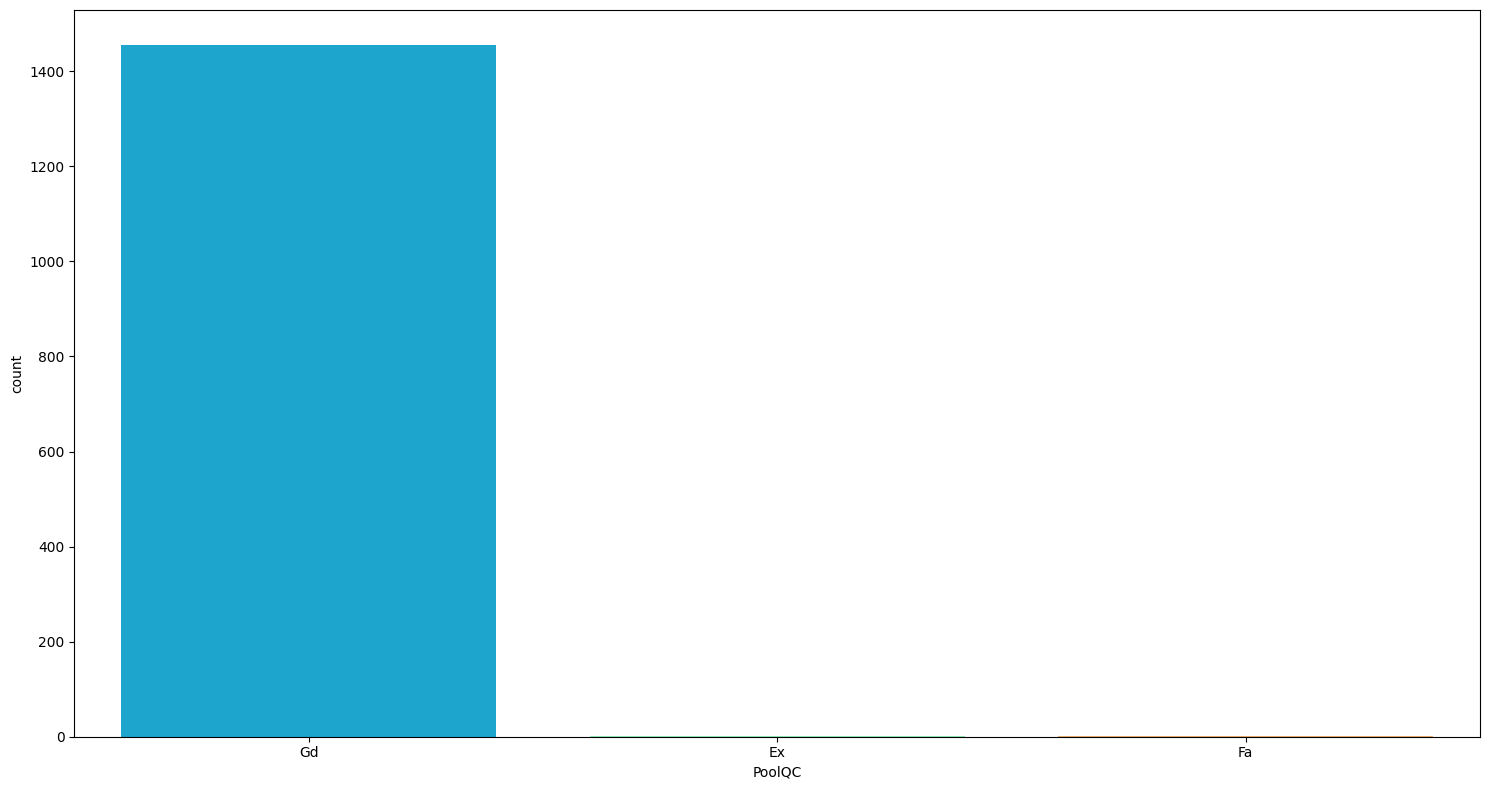

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


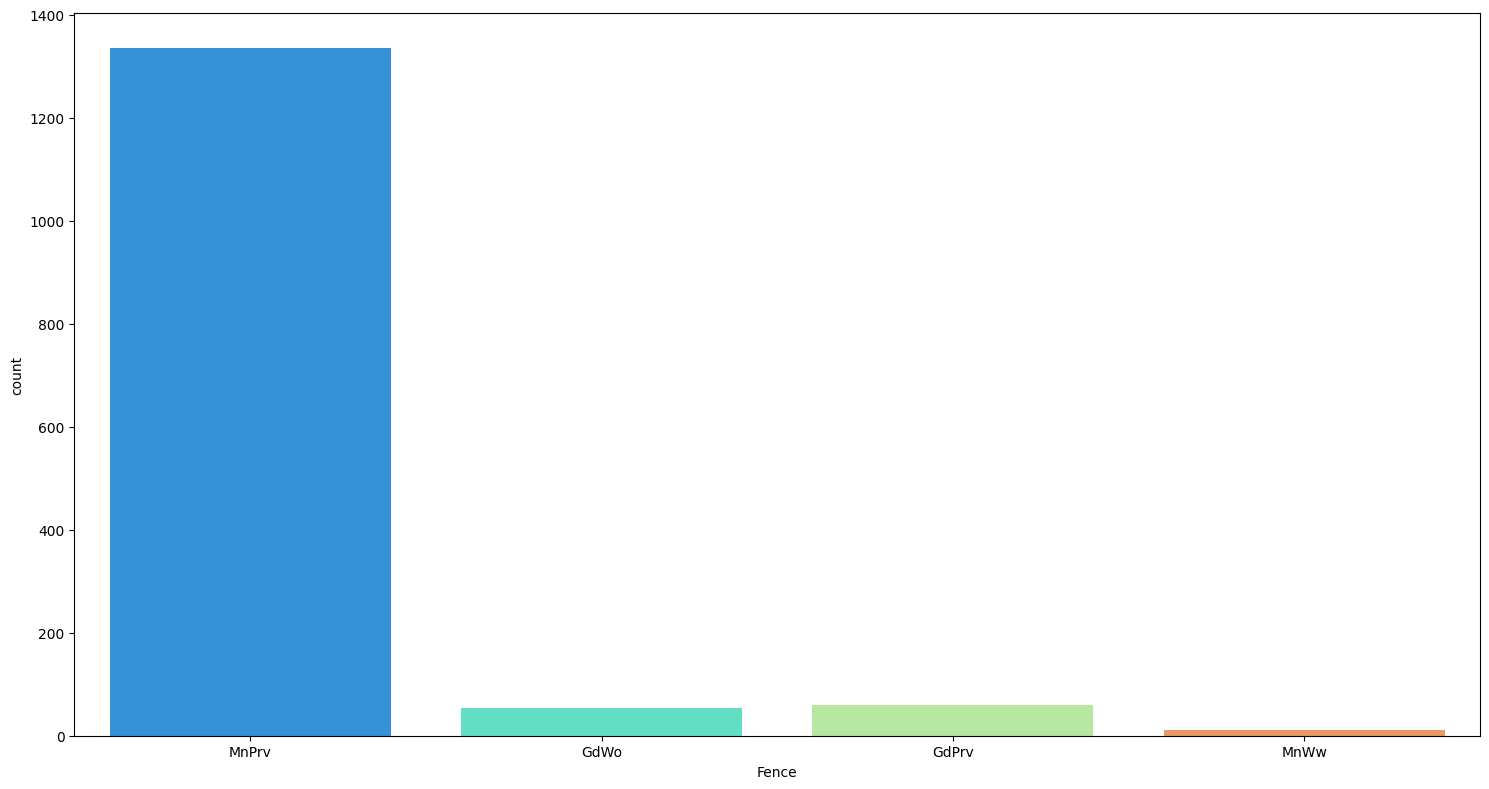

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


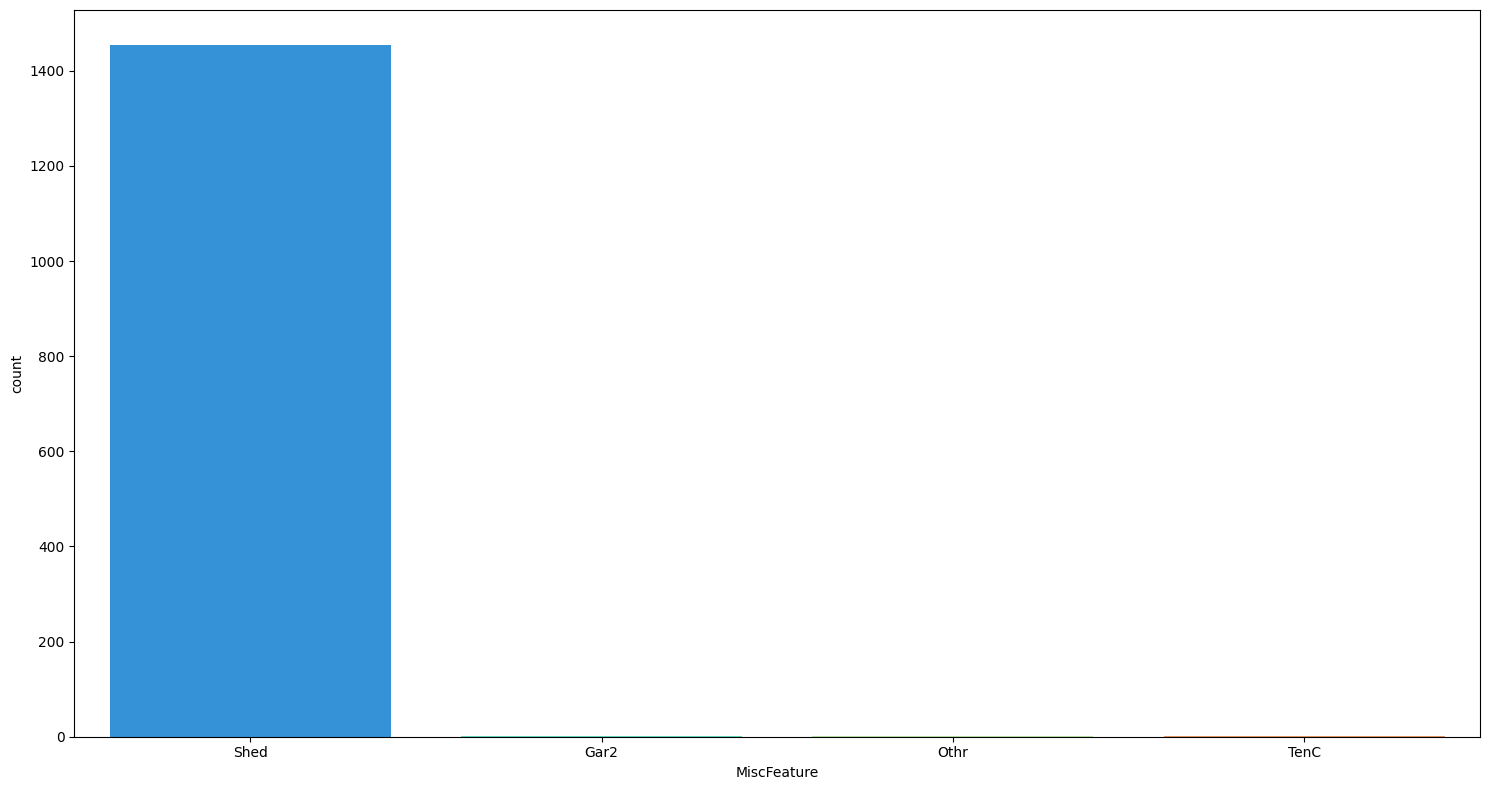

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


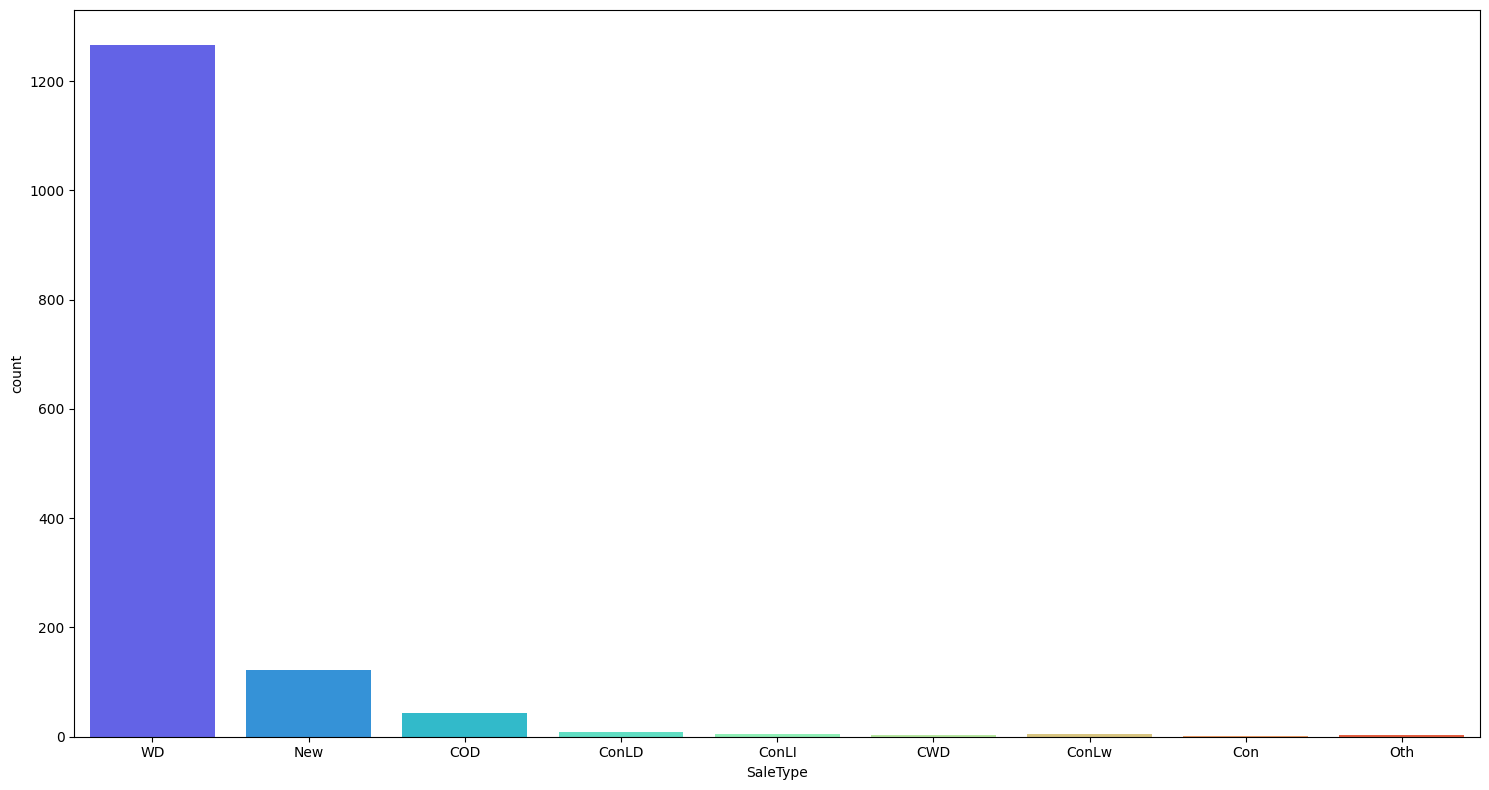

/tmp/ipykernel_237366/1953462232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_train,palette='rainbow')


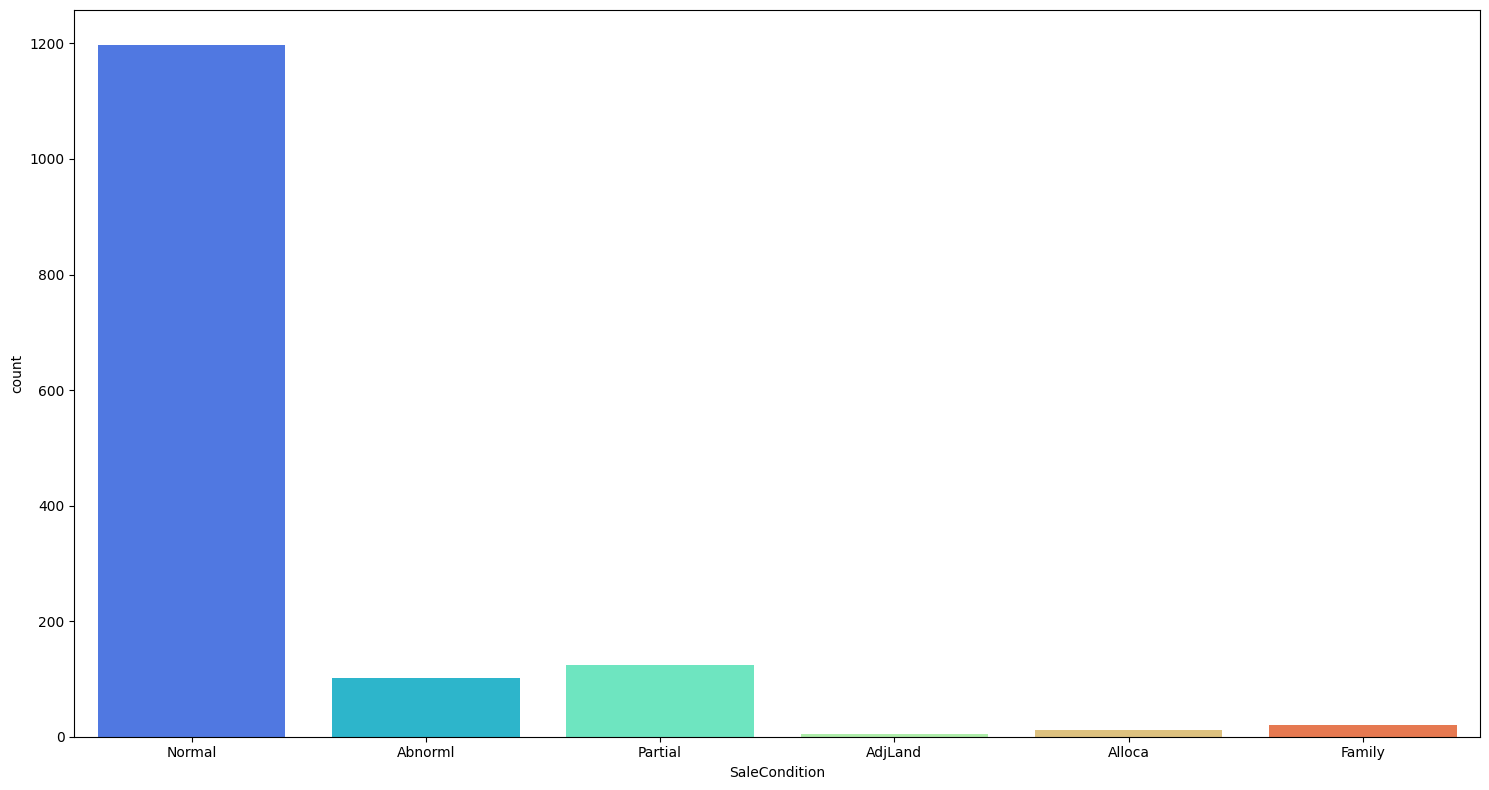

In [54]:


# Explore categorical features
for column in df_train.select_dtypes(include=['object']):
    sns.countplot(x=column, data=df_train,palette='rainbow')
    plt.tight_layout()
    plt.show()



/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


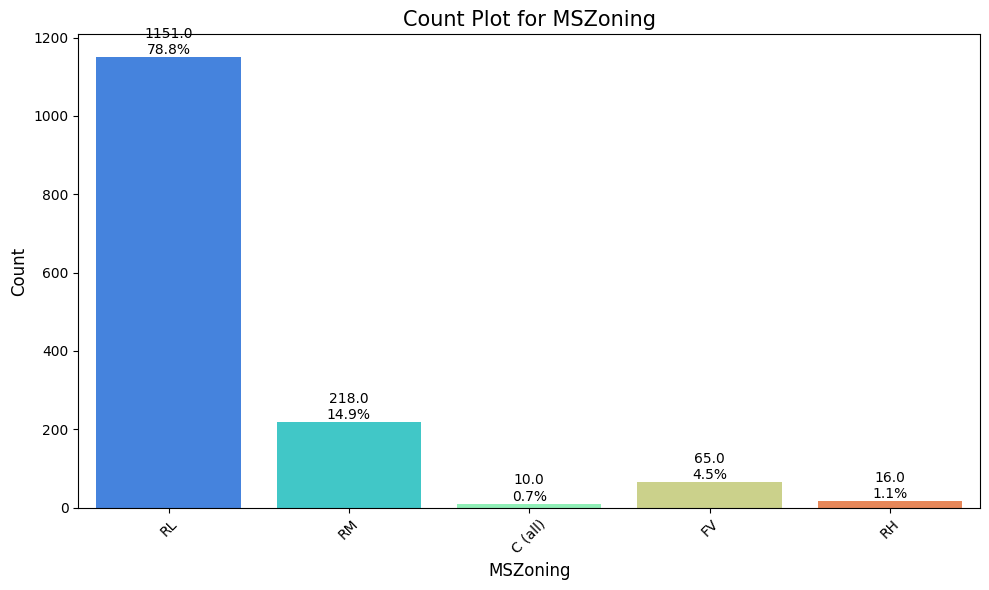

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


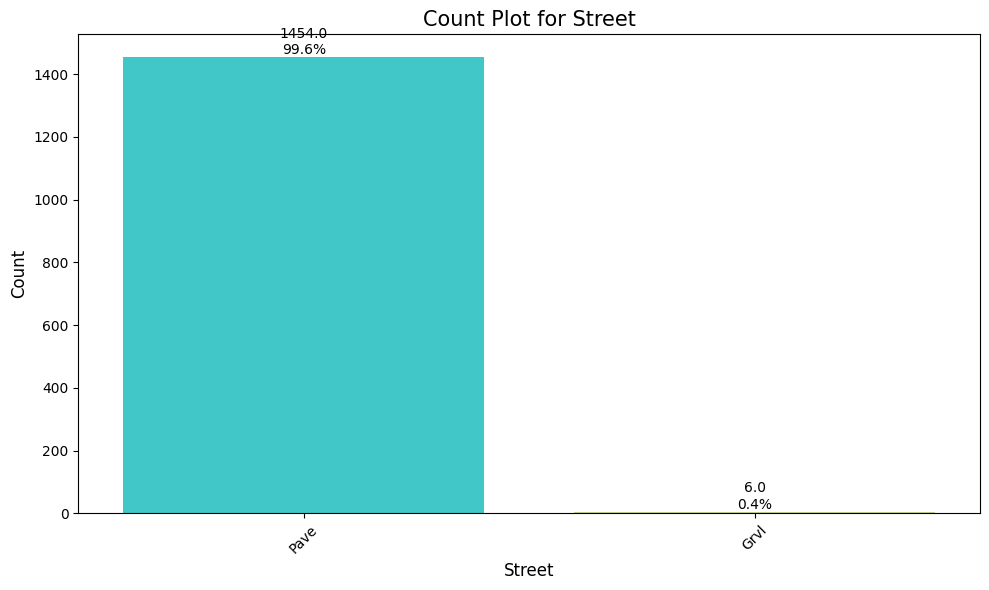

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


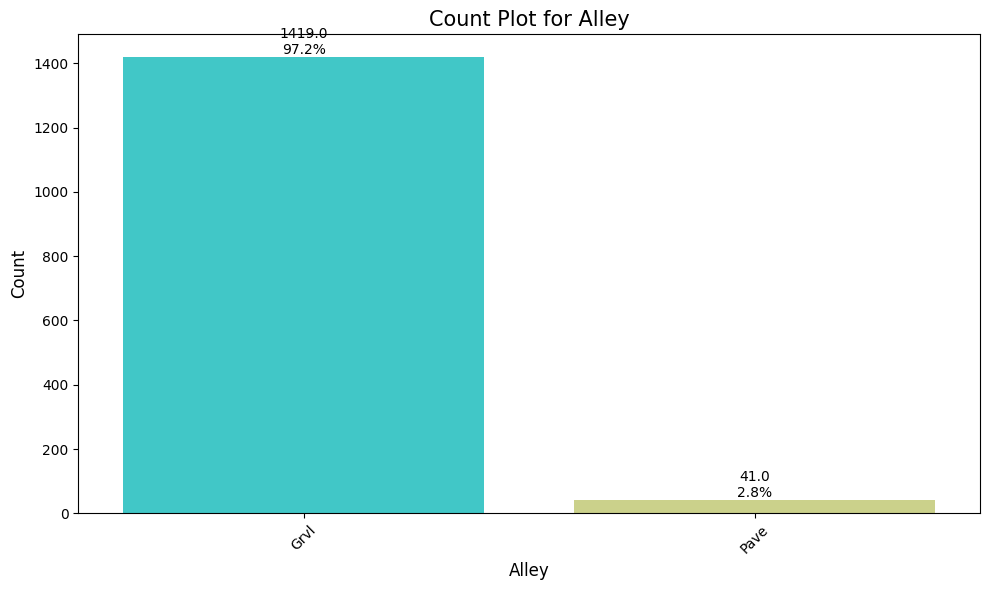

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


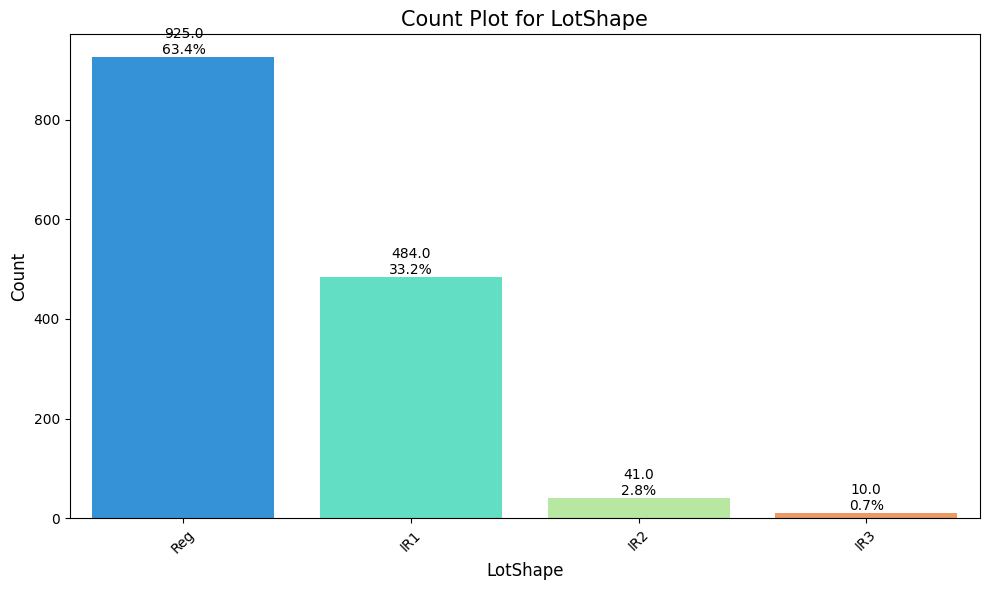

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


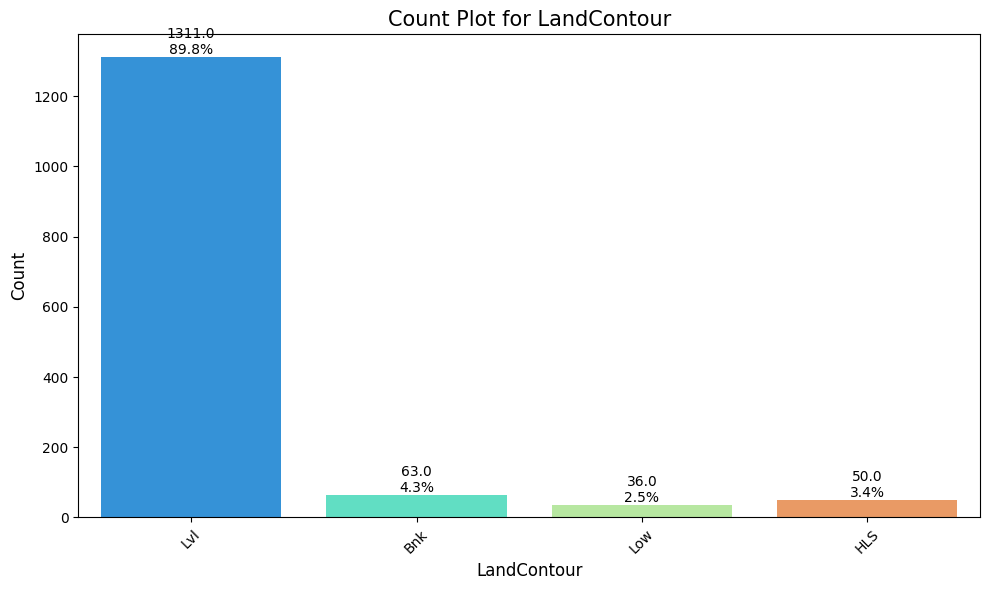

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


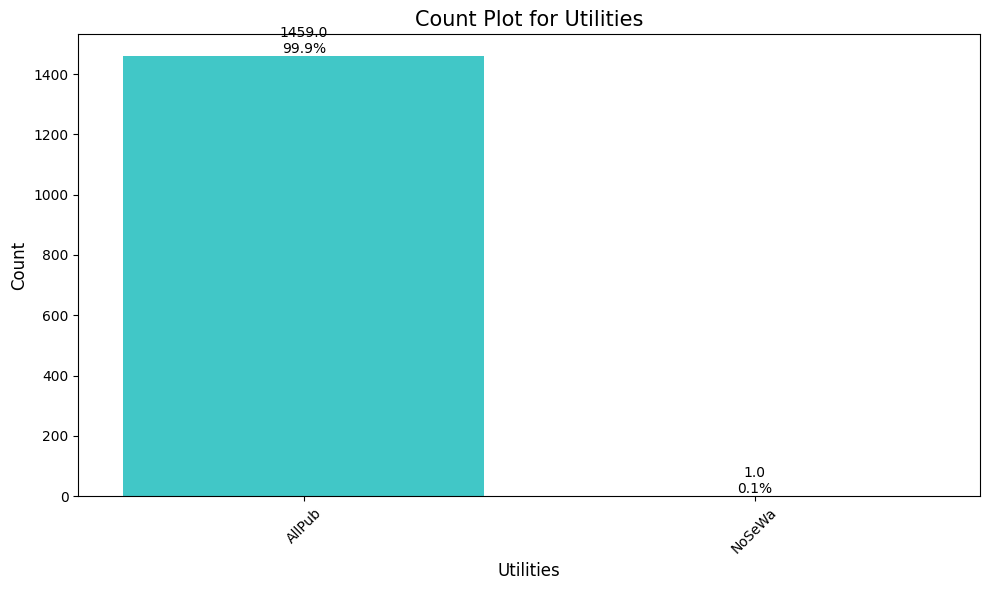

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


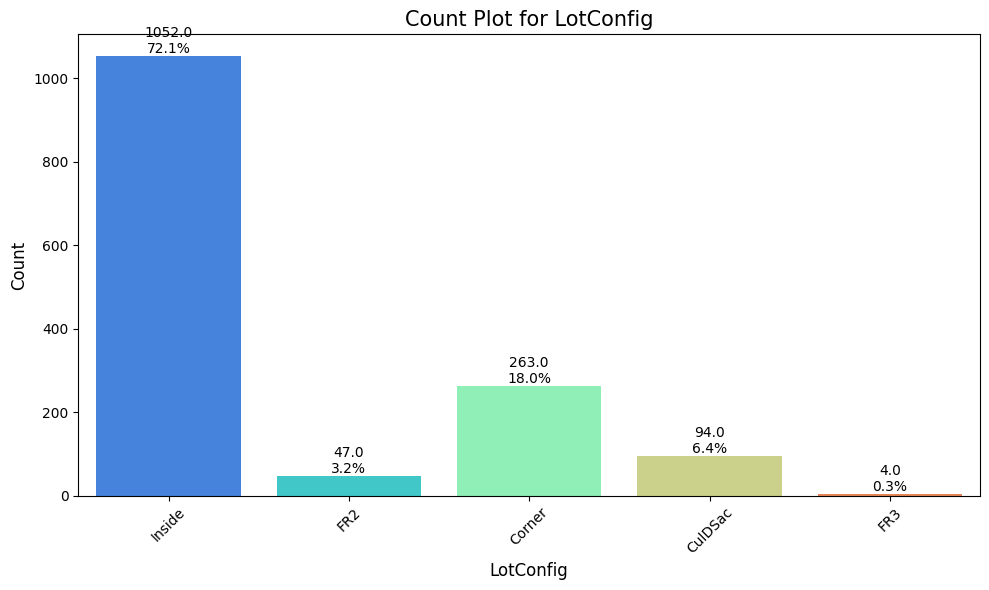

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


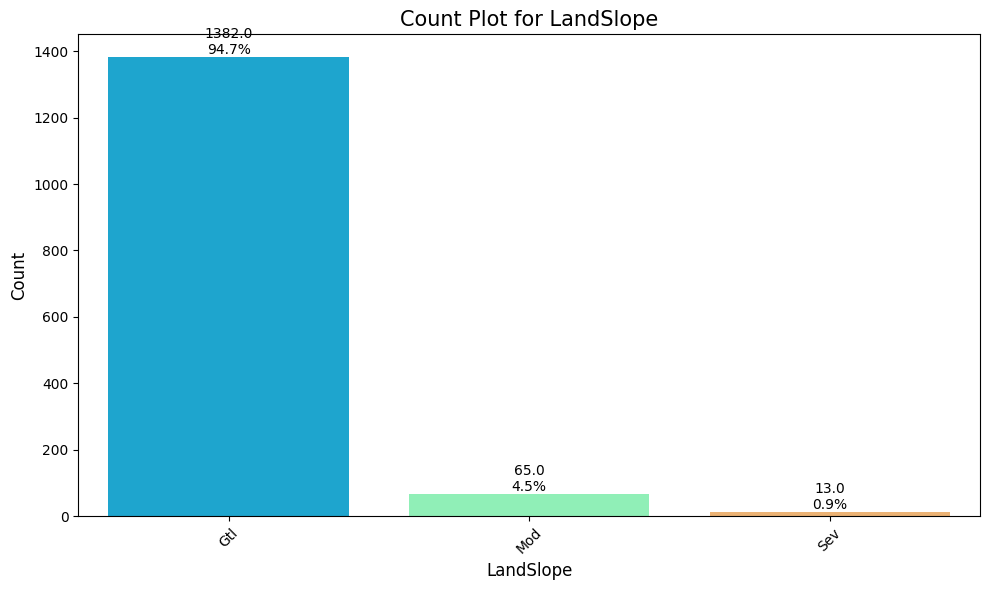

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


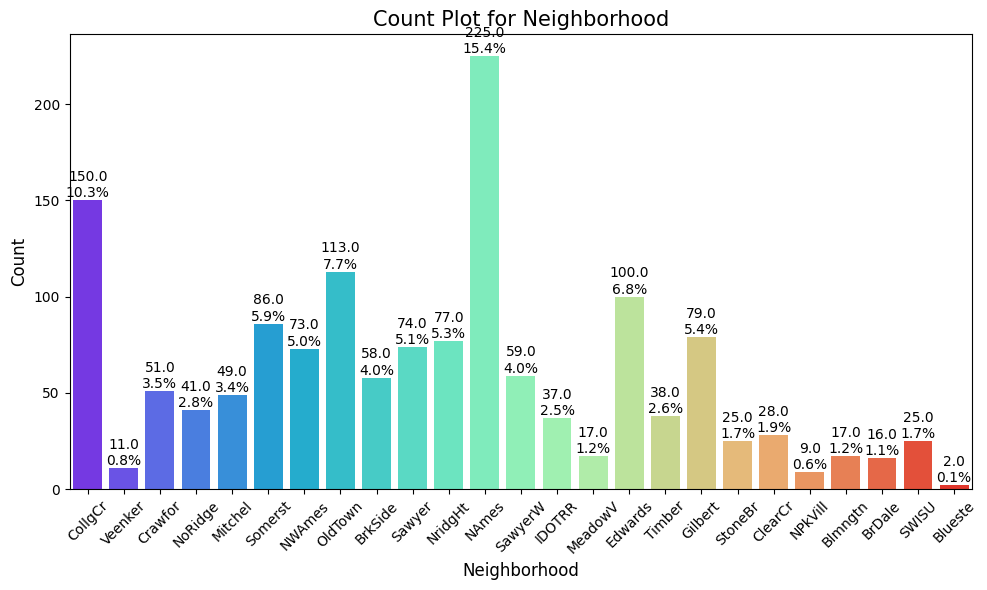

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


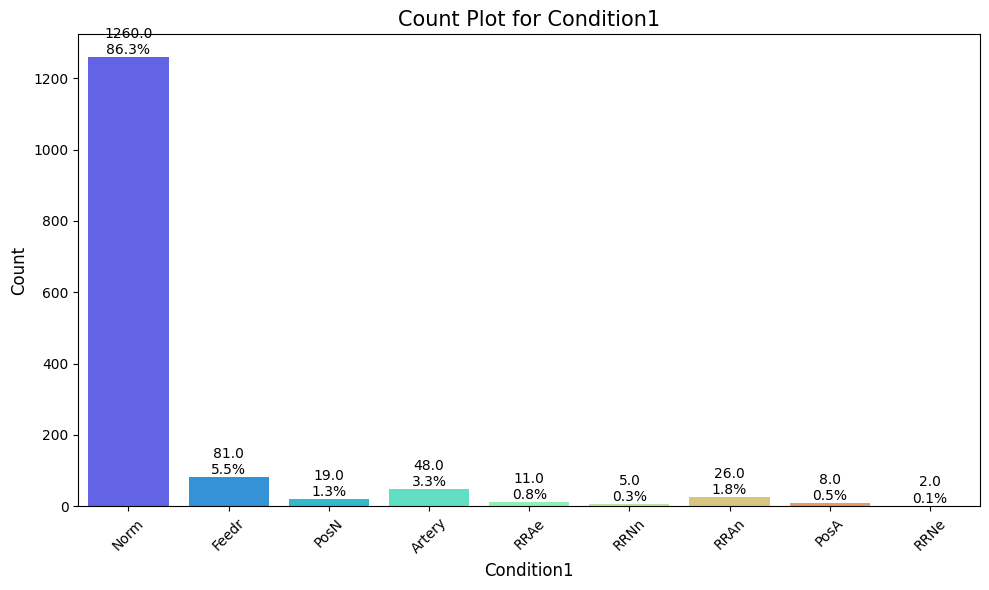

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


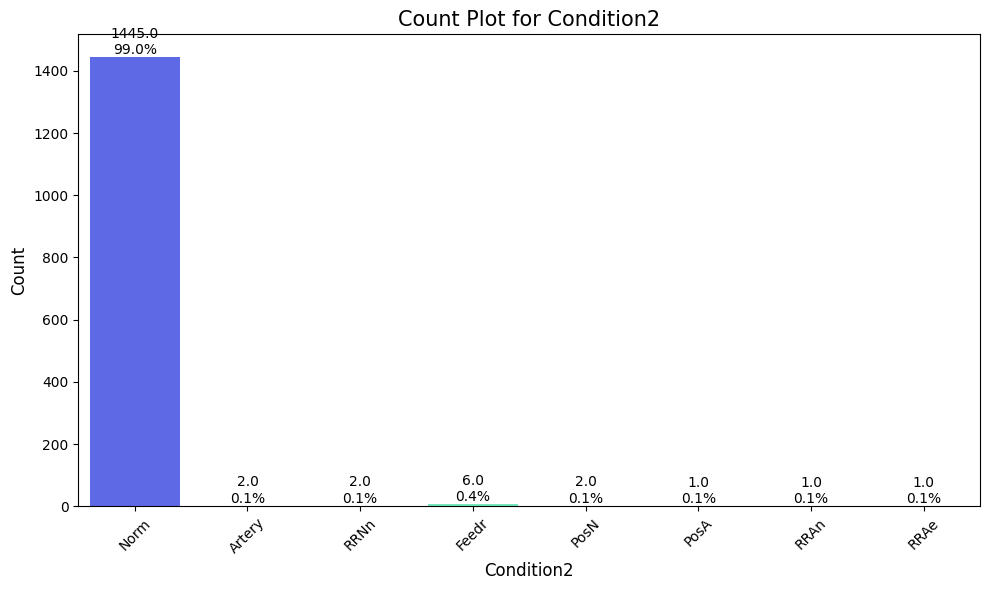

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


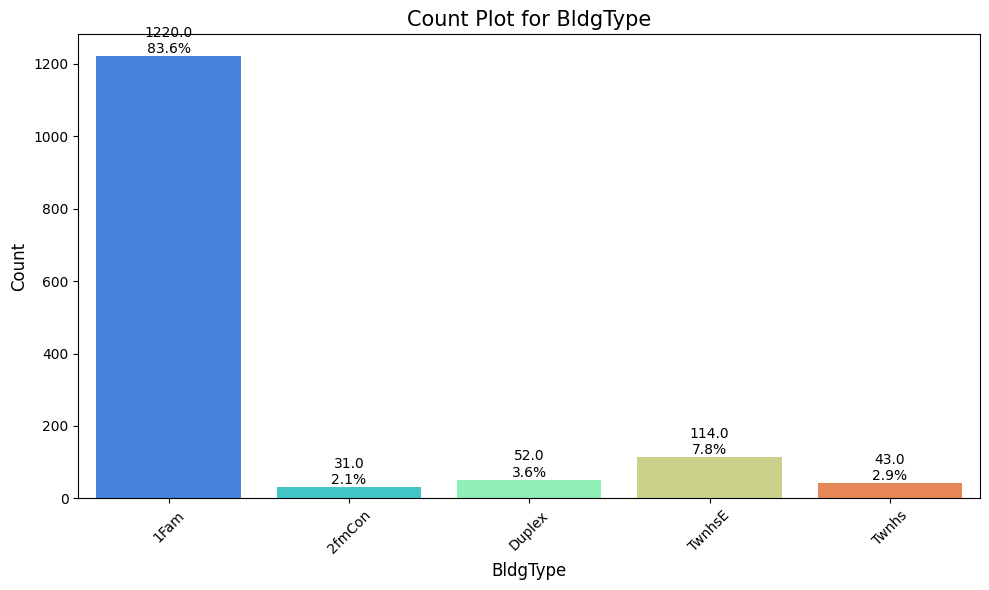

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


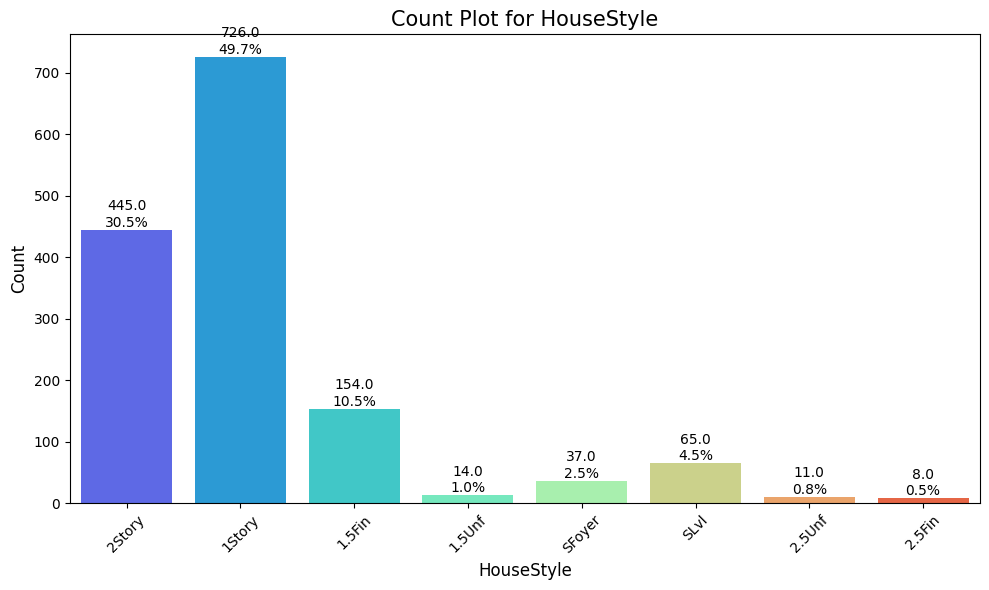

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


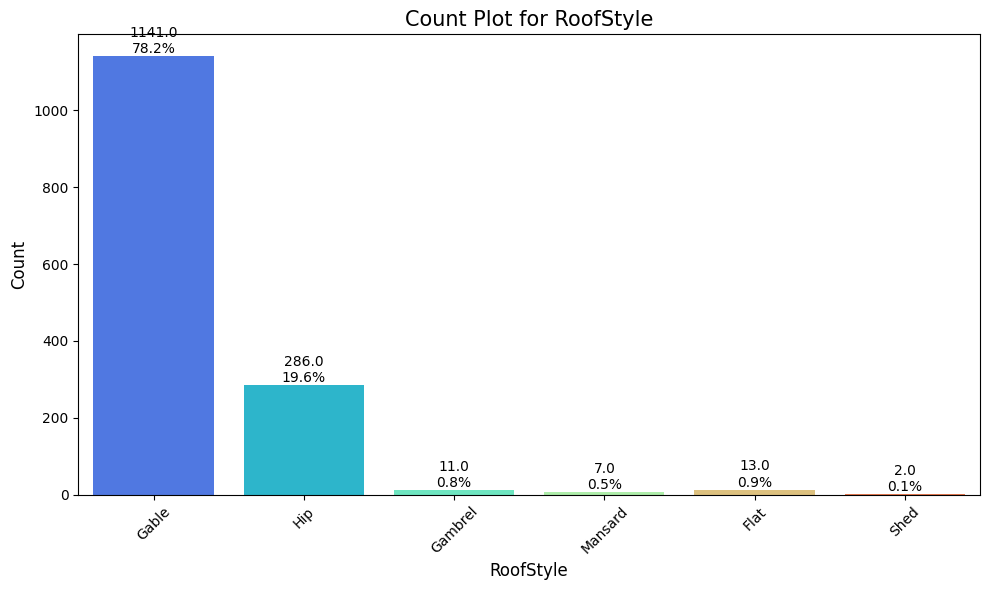

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


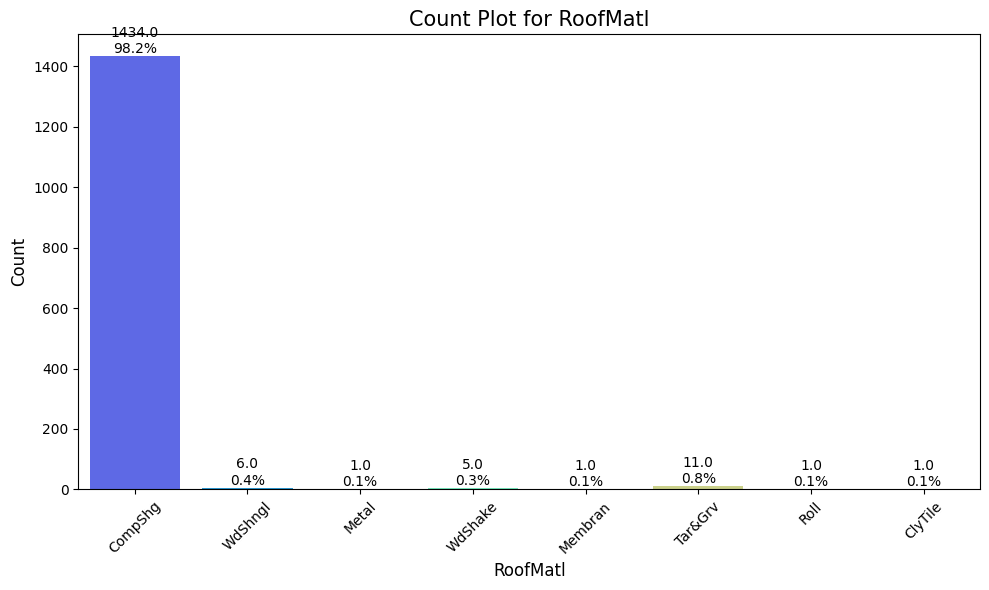

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


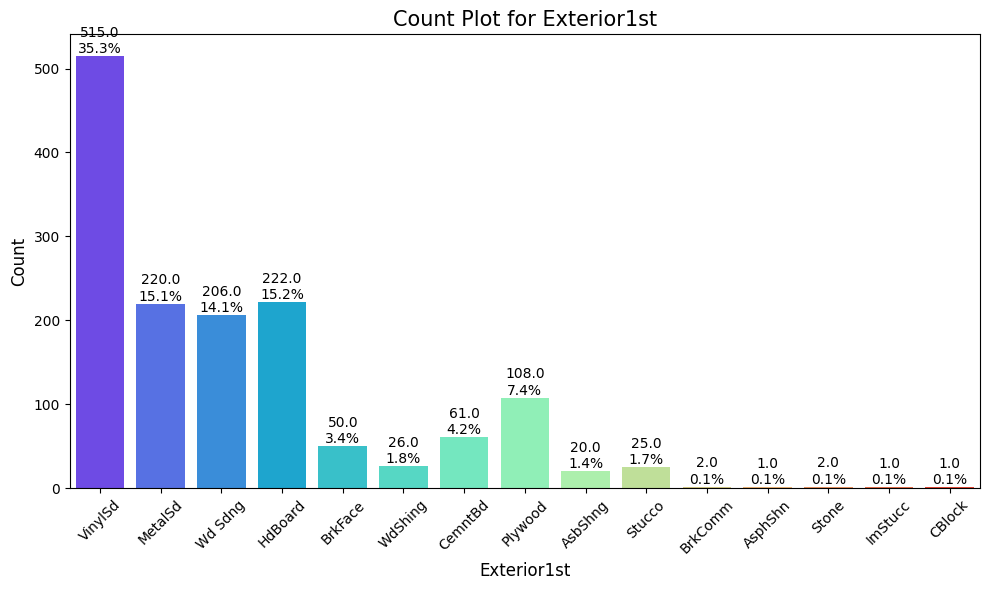

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


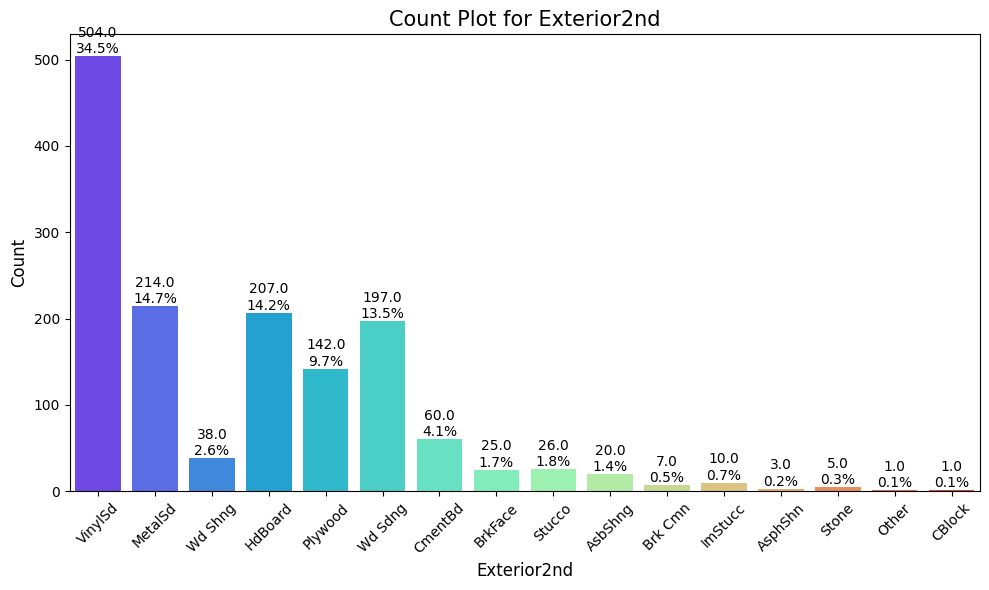

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


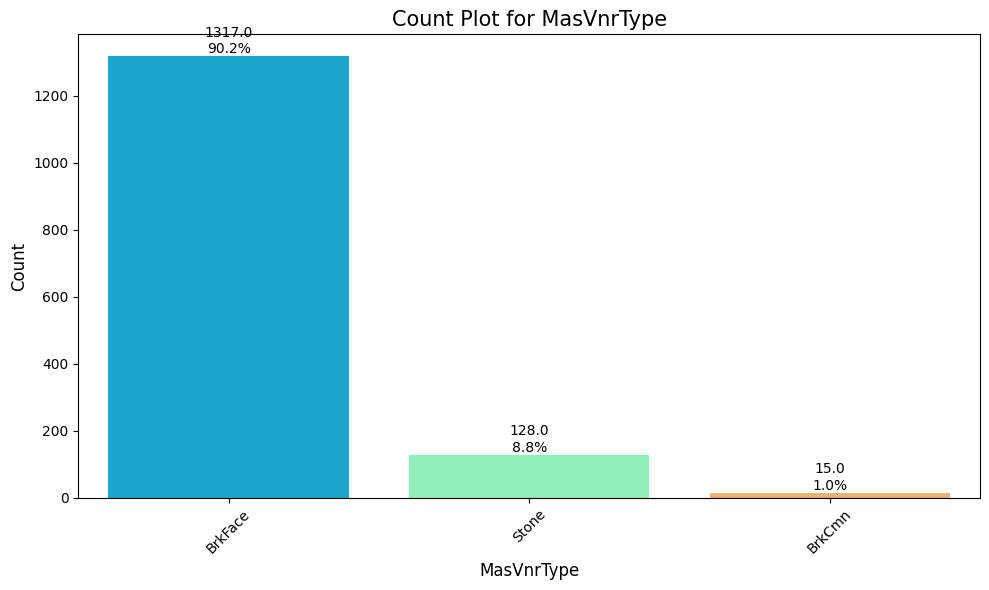

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


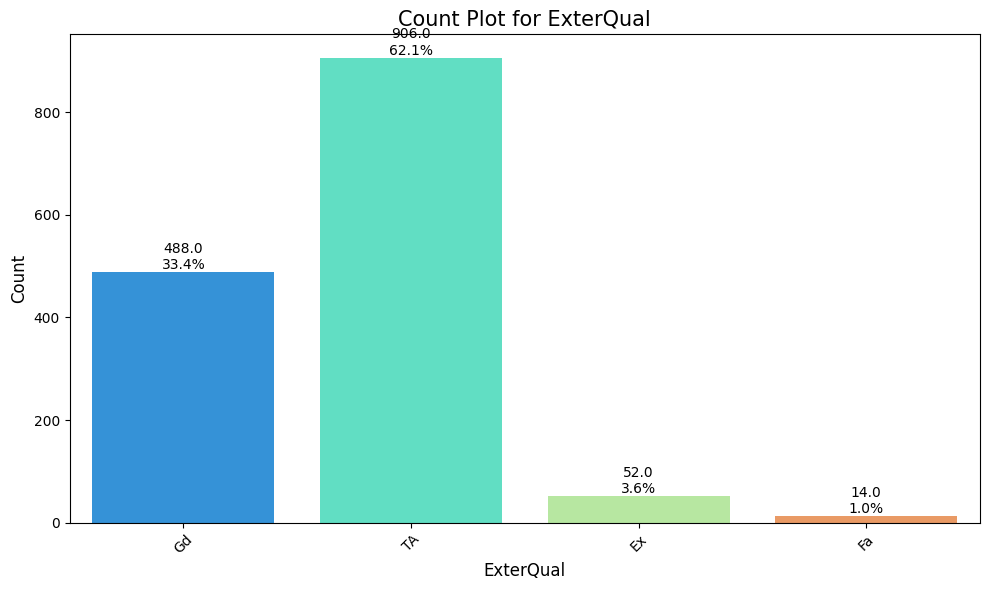

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


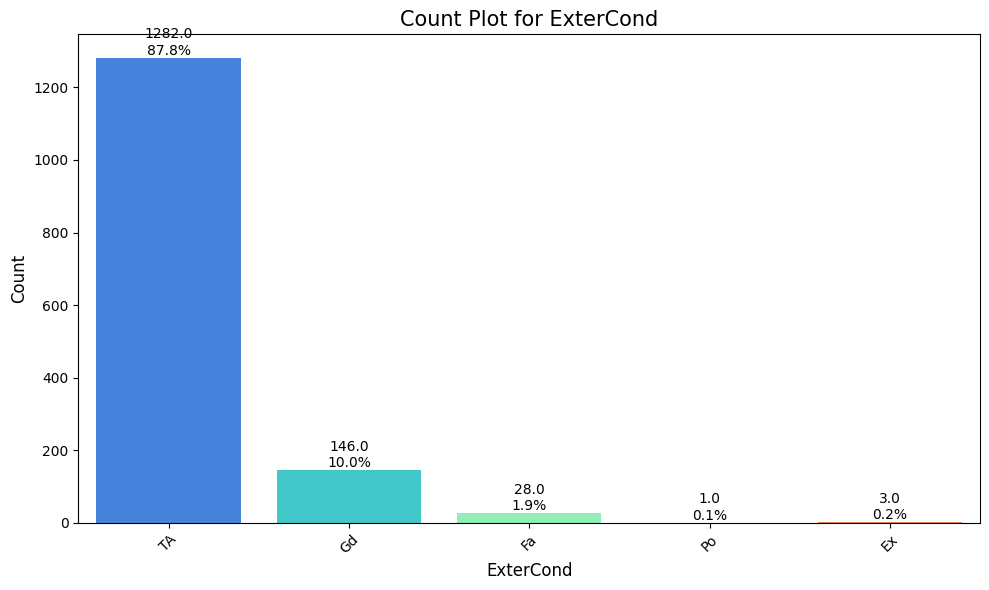

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


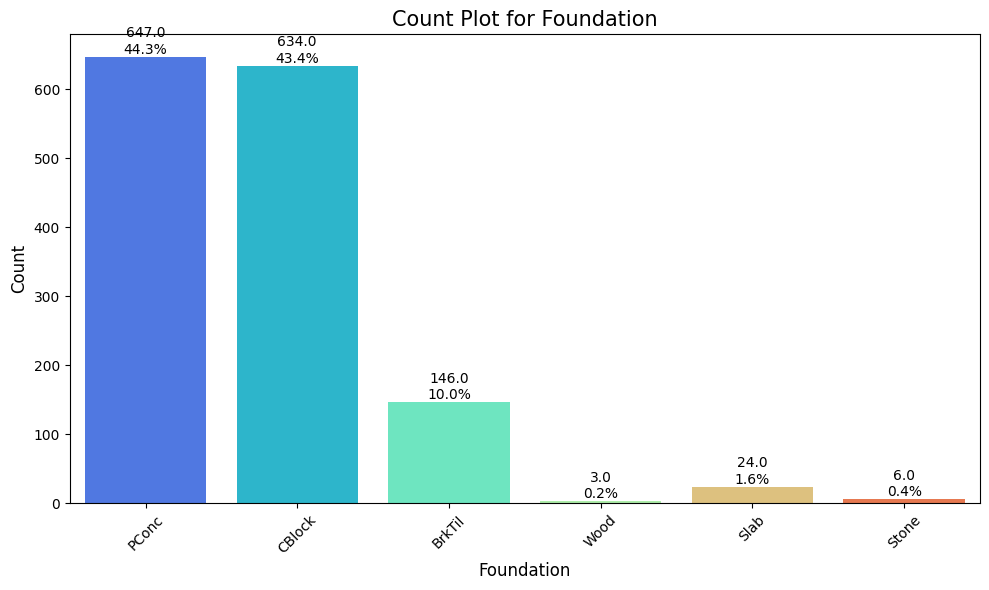

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


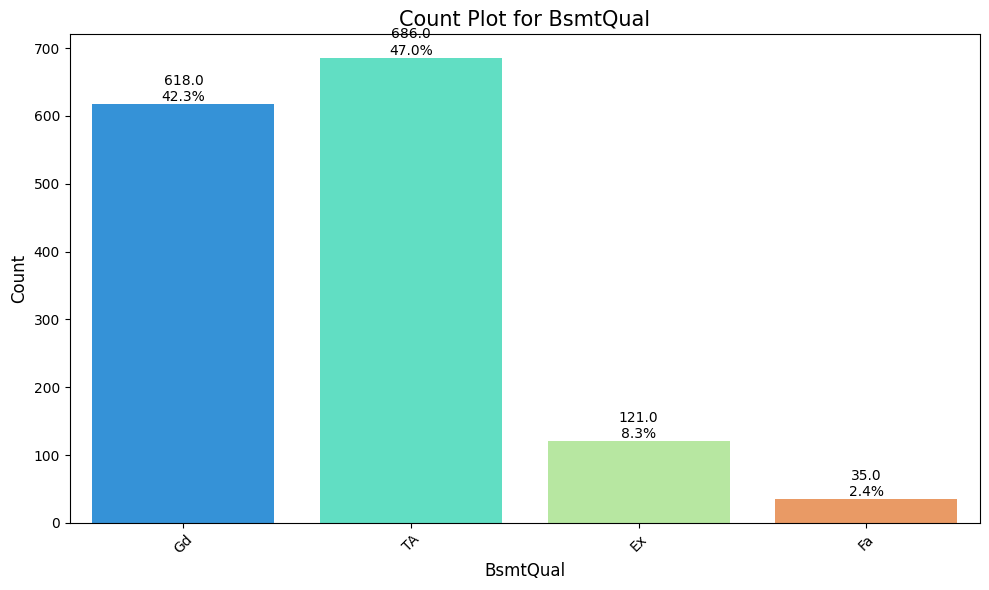

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


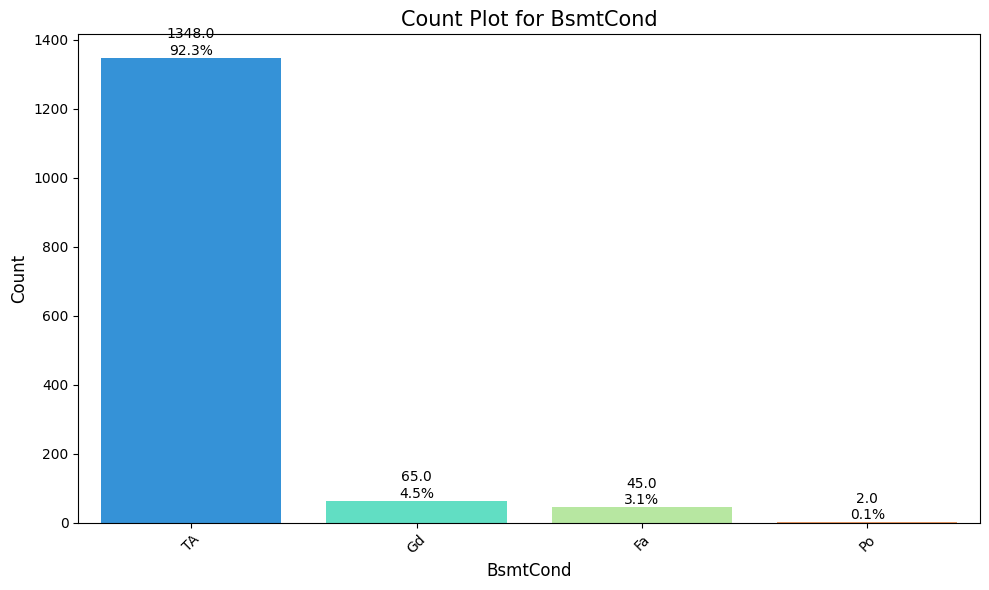

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


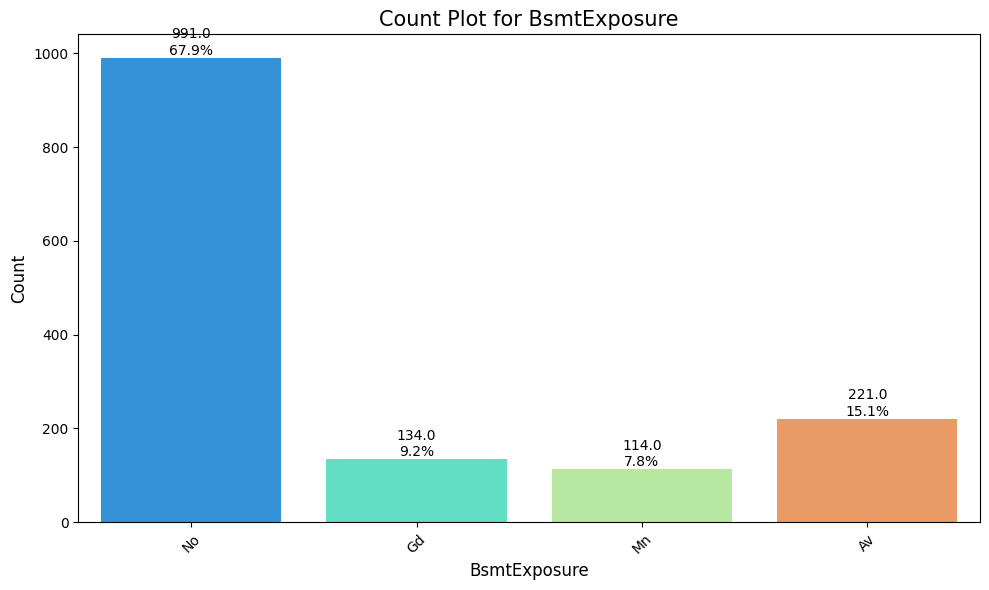

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


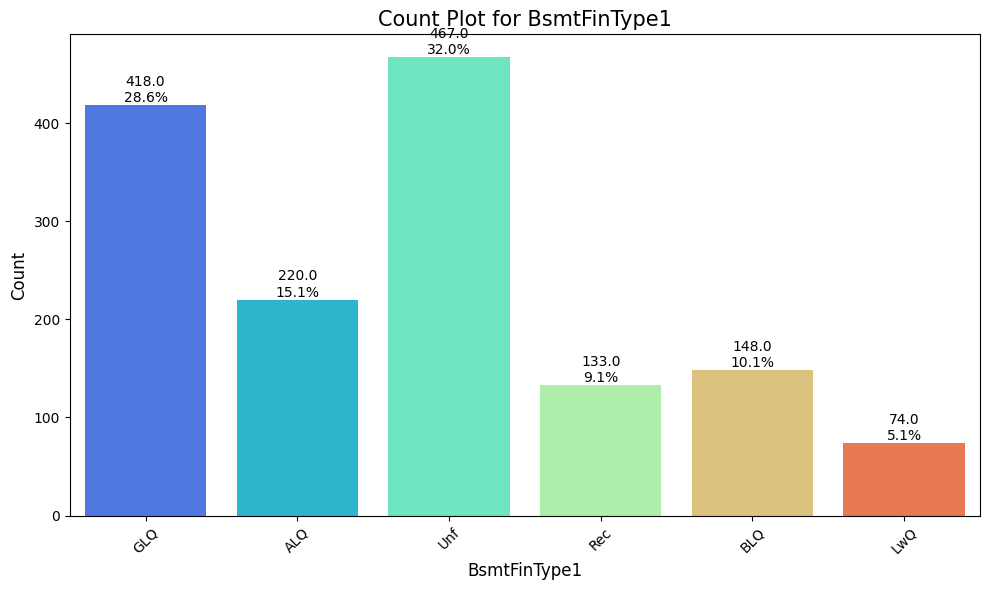

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


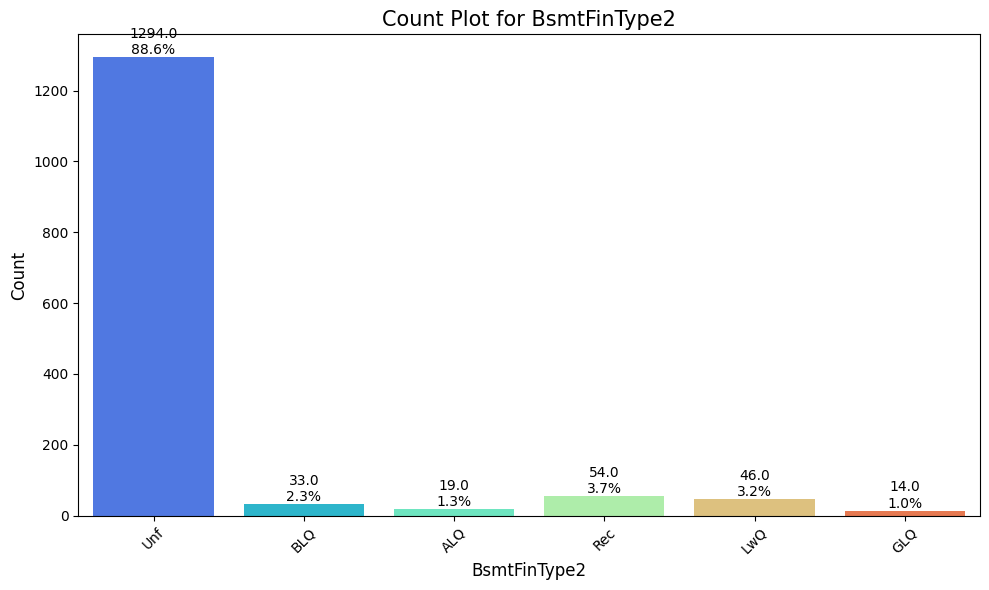

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


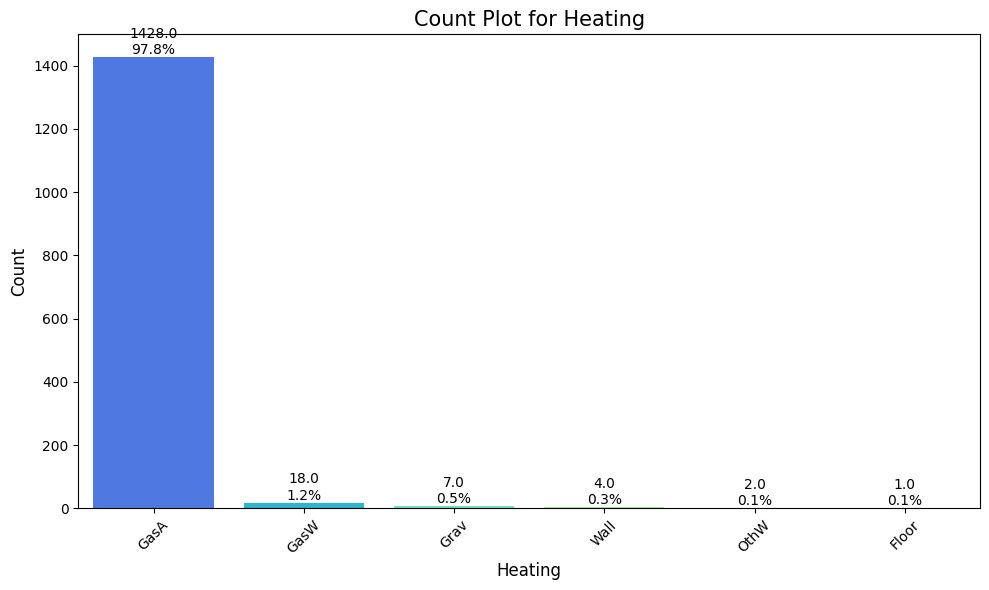

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


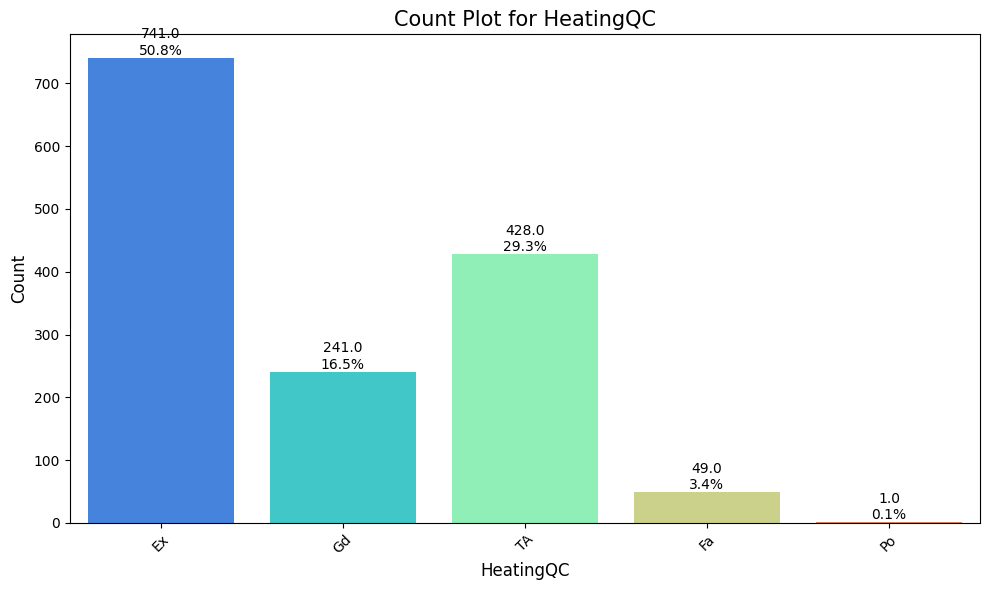

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


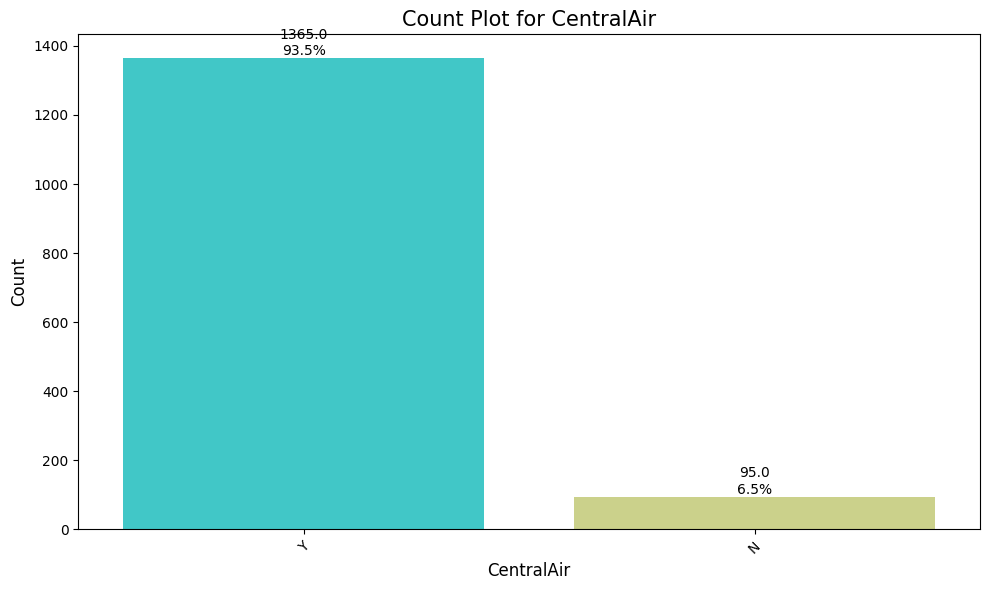

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


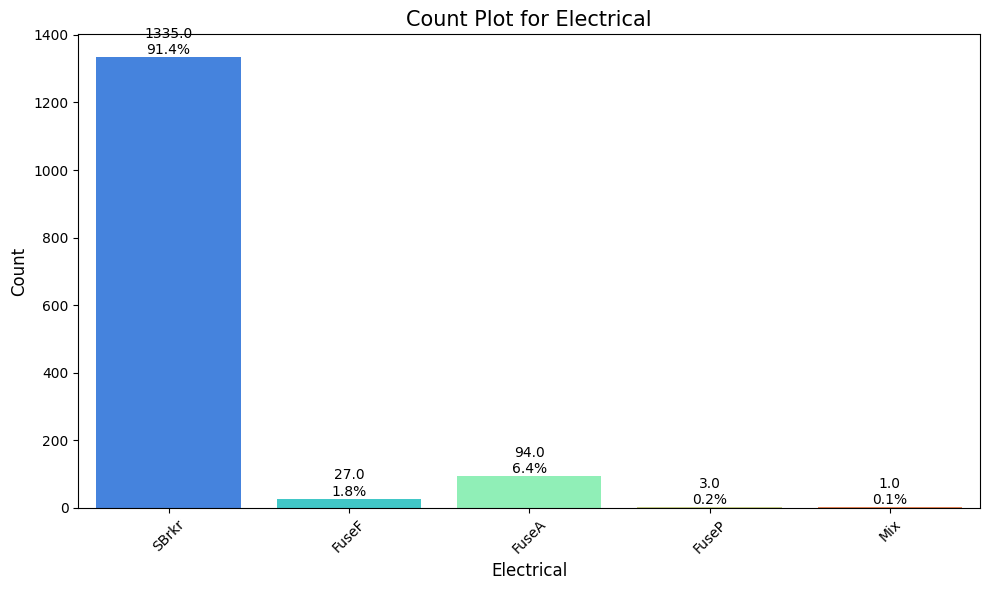

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


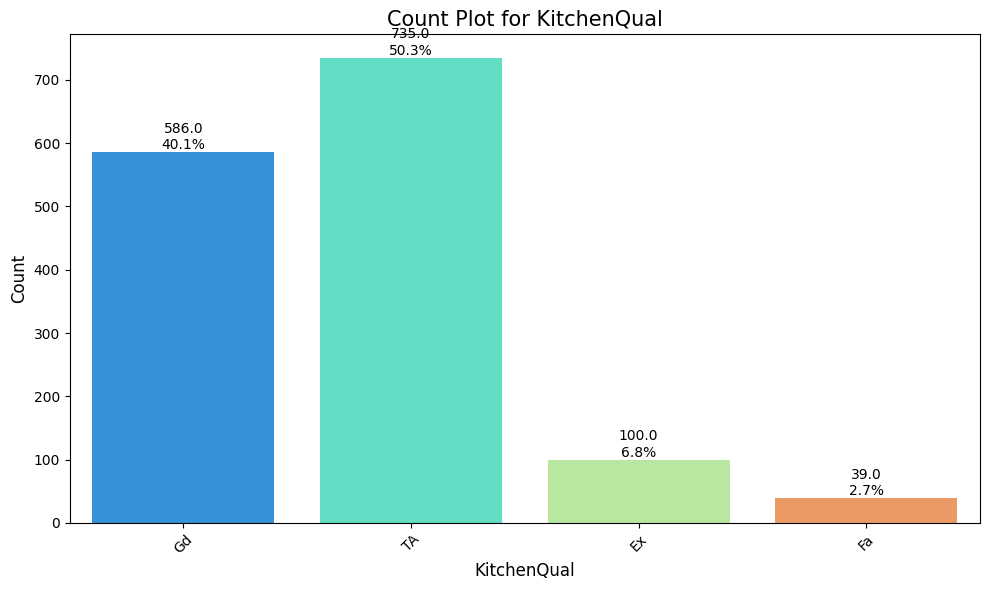

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


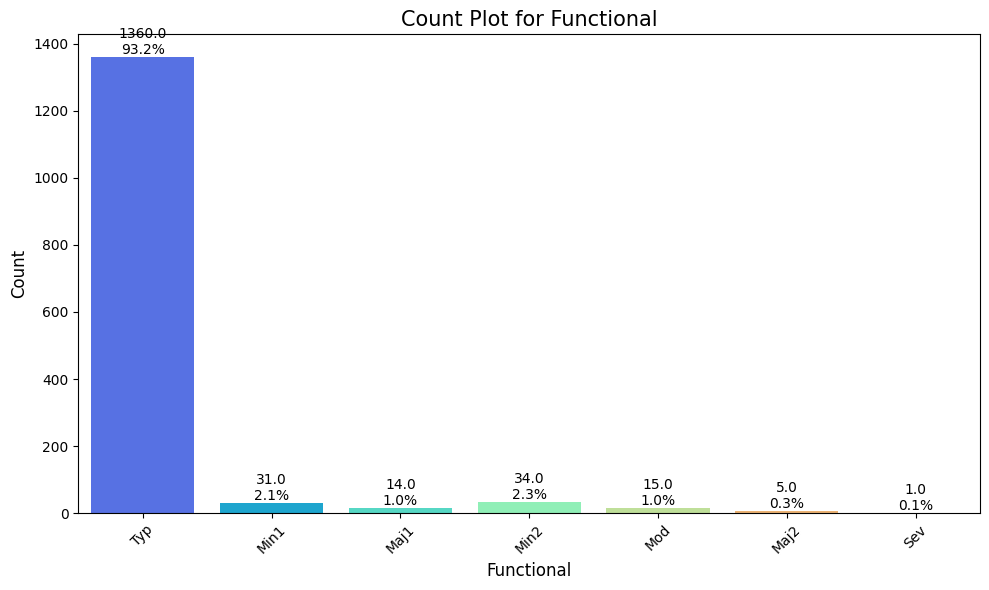

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


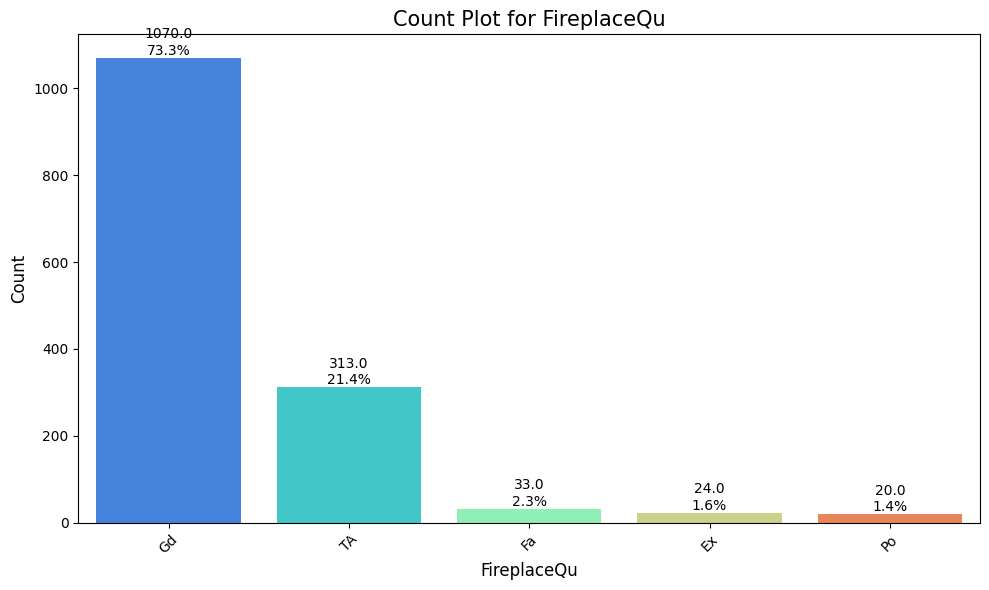

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


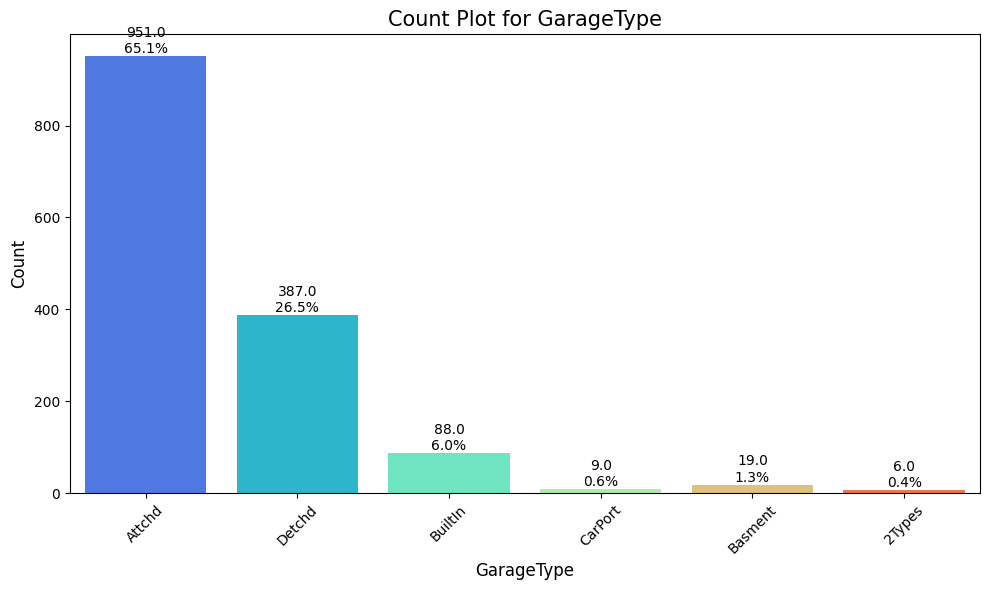

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


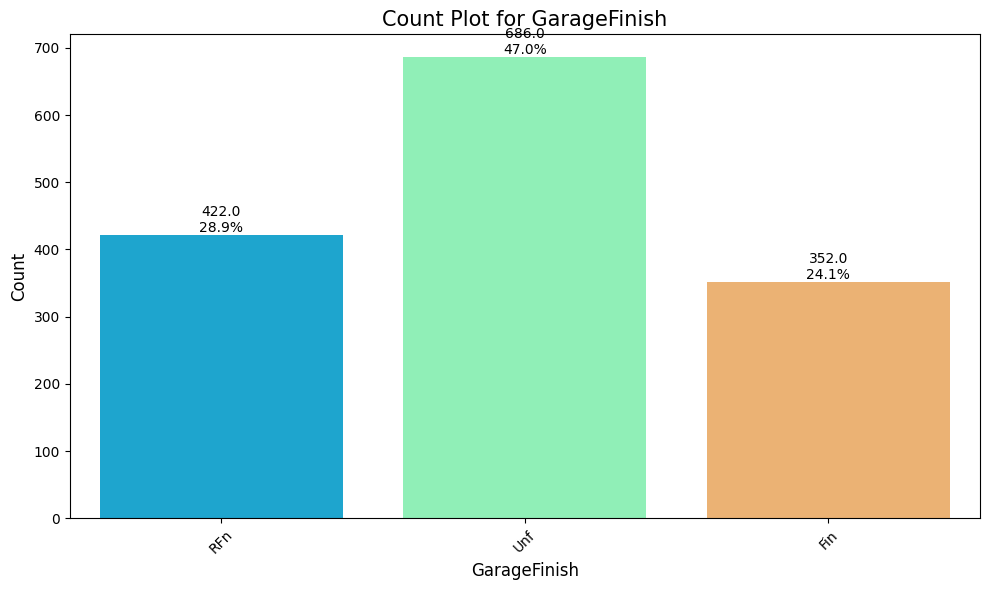

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


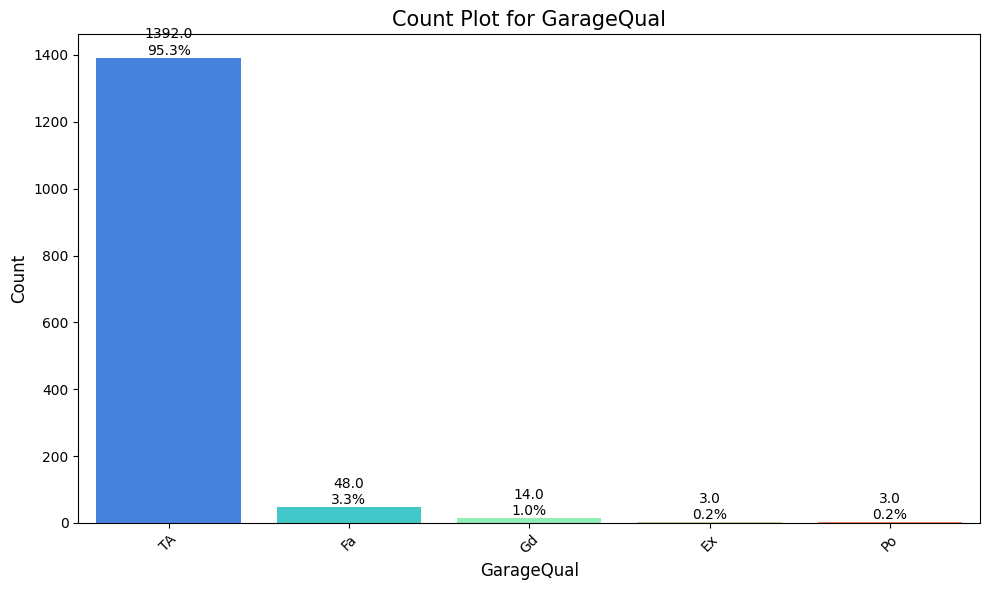

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


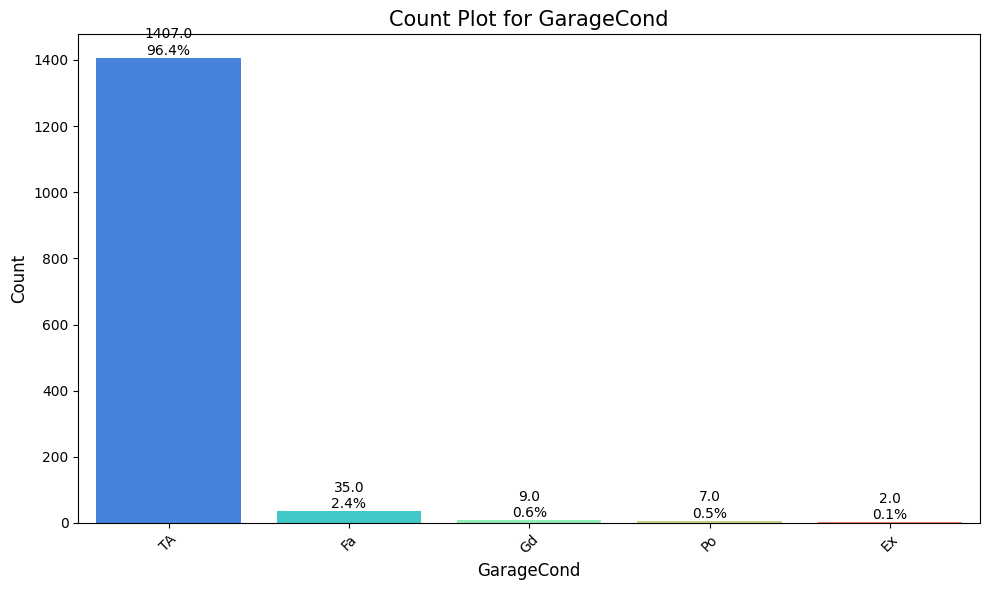

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


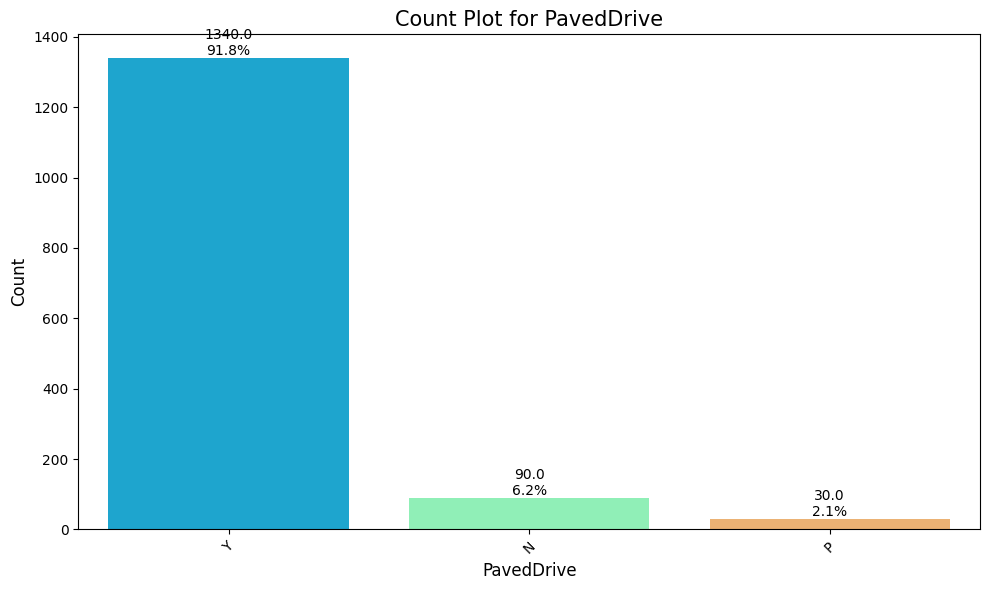

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


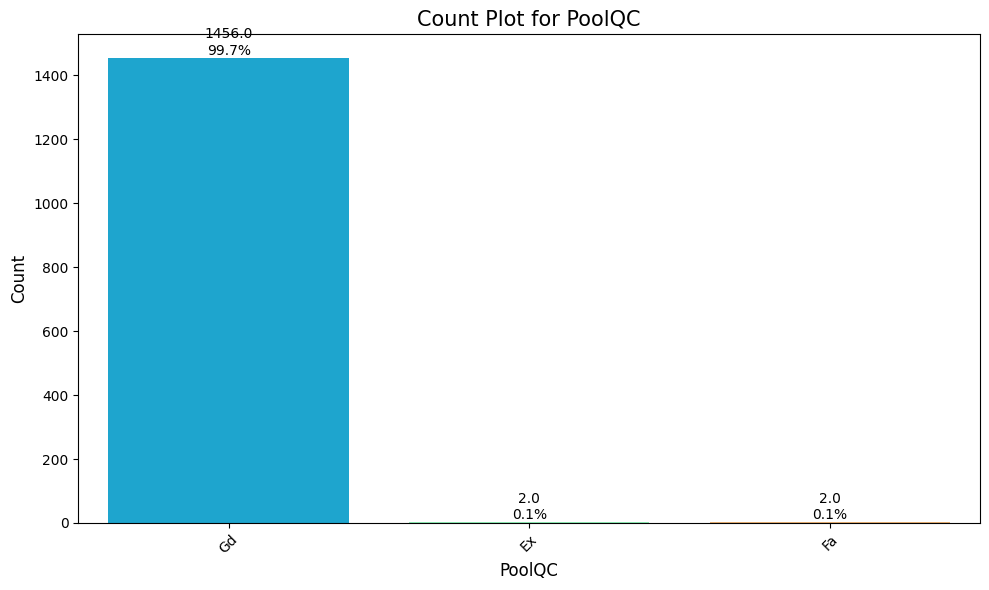

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


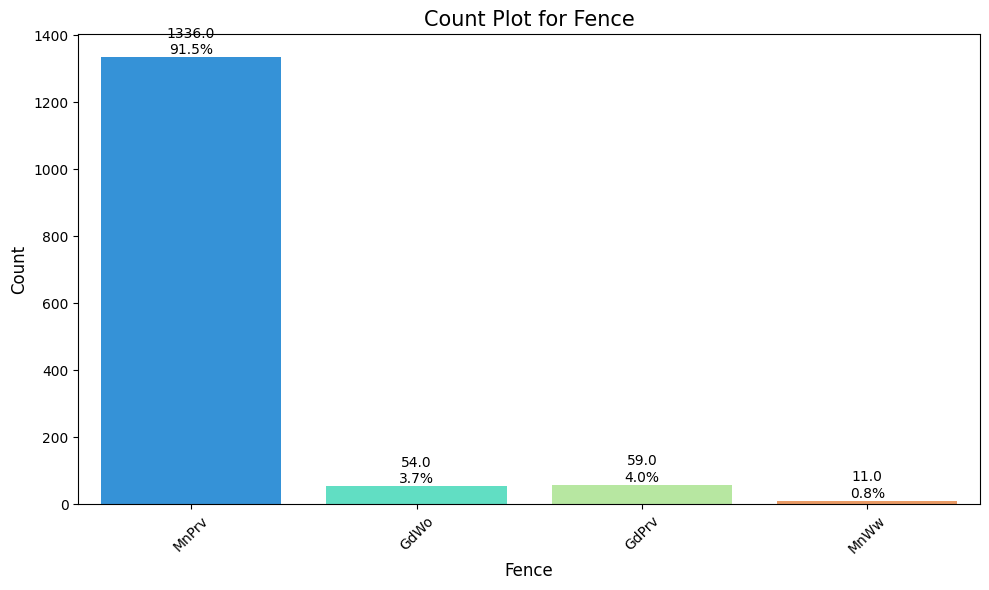

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


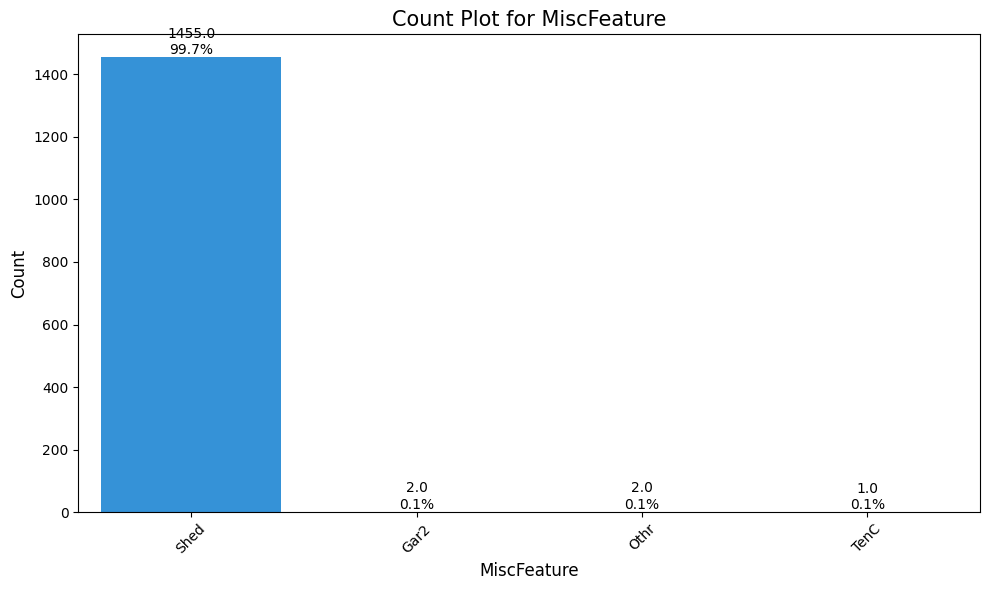

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


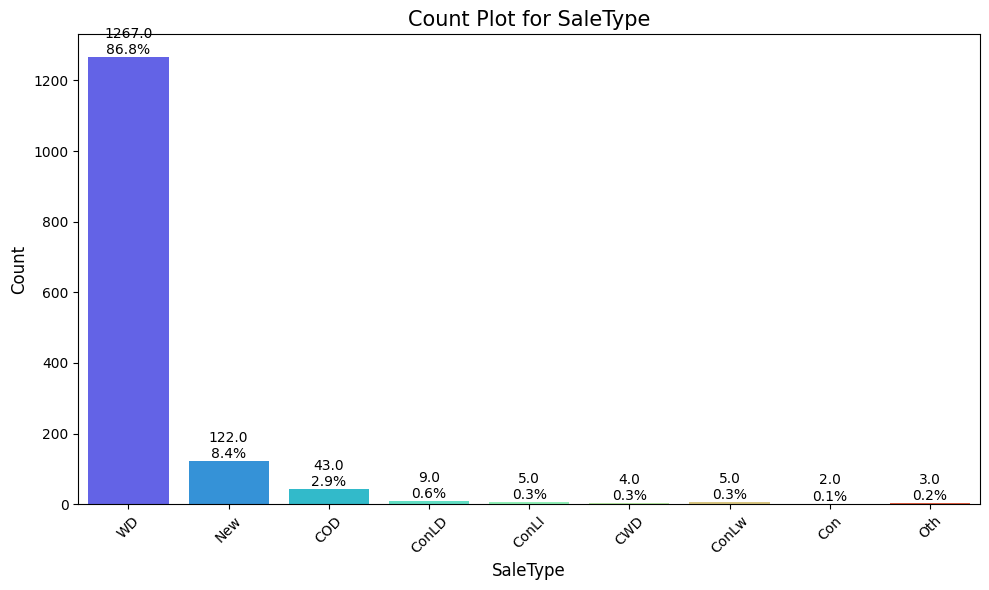

/tmp/ipykernel_237366/3826561687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train,palette='rainbow')


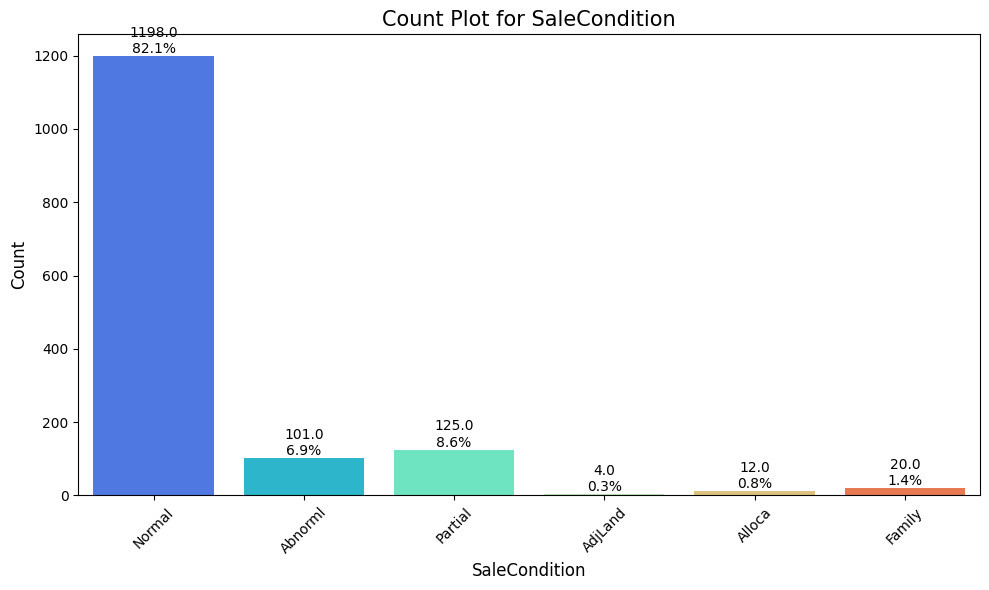

In [55]:
# Explore categorical features
for column in df_train.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df_train,palette='rainbow')
    
    # Add count and percentage annotations to each bar
    total = len(df_train[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='bottom')
    
    plt.title(f'Count Plot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Visualize target variable

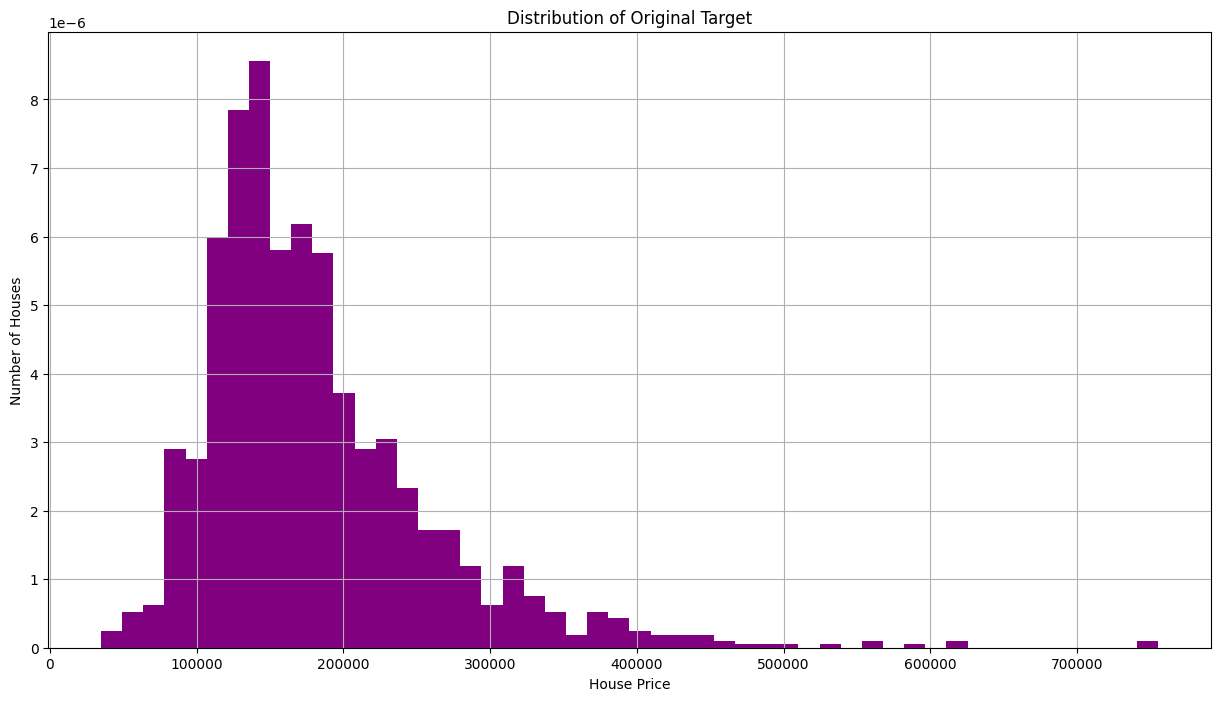

In [17]:
import matplotlib.pyplot as plt

# Your code for plotting the histogram
df_train['SalePrice'].hist(bins=50, color="purple", density=True)
plt.xlabel("House Price")
plt.ylabel("Number of Houses")
plt.title("Distribution of Original Target")

# Show the plot
plt.show()


# Visualizing the Natural Log Transformation

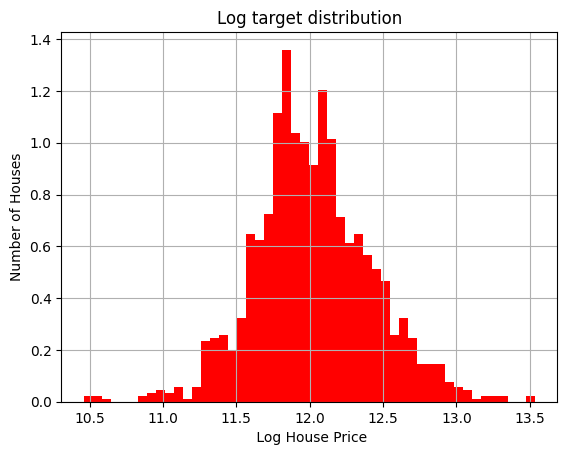

In [11]:
np.log(df_train['SalePrice']).hist(bins = 50, density = True, color="red")
plt.xlabel(' Log House Price')
plt.ylabel('Number of Houses')
plt.title('Log target distribution')
plt.show()

In [56]:


features = ["OverallQual", "OverallCond"]



In [57]:
X_train = df_train[features]
X_test =df_test[features]
y_train =df_train["SalePrice"]


In [58]:
model =LinearRegression()
model.fit(X_train,y_train)
predictions =model.predict(X_test)

In [63]:
print(f"+++ The predicted values are ++++ :\n {predictions}")

+++ The predicted values are ++++ :
 [130845.89554746 176254.3282227  131215.90209092 ... 130475.889004
 131215.90209092 222032.76744141]


# END OF PROJECT